# Bab 17 Neural Networks

Gustian 4112321002 \\
Kuncoro Adi Wibowo 4112321028

Saya suka omong kosong; omong kosong membangunkan sel-sel otak.
-Dr. Seuss

Jaringan syaraf tiruan (atau disingkat JST) adalah model prediktif yang dimotivasi oleh cara otak beroperasi. Bayangkan otak sebagai kumpulan neuron yang terhubung bersama. Setiap neuron melihat output dari neuron lain yang masuk ke dalamnya, melakukan perhitungan, dan kemudian menembak (jika perhitungannya melebihi ambang batas) atau tidak (jika tidak).

Dengan demikian, jaringan saraf tiruan terdiri dari neuron-neuron tiruan, yang melakukan hal serupa melakukan perhitungan yang sama atas input mereka. Jaringan saraf dapat memecahkan berbagai macam masalah seperti tulisan tangan pengenalan dan deteksi wajah, dan mereka banyak digunakan dalam pembelajaran mendalam, salah satu yang paling trendi subbidang ilmu data. Namun, sebagian besar jaringan saraf adalah "kotak hitam"-memeriksa detailnya tidak memberi Anda banyak pemahaman tentang bagaimana mereka memecahkan masalah. Dan jaringan saraf yang besar bisa jadi sulit untuk dilatih. Untuk sebagian besar masalah yang akan Anda hadapi sebagai ilmuwan data pemula, mereka adalah mungkin bukan pilihan yang tepat. Suatu hari nanti, ketika Anda mencoba membangun kecerdasan buatan untuk membawa tentang Singularitas, mungkin saja mereka akan berhasil.

## Perceptrons

Jaringan saraf yang paling sederhana adalah perceptron, yang mendekati neuron tunggal dengan n input biner. Jaringan ini menghitung jumlah tertimbang dari inputnya dan "menyala" jika jumlah tertimbang tersebut adalah 0 atau lebih besar:

In [ ]:
from scratch.linear_algebra import Vector, dot

def step_function(x: float) -> float:
    return 1.0 if x >= 0 else 0.0

def perceptron_output(weights: Vector, bias: float, x: Vector) -> float:
    """Returns 1 if the perceptron 'fires', 0 if not"""
    calculation = dot(weights, x) + bias
    return step_function(calculation)

Perceptron secara sederhana membedakan antara setengah ruang yang dipisahkan oleh hyperplane titik-titik x yang mana:

In [ ]:
dot(weights, x) + bias == 0

Dengan bobot yang dipilih secara tepat, perceptron dapat memecahkan sejumlah masalah sederhana (Gambar 18-1). Sebagai Sebagai contoh, kita bisa membuat gerbang AND (yang mengembalikan 1 jika kedua masukannya adalah 1 tetapi mengembalikan 0 jika salah satu masukannya adalah 0) dengan:

In [ ]:
and_weights = [2., 2]
and_bias = -3.

assert perceptron_output(and_weights, and_bias, [1, 1]) == 1
assert perceptron_output(and_weights, and_bias, [0, 1]) == 0
assert perceptron_output(and_weights, and_bias, [1, 0]) == 0
assert perceptron_output(and_weights, and_bias, [0, 0]) == 0

Jika kedua input adalah 1, perhitungannya sama dengan 2 + 2 - 3 = 1, dan outputnya adalah 1. Jika hanya salah satu input yang 1, perhitungannya sama dengan 2 + 0 - 3 = -1, dan outputnya adalah 0. Dan jika kedua input input adalah 1, perhitungannya sama dengan 2 + 0 - 3 = -1, dan outputnya adalah 0. Dan jika kedua input adalah 0, perhitungannya sama dengan -3, dan outputnya adalah 0.

Dengan menggunakan penalaran yang sama, kita dapat membuat gerbang OR dengan:

In [ ]:
or_weights = [2., 2]
or_bias = -1.

assert perceptron_output(or_weights, or_bias, [1, 1]) == 1
assert perceptron_output(or_weights, or_bias, [0, 1]) == 1
assert perceptron_output(or_weights, or_bias, [1, 0]) == 1
assert perceptron_output(or_weights, or_bias, [0, 0]) == 0

Kita juga dapat membuat gerbang NOT (yang memiliki satu masukan dan mengubah 1 ke 0 dan 0 ke 1) dengan:

In [ ]:
not_weights = [-2.]
not_bias = 1.

assert perceptron_output(not_weights, not_bias, [0]) == 1
assert perceptron_output(not_weights, not_bias, [1]) == 0

Namun demikian, ada beberapa masalah yang tidak dapat diselesaikan oleh satu perceptron. Sebagai contoh, tidak peduli seberapa keras Anda mencoba, Anda tidak dapat menggunakan perceptron untuk membangun gerbang XOR yang menghasilkan 1 jika tepat salah satu inputnya adalah 1 dan 0 jika tidak. Di sinilah kita mulai membutuhkan jaringan syaraf yang lebih rumit.
yang lebih rumit.

Tentu saja, Anda tidak perlu membuat perkiraan neuron untuk membangun gerbang logika:

In [ ]:
and_gate = min
or_gate = max
xor_gate = lambda x, y: 0 if x == y else 1

Seperti neuron asli, neuron buatan mulai menjadi lebih menarik ketika Anda mulai menghubungkannya bersama-sama.

## Feed-Forward Neural Networks

Topologi otak sangat rumit, sehingga sangat umum untuk mendekatinya dengan jaringan saraf feed-forward yang ideal yang terdiri dari lapisan-lapisan neuron diskrit, masing-masing terhubung ke lapisan berikutnya. Hal ini biasanya melibatkan lapisan input (yang menerima input dan meneruskannya ke depan tanpa perubahan), satu atau lebih "lapisan tersembunyi" (yang masing-masing terdiri dari neuron yang mengambil output dari lapisan sebelumnya, melakukan beberapa kalkulasi, dan meneruskan hasilnya ke lapisan berikutnya), dan lapisan output (yang menghasilkan output akhir).

Sama seperti pada perceptron, setiap neuron (non-input) memiliki bobot yang sesuai dengan masing-masing input dan bias. Untuk membuat representasi kita lebih sederhana, kita akan menambahkan bias pada akhir vektor bobot kita dan memberikan setiap neuron input bias yang selalu sama dengan 1.

Seperti halnya perceptron, untuk setiap neuron, kita akan menjumlahkan hasil kali antara input dan bobotnya. Tetapi di sini, alih-alih mengeluarkan fungsi step_function yang diterapkan pada hasil penjumlahan tersebut, kita akan mengeluarkan sebuah aproksimasi yang halus. Di sini kita akan menggunakan fungsi sigmoid (Gambar 18-2):

In [ ]:
import math

def sigmoid(t: float) -> float:
return 1 / (1 + math.exp(-t))

Mengapa menggunakan sigmoid dan bukan step_function yang lebih sederhana? Untuk melatih jaringan syaraf, kita perlu menggunakan kalkulus, dan untuk menggunakan kalkulus, kita perlu fungsi mulus. step_function bahkan tidak kontinu, dan sigmoid adalah pendekatan mulus yang baik untuk itu.

**CATATAN**

Anda mungkin ingat sigmoid dari Bab 16, di mana ia disebut logistik. Secara teknis "sigmoid" mengacu pada bentuk fungsi dan "logistik" pada fungsi khusus ini, meskipun orang sering menggunakan istilah tersebut secara bergantian.

Kami kemudian menghitung output sebagai:

In [ ]:
def neuron_output(weights: Vector, inputs: Vector) -> float:
    # weights includes the bias term, inputs includes a 1
    return sigmoid(dot(weights, inputs))

Dengan fungsi ini, kita dapat merepresentasikan sebuah neuron secara sederhana sebagai sebuah vektor bobot yang panjangnya satu kali lipat dari jumlah input pada neuron tersebut (karena adanya bobot bias). Kemudian kita dapat merepresentasikan jaringan saraf sebagai sebuah daftar lapisan (non-input), di mana setiap lapisan hanyalah sebuah daftar dari neuron-neuron di lapisan tersebut.

Dengan kata lain, kita akan merepresentasikan jaringan syaraf sebagai sebuah daftar (lapisan) daftar (neuron) vektor (bobot).

Dengan representasi seperti itu, menggunakan jaringan syaraf cukup sederhana:

In [ ]:
from typing import List

def feed_forward(neural_network: List[List[Vector]],
                 input_vector: Vector) -> List[Vector]:
    """
    Feeds the input vector through the neural network.
    Returns the outputs of all layers (not just the last one).
    """
    outputs: List[Vector] = []
    for layer in neural_network:
        input_with_bias = input_vector + [1] # Add a constant.
        output = [neuron_output(neuron, input_with_bias) # Compute the output
                  for neuron in layer] # for each neuron.
        outputs.append(output) # Add to results.

        # Then the input to the next layer is the output of this one
        input_vector = output

return outputs

Sekarang sangat mudah untuk membuat gerbang XOR yang tidak dapat kita buat dengan sebuah perceptron. Kita hanya perlu meningkatkan skala bobotnya sehingga neuron_output benar-benar mendekati 0 atau benar-benar mendekati 1:

In [ ]:
xor_network = [# hidden layer
               [[20., 20, -30],     # 'and' neuron
                [20., 20, -10]],    # 'or' neuron
               # output layer
               [[-60., 60, -30]]]   # '2nd input but not 1st input' neuron

# feed_forward returns the outputs of all layers, so the [-1] gets the
# final output, and the [0] gets the value out of the resulting vector
assert 0.000 < feed_forward(xor_network, [0, 0])[-1][0] < 0.001
assert 0.999 < feed_forward(xor_network, [1, 0])[-1][0] < 1.000
assert 0.999 < feed_forward(xor_network, [0, 1])[-1][0] < 1.000
assert 0.000 < feed_forward(xor_network, [1, 1])[-1][0] < 0.001

Untuk input yang diberikan (yang merupakan vektor dua dimensi), lapisan tersembunyi menghasilkan vektor dua dimensi vektor dua dimensi yang terdiri dari "dan" dari dua nilai input dan "atau" dari dua nilai input.

Dan lapisan output mengambil vektor dua dimensi dan menghitung "elemen kedua tetapi bukan elemen pertama". elemen pertama." Hasilnya adalah sebuah jaringan yang melakukan "atau, tetapi bukan dan," yang tepatnya adalah XOR (Gambar 18 - 3). 3).

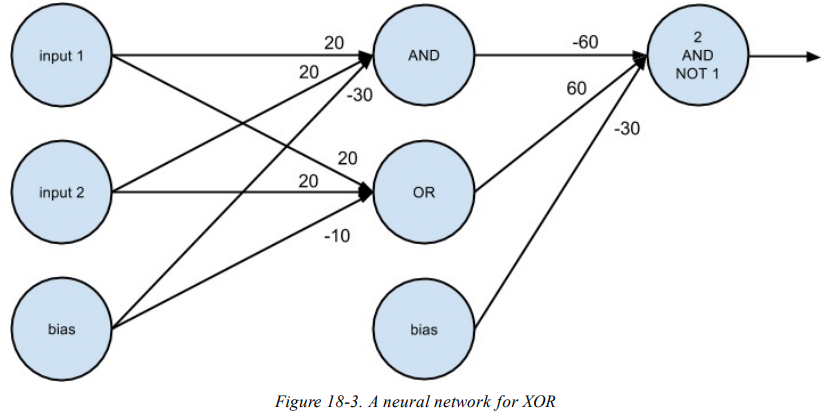

Salah satu cara yang disarankan untuk memikirkan hal ini adalah bahwa lapisan tersembunyi menghitung fitur-fitur input data (dalam hal ini "dan" dan "atau") dan lapisan output menggabungkan fitur-fitur tersebut dengan cara menghasilkan output yang diinginkan.

## Backpropagation

Biasanya kita tidak membuat jaringan syaraf secara manual. Hal ini sebagian karena kita menggunakannya untuk menyelesaikan banyak masalah yang lebih besar - masalah pengenalan gambar mungkin melibatkan ratusan atau ribuan neuron. Dan sebagian lagi karena kita biasanya tidak dapat "menebak" seperti apa neuron-neuron itu seharusnya.

Sebagai gantinya (seperti biasa) kita menggunakan data untuk melatih jaringan saraf. Pendekatan yang umum digunakan adalah algoritma yang disebut backpropagation, yang menggunakan gradient descent atau salah satu variannya.

Bayangkan kita memiliki sebuah set pelatihan yang terdiri dari vektor-vektor input dan vektor-vektor output target yang sesuai. Sebagai contoh, pada contoh xor_network sebelumnya, vektor input [1, 0] berhubungan dengan target keluaran [1]. Bayangkan jaringan kita memiliki beberapa set bobot. Kita kemudian menyesuaikan bobot-bobot tersebut menggunakan menggunakan algoritma berikut:

1. Jalankan feed_forward pada vektor input untuk menghasilkan output dari semua neuron dalam jaringan jaringan.
2. Kita mengetahui target keluaran, sehingga kita dapat menghitung kerugian yang merupakan jumlah dari kesalahan kuadrat.
3. Hitung gradien dari kerugian ini sebagai fungsi dari bobot neuron keluaran.
4. "Perbanyak" gradien dan kesalahan ke belakang untuk menghitung gradien sehubungan dengan bobot neuron tersembunyi.
5. Lakukan langkah penurunan gradien.

Biasanya kita menjalankan algoritma ini berkali-kali untuk seluruh set pelatihan kita sampai jaringan menjadi konvergen.

Pertama-tama, mari kita tuliskan fungsi untuk menghitung gradien:


In [ ]:
def sqerror_gradients(network: List[List[Vector]],
                      input_vector: Vector,
                      target_vector: Vector) -> List[List[Vector]]:
    """
    Given a neural network, an input vector, and a target vector,
    make a prediction and compute the gradient of the squared error
    loss with respect to the neuron weights.
    """
    # forward pass
    hidden_outputs, outputs = feed_forward(network, input_vector)

    # gradients with respect to output neuron pre-activation outputs
    output_deltas = [output * (1 - output) * (output - target)
                     for output, target in zip(outputs, target_vector)]

    # gradients with respect to output neuron weights
    output_grads = [[output_deltas[i] * hidden_output
                     for hidden_output in hidden_outputs + [1]]
                    for i, output_neuron in enumerate(network[-1])]

    # gradients with respect to hidden neuron pre-activation outputs
    hidden_deltas = [hidden_output * (1 - hidden_output) *
                         dot(output_deltas, [n[i] for n in network[-1]])
                     for i, hidden_output in enumerate(hidden_outputs)]

    # gradients with respect to hidden neuron weights
    hidden_grads = [[hidden_deltas[i] * input for input in input_vector + [1]]
                    for i, hidden_neuron in enumerate(network[0])]

    return [hidden_grads, output_grads]

Matematika di balik perhitungan sebelumnya tidak terlalu sulit, tetapi melibatkan beberapa kalkulus yang membosankan dan perhatian yang cermat terhadap detail, jadi saya akan meninggalkannya sebagai latihan untuk Anda.

Berbekal kemampuan untuk menghitung gradien, sekarang kita dapat melatih jaringan saraf. Mari kita coba mempelajari jaringan XOR yang sebelumnya telah kita rancang secara manual.

Kita akan mulai dengan membuat data pelatihan dan menginisialisasi jaringan syaraf tiruan kita dengan bobot acak:

In [ ]:
import random
random.seed(0)

# training data
xs = [[0., 0], [0., 1], [1., 0], [1., 1]]
ys = [[0.], [1.], [1.], [0.]]

# start with random weights
network = [ # hidden layer: 2 inputs -> 2 outputs
            [[random.random() for _ in range(2 + 1)],   # 1st hidden neuron
             [random.random() for _ in range(2 + 1)]],  # 2nd hidden neuron
            # output layer: 2 inputs -> 1 output
            [[random.random() for _ in range(2 + 1)]]   # 1st output neuron
          ]

Seperti biasa, kita bisa melatihnya dengan menggunakan gradient descent. Satu perbedaan dari contoh sebelumnya adalah bahwa di sini kita memiliki beberapa vektor parameter, masing-masing dengan gradiennya sendiri, yang berarti kita harus memanggil gradient_step untuk masing-masing vektor tersebut.

In [ ]:
from scratch.gradient_descent import gradient_step
import tqdm

learning_rate = 1.0

for epoch in tqdm.trange(20000, desc="neural net for xor"):
    for x, y in zip(xs, ys):
        gradients = sqerror_gradients(network, x, y)

        # Take a gradient step for each neuron in each layer
        network = [[gradient_step(neuron, grad, -learning_rate)
                    for neuron, grad in zip(layer, layer_grad)]
                   for layer, layer_grad in zip(network, gradients)]

# check that it learned XOR
assert feed_forward(network, [0, 0])[-1][0] < 0.01
assert feed_forward(network, [0, 1])[-1][0] > 0.99
assert feed_forward(network, [1, 0])[-1][0] > 0.99
assert feed_forward(network, [1, 1])[-1][0] < 0.01

Bagi saya, jaringan yang dihasilkan memiliki bobot yang terlihat seperti itu:

In [ ]:
[ # hidden layer
  [[7, 7, -3], # computes OR
   [5, 5, -8]], # computes AND
  # output layer
  [[11, -12, -5]] # computes "first but not second"
]

yang secara konseptual sangat mirip dengan jaringan kami sebelumnya.

## Contoh: Fizz Buzz

Wakil Presiden Teknik ingin mewawancarai kandidat teknis dengan membuat mereka memecahkan "Fizz Buzz," tantangan pemrograman yang sudah dikenal dengan baik:

In [ ]:
Print the numbers 1 to 100, except that if the number is divisible
by 3, print "fizz"; if the number is divisible by 5, print "buzz";
and if the number is divisible by 15, print "fizzbuzz".

Menurutnya, kemampuan untuk menyelesaikan hal ini menunjukkan keterampilan pemrograman yang ekstrem. Anda berpikir bahwa ini masalah ini sangat sederhana sehingga jaringan syaraf bisa menyelesaikannya.

Jaringan syaraf mengambil vektor sebagai input dan menghasilkan vektor sebagai output. Seperti yang dinyatakan, pemrograman masalahnya adalah mengubah bilangan bulat menjadi sebuah string. Jadi tantangan pertama adalah menemukan cara untuk menyusunnya kembali sebagai masalah vektor.

Untuk keluarannya, hal ini tidaklah sulit: pada dasarnya ada empat kelas keluaran, sehingga kita dapat mengkodekan keluaran sebagai sebuah vektor yang terdiri dari empat angka 0 dan 1:

In [ ]:
def fizz_buzz_encode(x: int) -> Vector:
    if x % 15 == 0:
        return [0, 0, 0, 1]
    elif x % 5 == 0:
        return [0, 0, 1, 0]
    elif x % 3 == 0:
        return [0, 1, 0, 0]
    else:
        return [1, 0, 0, 0]

assert fizz_buzz_encode(2) == [1, 0, 0, 0]
assert fizz_buzz_encode(6) == [0, 1, 0, 0]
assert fizz_buzz_encode(10) == [0, 0, 1, 0]
assert fizz_buzz_encode(30) == [0, 0, 0, 1]

Kita akan menggunakan ini untuk menghasilkan vektor target. Vektor input tidak terlalu jelas. Anda tidak ingin hanya menggunakan vektor satu dimensi yang berisi angka masukan, karena beberapa alasan. Sebuah masukan tunggal menangkap sebuah "intensitas", tetapi fakta bahwa 2 adalah dua kali lebih banyak dari 1, dan 4 adalah dua kali lebih banyak lagi, tidak relevan dengan masalah ini. Selain itu, hanya dengan satu input, lapisan tersembunyi tidak akan dapat menghitung fitur yang sangat menarik, yang berarti mungkin tidak akan dapat menyelesaikan masalah.

Ternyata satu hal yang bekerja dengan cukup baik adalah mengubah setiap angka menjadi representasi binernya binernya, yaitu representasi 1 dan 0. (Jangan khawatir, hal ini tidak jelas-setidaknya bagi saya tidak jelas).

In [ ]:
def binary_encode(x: int) -> Vector:
    binary: List[float] = []

    for i in range(10):
        binary.append(x % 2)
        x = x // 2

    return binary

#                             1 2 4 8 16 32 64 128 256 512
assert binary_encode(0)   == [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
assert binary_encode(1)   == [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
assert binary_encode(10)  == [0, 1, 0, 1, 0, 0, 0, 0, 0, 0]
assert binary_encode(101) == [1, 0, 1, 0, 0, 1, 1, 0, 0, 0]
assert binary_encode(999) == [1, 1, 1, 0, 0, 1, 1, 1, 1, 1]

Karena tujuannya adalah untuk membuat output untuk angka 1 hingga 100, maka akan menjadi curang jika melatih angka-angka tersebut angka-angka tersebut. Oleh karena itu, kita akan melatih angka 101 hingga 1.023 (yang merupakan angka terbesar yang bisa kita yang dapat kita wakili dengan 10 digit biner):

In [ ]:
xs = [binary_encode(n) for n in range(101, 1024)]
ys = [fizz_buzz_encode(n) for n in range(101, 1024)]

Selanjutnya, mari kita buat jaringan syaraf dengan bobot awal yang acak. Jaringan ini akan memiliki 10 neuron input (karena kita merepresentasikan input kita sebagai vektor 10 dimensi) dan 4 neuron output (karena kita merepresentasikan target kita sebagai vektor 4 dimensi). Kita akan memberikannya 25 unit tersembunyi, tetapi kita akan menggunakan variabel untuk itu agar mudah diubah:

In [ ]:
NUM_HIDDEN = 25

network = [
    # hidden layer: 10 inputs -> NUM_HIDDEN outputs
    [[random.random() for _ in range(10 + 1)] for _ in range(NUM_HIDDEN)],

    # output_layer: NUM_HIDDEN inputs -> 4 outputs
    [[random.random() for _ in range(NUM_HIDDEN + 1)] for _ in range(4)]
]

Itu dia. Sekarang kami siap untuk berlatih. Karena ini adalah masalah yang lebih rumit (dan ada banyak banyak hal yang harus dikacaukan), kami ingin memantau proses pelatihan dengan cermat. Secara khusus, untuk setiap kita akan melacak jumlah kesalahan kuadrat dan mencetaknya. Kami ingin memastikan bahwa jumlah tersebut berkurang:

In [ ]:
from scratch.linear_algebra import squared_distance

learning_rate = 1.0

with tqdm.trange(500) as t:
    for epoch in t:
        epoch_loss = 0.0

        for x, y in zip(xs, ys):
            predicted = feed_forward(network, x)[-1]
            epoch_loss += squared_distance(predicted, y)
            gradients = sqerror_gradients(network, x, y)

            # Take a gradient step for each neuron in each layer
            network = [[gradient_step(neuron, grad, -learning_rate)
                        for neuron, grad in zip(layer, layer_grad)]
                    for layer, layer_grad in zip(network, gradients)]

        t.set_description(f"fizz buzz (loss: {epoch_loss:.2f})")

Ini akan memakan waktu beberapa saat untuk berlatih, tetapi pada akhirnya kerugian akan mulai berkurang.

Akhirnya kita siap untuk menyelesaikan masalah awal kita. Kami memiliki satu masalah yang tersisa. Jaringan kita akan akan menghasilkan vektor angka empat dimensi, tetapi kita ingin satu prediksi. Kita akan melakukannya dengan mengambil argmax, yang merupakan indeks dari nilai terbesar:

In [ ]:
def argmax(xs: list) -> int:
    """Returns the index of the largest value"""
    return max(range(len(xs)), key=lambda i: xs[i])

assert argmax([0, -1]) == 0               # items[0] is largest
assert argmax([-1Sekarang kita akhirnya bisa memecahkan "FizzBuzz":, 0]) == 1               # items[1] is largest
assert argmax([-1, 10, 5, 20, -3]) == 3   # items[3] is largest

Sekarang kita akhirnya bisa memecahkan "FizzBuzz":

In [ ]:
num_correct = 0

for n in range(1, 101):
    x = binary_encode(n)
    predicted = argmax(feed_forward(network, x)[-1])
    actual = argmax(fizz_buzz_encode(n))
    labels = [str(n), "fizz", "buzz", "fizzbuzz"]
    print(n, labels[predicted], labels[actual])

    if predicted == actual:
        num_correct += 1
print(num_correct, "/", 100)

Bagi saya, jaringan yang dilatih mendapatkan 96/100 benar, yang jauh di atas ambang batas perekrutan VP of Engineering ambang batas. Dihadapkan dengan bukti-bukti tersebut, dia mengalah dan mengubah tantangan wawancara menjadi " Invert a Binary Binary Tree."

# Bab 18 Pembelajaran Mendalam (Deep Learning)
Yusnia Halimatussa'diyah 4112321007

Fitria Adiba 4112321030



Deep Learning awalnya mengacu pada penerapan jaringan neural "dalam" (yaitu, jaringan dengan lebih dari satu lapisan tersembunyi), meskipun dalam praktiknya istilah tersebut sekarang mencakup berbagai arsitektur neural (termasuk jaringan neural "sederhana"). Dalam bab ini kita akan melanjutkan pekerjaan kita sebelumnya dan melihat lebih banyak jenis jaringan neural. Untuk melakukannya, kami akan memperkenalkan sejumlah abstraksi yang memungkinkan kami berpikir tentang jaringan neural dengan cara yang lebih umum.

##Tensor
Sebelumnya, kita telah membedakan antara vektor (array satu dimensi) dan matriks (array dua dimensi). Saat mulai bekerja dengan jaringan neural yang lebih rumit, harus menggunakan array dimensi yang lebih tinggi juga. Di banyak perpustakaan jaringan neural, array n-dimensi disebut sebagai tensor. (Ada alasan matematis yang bertele-tele untuk tidak merujuk array n-dimensi sebagai tensor.) Jika saya menulis seluruh buku tentang *deep learning*, saya akan mengimplementasikan Tensor berfitur lengkap kelas yang membebani operator aritmatika Python dan dapat menangani berbagai operasi lainnya. Implementasi seperti itu akan memakan satu bab sendiri. Di sini kami akan menipu dan mengatakan bahwa Tensor hanyalah sebuah daftar. Ini benar dalam satu arah—semua vektor dan matriks kita dan analog dimensi yang lebih tinggi adalah daftar. Ini tentu saja tidak benar di arah lain—kebanyakan daftar Python bukan array n-dimensi dalam pengertian kita.

NOTE

Idealnya Anda ingin melakukan sesuatu seperti:

In [ ]:
# A Tensor is either a float, or a List of Tensors
Tensor = Union[float, List[Tensor]]

Namun, Python tidak mengizinkan Anda menentukan tipe rekursif seperti itu. Dan bahkan jika definisi itu masih tidak benar, karena memungkinkan
untuk "tensor" yang buruk seperti:

In [ ]:
[[1.0, 2.0],
 [3.0]]


yang barisnya memiliki ukuran berbeda, yang menjadikannya bukan array n-dimensi.

Jadi, seperti yang saya katakan, kami hanya akan menipu:

In [ ]:
Tensor = list

Dan kami akan menulis fungsi pembantu untuk menemukan bentuk tensor:

In [ ]:
from typing import List

def shape(tensor: Tensor) -> List[int]:
  sizes: List[int] = []
  while isinstance(tensor, list):
    sizes.append(len(tensor))
    tensor = tensor[0]
  return sizes

assert shape([1, 2, 3]) == [3]
assert shape([[1, 2], [3, 4], [5, 6]]) == [3, 2]

Karena tensor dapat memiliki jumlah dimensi berapa pun, biasanya kita perlu bekerja dengannya
secara rekursif. Kami akan melakukan satu hal dalam kasus satu dimensi dan berulang dalam dimensi yang lebih tinggi
kasus:

In [ ]:
def is_1d(tensor: Tensor) -> bool:
  """
  If tensor[0] is a list, it's a higher-order tensor.
  Otherwise, tensor is 1-dimensional (that is, a vector).
  """
  return not isinstance(tensor[0], list)

assert is_1d([1, 2, 3])
assert not is_1d([[1, 2], [3, 4]])

yang dapat kita gunakan untuk menulis fungsi tensor_sum rekursif:

In [ ]:
def tensor_sum(tensor: Tensor) -> float:
  """Sums up all the values in the tensor"""
  if is_1d(tensor):
    return sum(tensor) # just a list of floats, use Python sum
else:
    return sum(tensor_sum(tensor_i)   # Call tensor_sum on each row
              for tensor_i in tensor) # and sum up those results.

assert tensor_sum([1, 2, 3]) == 6
assert tensor_sum([[1, 2], [3, 4]]) == 10

Jika Anda tidak terbiasa berpikir secara rekursif, Anda harus merenungkan ini sampai masuk akal, karena kami akan melakukannya menggunakan logika yang sama sepanjang bab ini. Namun, kami akan membuat beberapa fungsi pembantu agar
kita tidak perlu menulis ulang logika ini di mana-mana. Yang pertama menerapkan fungsi dengan elemen tunggal
tensor:

In [ ]:
from typing import Callable

def tensor_apply(f: Callable[[float], float], tensor: Tensor) -> Tensor:
  """Applies f elementwise"""
  if is_1d(tensor):
      return [f(x) for x in tensor]
  else:
      return [tensor_apply(f, tensor_i) for tensor_i in tensor]

assert tensor_apply(lambda x: x + 1, [1, 2, 3]) == [2, 3, 4]
assert tensor_apply(lambda x: 2 * x, [[1, 2], [3, 4]]) == [[2, 4], [6, 8]]

Kita dapat menggunakan ini untuk menulis fungsi yang membuat tensor nol dengan bentuk yang sama dengan tensor yang diberikan:

In [ ]:
def zeros_like(tensor: Tensor) -> Tensor:
    return tensor_apply(lambda _: 0.0, tensor)

assert zeros_like([1, 2, 3]) == [0, 0, 0]
assert zeros_like([[1, 2], [3, 4]]) == [[0, 0], [0, 0]]

Kita juga perlu menerapkan fungsi ke elemen yang sesuai dari dua tensor (yang sebaiknya bentuk yang persis sama, meskipun kami tidak akan memeriksanya):

In [ ]:
def tensor_combine(f: Callable[[float, float], float],
                   t1: Tensor,
                   t2: Tensor) -> Tensor:
    """Applies f to corresponding elements of t1 and t2"""
    if is_1d(t1):
        return [f(x, y) for x, y in zip(t1, t2)]
    else:
        return [tensor_combine(f, t1_i, t2_i)
                for t1_i, t2_i in zip(t1, t2)]

import operator
assert tensor_combine(operator.add, [1, 2, 3], [4, 5, 6]) == [5, 7, 9]
assert tensor_combine(operator.mul, [1, 2, 3], [4, 5, 6]) == [4, 10, 18]

##Lapisan Abstraksi
Di bab sebelumnya kita membuat jaringan neural sederhana yang memungkinkan kita menumpuk dua lapisan neuron, yang masing-masing menghitung sigmoid(titik(bobot, masukan)).

Meskipun itu mungkin representasi ideal dari apa yang sebenarnya dilakukan oleh neuron, dalam praktiknya kami ingin mengizinkan lebih banyak variasi hal. Mungkin kita ingin neuron mengingat sesuatu tentang masukan mereka sebelumnya. Mungkin kami ingin menggunakan fungsi aktivasi yang berbeda dari sigmoid. Dan seringkali kami ingin menggunakan lebih dari dua lapisan. (Fungsi feed_forward kami benar-benar menangani sejumlah lapisan, tetapi perhitungan gradien kami tidak.)
Dalam bab ini kita akan membuat mesin untuk mengimplementasikan beragam jaringan neural. Abstraksi fundamental kita akan menjadi Layer, sesuatu yang tahu bagaimana menerapkan beberapa fungsi ke inputnya dan yang tahu bagaimana mem-backpropagate gradien. Salah satu cara berpikir tentang jaringan neural yang kita buat di Bab 18 adalah sebagai lapisan “linear”,
diikuti oleh lapisan "sigmoid", lalu lapisan linier lainnya dan lapisan sigmoid lainnya. Kami tidak membedakan mereka dalam istilah-istilah ini, tetapi hal itu akan memungkinkan kami untuk bereksperimen dengan struktur yang jauh lebih umum:

In [ ]:
from typing import Iterable, Tuple

class Layer:
  """
  Our neural networks will be composed of Layers, each of which
  knows how to do some computation on its inputs in the "forward"
  direction and propagate gradients in the "backward" direction.
  """
  def forward(self, input):
      """
      Note the lack of types. We're not going to be prescriptive
      about what kinds of inputs layers can take and what kinds
      of outputs they can return.
      """
      raise NotImplementedError

  def backward(self, gradient):
      """
      Similarly, we're not going to be prescriptive about what the
      gradient looks like. It's up to you the user to make sure
      that you're doing things sensibly.
      """
      raise NotImplementedError

  def params(self) -> Iterable[Tensor]:
      """
      Returns the parameters of this layer. The default implementation
      returns nothing, so that if you have a layer with no parameters
      you don't have to implement this.
      """
      return ()

  def grads(self) -> Iterable[Tensor]:
      """
      Returns the gradients, in the same order as params().
      """
      return ()


Metode maju dan mundur harus diimplementasikan dalam subkelas konkret kita. Setelah kami membangun jaringan saraf, kami ingin melatihnya menggunakan penurunan gradien, yang berarti kami ingin memperbarui setiap parameter di jaringan menggunakan gradiennya. Oleh karena itu, kami bersikeras agar setiap lapisan dapat memberi tahu kami parameter dan gradiennya.

Beberapa layer (misalnya, layer yang menerapkan sigmoid ke setiap inputnya) tidak memiliki parameter untuk diperbarui, jadi kami menyediakan implementasi default yang menangani kasus tersebut.
Mari kita lihat lapisan itu:

In [ ]:
from scratch.neural_networks import sigmoid

class Sigmoid(Layer):
    def forward(self, input: Tensor) -> Tensor:
        """
        Apply sigmoid to each element of the input tensor,
        and save the results to use in backpropagation.
        """
        self.sigmoids = tensor_apply(sigmoid, input)
        return self.sigmoids

  def backward(self, gradient: Tensor) -> Tensor:
        return tensor_combine(lambda sig, grad: sig * (1 - sig) * grad,
                              self.sigmoids,
                              gradient)

Ada beberapa hal yang perlu diperhatikan di sini. Salah satunya adalah selama forward pass kami menyimpan sigmoid yang dihitung sehingga kami dapat menggunakannya nanti di backward pass. Lapisan kami biasanya perlu melakukan hal semacam ini.

Kedua, Anda mungkin bertanya-tanya dari mana sig * (1 - sig) * grad berasal. Ini hanyalah aturan rantai dari kalkulus dan sesuai dengan istilah output * (1 - output) * (output - target) di jaringan saraf kita sebelumnya.

Terakhir, Anda dapat melihat bagaimana kami dapat menggunakan fungsi tensor_apply dan tensor_combine. Sebagian besar lapisan kami akan menggunakan fungsi ini dengan cara yang sama.

##Lapisan Linier
Bagian lain yang kita perlukan untuk menduplikasi jaringan neural dari bab sebelumnya adalah lapisan "linear" yang mewakili bagian titik (bobot, masukan) dari neuron.

Lapisan ini akan memiliki parameter, yang ingin kita inisialisasi dengan nilai acak. Ternyata nilai parameter awal dapat membuat perbedaan besar dalam seberapa cepat (dan terkadang apakah) jaringan berlatih. Jika bobot terlalu besar, mereka dapat menghasilkan keluaran yang besar dalam rentang di mana fungsi aktivasi memiliki gradien mendekati nol. Dan bagian dari jaringan yang memiliki gradien nol tidak dapat mempelajari apa pun melalui penurunan gradien.

Oleh karena itu, kami akan menerapkan tiga skema berbeda untuk membuat tensor bobot secara acak. Yang pertama adalah memilih setiap nilai dari distribusi seragam acak pada [0, 1]—yaitu, sebagai random.random(). Yang kedua (dan default) adalah memilih setiap nilai secara acak dari distribusi normal standar. Dan yang ketiga adalah menggunakan inisialisasi Xavier, dimana setiap bobot diinisialisasi dengan penarikan acak dari distribusi normal dengan rata-rata 0 dan varians 2 / (num_inputs + num_outputs). Ternyata ini sering bekerja dengan baik untuk bobot jaringan neural. Kami akan mengimplementasikannya dengan fungsi random_uniform dan fungsi random_normal:

In [ ]:
import random

from scratch.probability import inverse_normal_cdf

def random_uniform(*dims: int) -> Tensor:
    if len(dims) == 1:
        return [random.random() for _ in range(dims[0])]
    else:
        return [random_uniform(*dims[1:]) for _ in range(dims[0])]

def random_normal(*dims: int,
                  mean: float = 0.0,
                  variance: float = 1.0) -> Tensor:
    if len(dims) == 1:
        return [mean + variance * inverse_normal_cdf(random.random())
                for _ in range(dims[0])]
    else:
        return [random_normal(*dims[1:], mean=mean, variance=variance)
                for _ in range(dims[0])]

assert shape(random_uniform(2, 3, 4)) == [2, 3, 4]
assert shape(random_normal(5, 6, mean=10)) == [5, 6]

Dan kemudian bungkus semuanya dalam fungsi random_tensor:

In [ ]:
def random_tensor(*dims: int, init: str = 'normal') -> Tensor:
    if init == 'normal':
        return random_normal(*dims)
    elif init == 'uniform':
        return random_uniform(*dims)
    elif init == 'xavier':
        variance = len(dims) / sum(dims)
        return random_normal(*dims, variance=variance)
    else:
        raise ValueError(f"unknown init: {init}")

Sekarang kita dapat mendefinisikan layer linier kita. Kita perlu menginisialisasinya dengan dimensi input (yang memberi tahu kita berapa banyak bobot yang dibutuhkan setiap neuron), dimensi output (yang memberi tahu kita berapa banyak neuron yang harus kita miliki), dan skema inisialisasi yang kita inginkan:

In [ ]:
from scratch.linear_algebra import dot

class Linear(Layer):
    def __init__(self,
                 input_dim: int,
                 output_dim: int,
                 init: str = 'xavier') -> None:
        """
        A layer of output_dim neurons, each with input_dim weights
        (and a bias).
        """
        self.input_dim = input_dim
        self.output_dim = output_dim

        # self.w[o] is the weights for the oth neuron
        self.w = random_tensor(output_dim, input_dim, init=init)

        # self.b[o] is the bias term for the oth neuron
        self.b = random_tensor(output_dim, init=init)

NOTE

Jika Anda bertanya-tanya seberapa penting skema inisialisasi, beberapa jaringan dalam bab ini saya tidak bisa berlatih sama sekali dengan inisialisasi yang berbeda dari yang saya gunakan.

Metode forward mudah diimplementasikan. Kami akan mendapatkan satu keluaran per neuron, yang kami tempelkan di vektor. Dan keluaran setiap neuron hanyalah titik bobotnya dengan masukan, ditambah biasnya:

In [ ]:
def forward(self, input: Tensor) -> Tensor:
    # Save the input to use in the backward pass.
    self.input = input

    # Return the vector of neuron outputs.
    return [dot(input, self.w[o]) + self.b[o]
            for o in range(self.output_dim)]

Metode mundur lebih terlibat, tetapi jika Anda mengetahui kalkulus, itu tidak sulit:

In [ ]:
def backward(self, gradient: Tensor) -> Tensor:
    # Each b[o] gets added to output[o], which means
    # the gradient of b is the same as the output gradient.
    self.b_grad = gradient

    # Each w[o][i] multiplies input[i] and gets added to output[o].
    # So its gradient is input[i] * gradient[o].
    self.w_grad = [[self.input[i] * gradient[o]
                    for i in range(self.input_dim)]
                   for o in range(self.output_dim)]
    # Each input[i] multiplies every w[o][i] and gets added to every
    # output[o]. So its gradient is the sum of w[o][i] * gradient[o]
    # across all the outputs.
    return [sum(self.w[o][i] * gradient[o] for o in range(self.output_dim))
            for i in range(self.input_dim)]


NOTE

Dalam perpustakaan tensor "nyata", operasi ini (dan banyak lainnya) akan direpresentasikan sebagai perkalian matriks atau tensor, yang dirancang untuk dilakukan oleh perpustakaan tersebut dengan sangat cepat. Perpustakaan kami sangat lambat

Terakhir, di sini kita perlu mengimplementasikan params dan grads. Kami memiliki dua parameter dan dua gradien yang sesuai:

In [ ]:
  def params(self) -> Iterable[Tensor]:
      return [self.w, self.b]
  def grads(self) -> Iterable[Tensor]:
      return [self.w_grad, self.b_grad]

##Jaringan Neural sebagai Urutan Lapisan
Kami ingin menganggap jaringan neural sebagai urutan lapisan, jadi mari kita cari cara untuk menggabungkan beberapa lapisan menjadi satu. Neural network yang dihasilkan itu sendiri adalah sebuah layer, dan mengimplementasikan metode Layer dengan cara yang jelas:

In [ ]:
from typing import List

class Sequential(Layer):
    """
    A layer consisting of a sequence of other layers.
    It's up to you to make sure that the output of each layer
    makes sense as the input to the next layer.
    """
    def __init__(self, layers: List[Layer]) -> None:
        self.layers = layers

    def forward(self, input):
        """Just forward the input through the layers in order."""
        for layer in self.layers:
            input = layer.forward(input)
        return input

    def backward(self, gradient):
        """Just backpropagate the gradient through the layers in reverse."""
        for layer in reversed(self.layers):
            gradient = layer.backward(gradient)
        return gradient

    def params(self) -> Iterable[Tensor]:
        """Just return the params from each layer."""
        return (param for layer in self.layers for param in layer.params())

    def grads(self) -> Iterable[Tensor]:
        """Just return the grads from each layer."""
        return (grad for layer in self.layers for grad in layer.grads())

Jadi kami dapat mewakili jaringan neural yang kami gunakan untuk XOR sebagai:

In [ ]:
xor_net = Sequential([
    Linear(input_dim=2, output_dim=2),
    Sigmoid(),
    Linear(input_dim=2, output_dim=1),
    Sigmoid()
])

Tapi kita masih membutuhkan lebih banyak mesin untuk melatihnya.

##Loss and Optimization
Sebelumnya kami menulis fungsi kerugian individual dan fungsi gradien untuk model kami. Di sini kami ingin bereksperimen dengan fungsi kerugian yang berbeda, jadi (seperti biasa) kami akan memperkenalkan abstraksi Kerugian baru yang merangkum perhitungan kerugian dan perhitungan gradien:

In [ ]:
class Loss:
    def loss(self, predicted: Tensor, actual: Tensor) -> float:
        """How good are our predictions? (Larger numbers are worse.)"""
        raise NotImplementedError
    def gradient(self, predicted: Tensor, actual: Tensor) -> Tensor:
        """How does the loss change as the predictions change?"""
        raise NotImplementedError

Kami telah bekerja berkali-kali dengan kerugian yang merupakan jumlah dari kesalahan kuadrat, jadi kami akan memiliki waktu yang mudah untuk mengimplementasikannya. Satu-satunya trik adalah kita harus menggunakan tensor_combine:

In [ ]:
class SSE(Loss):
    """Loss function that computes the sum of the squared errors."""
    def loss(self, predicted: Tensor, actual: Tensor) -> float:
        # Compute the tensor of squared differences
        squared_errors = tensor_combine(
            lambda predicted, actual: (predicted - actual) ** 2,
            predicted,
            actual)

        # And just add them up
        return tensor_sum(squared_errors)

    def gradient(self, predicted: Tensor, actual: Tensor) -> Tensor:
        return tensor_combine(
            lambda predicted, actual: 2 * (predicted - actual),
            predicted,
            actual)

(Kita akan melihat fungsi kerugian yang berbeda sebentar lagi.)

Bagian terakhir untuk mencari tahu adalah penurunan gradien. Sepanjang buku kami telah melakukan semua penurunan gradien kami secara manual dengan memiliki lingkaran pelatihan yang melibatkan sesuatu seperti:

In [ ]:
theta = gradient_step(theta, grad, -learning_rate)

Di sini itu tidak akan berhasil bagi kita, karena beberapa alasan. Yang pertama adalah jaringan neural kita akan memiliki banyak parameter, dan kita harus memperbarui semuanya. Yang kedua adalah kami ingin dapat menggunakan varian penurunan gradien yang lebih pintar, dan kami tidak ingin harus menulis ulang setiap saat.

Oleh karena itu, kami akan memperkenalkan (Anda dapat menebaknya) abstraksi Pengoptimal, yang penurunan gradiennya akan menjadi contoh khusus:

In [ ]:
class Optimizer:
    """
    An optimizer updates the weights of a layer (in place) using information
    known by either the layer or the optimizer (or by both).
    """
    def step(self, layer: Layer) -> None:
        raise NotImplementedError

Setelah itu mudah untuk menerapkan penurunan gradien, sekali lagi menggunakan tensor_combine:

In [ ]:
class GradientDescent(Optimizer):
    def __init__(self, learning_rate: float = 0.1) -> None:
        self.lr = learning_rate

    def step(self, layer: Layer) -> None:
        for param, grad in zip(layer.params(), layer.grads()):
            # Update param using a gradient step
            param[:] = tensor_combine(
                lambda param, grad: param - grad * self.lr,
                param,
                grad)

Satu-satunya hal yang mungkin mengejutkan adalah "penugasan irisan", yang mencerminkan fakta bahwa menugaskan ulang daftar tidak mengubah nilai aslinya. Yaitu, jika Anda baru saja melakukan param = tensor_combine(. . .), Anda akan mendefinisikan ulang variabel lokal param, tetapi Anda tidak akan memengaruhi tensor parameter asli yang disimpan di lapisan. Namun, jika Anda menetapkan ke irisan [:], itu benar-benar mengubah nilai di dalam daftar.

Berikut adalah contoh sederhana untuk ditunjukkan:

In [ ]:
tensor = [[1, 2], [3, 4]]

for row in tensor:
    row = [0, 0]
assert tensor == [[1, 2], [3, 4]], "assignment doesn't update a list"

for row in tensor:
    row[:] = [0, 0]
assert tensor == [[0, 0], [0, 0]], "but slice assignment does"

Jika Anda agak tidak berpengalaman dengan Python, perilaku ini mungkin mengejutkan, jadi renungkan dan
coba contoh sendiri sampai masuk akal.

Untuk mendemonstrasikan nilai abstraksi ini, mari terapkan pengoptimal lain yang menggunakan momentum. Idenya adalah kita tidak ingin bereaksi berlebihan terhadap setiap gradien baru, jadi kita mempertahankan rata-rata berjalan dari gradien yang telah kita lihat, memperbaruinya dengan setiap gradien baru dan mengambil langkah ke arah rata-rata:

In [ ]:
class Momentum(Optimizer):
    def __init__(self,
                 learning_rate: float,
                 momentum: float = 0.9) -> None:
        self.lr = learning_rate
        self.mo = momentum
        self.updates: List[Tensor] = [] # running average

    def step(self, layer: Layer) -> None:
        # If we have no previous updates, start with all zeros
        if not self.updates:
            self.updates = [zeros_like(grad) for grad in layer.grads()]

    for update, param, grad in zip(self.updates,
                                   layer.params(),
                                   layer.grads()):
        # Apply momentum
        update[:] = tensor_combine(
            lambda u, g: self.mo * u + (1 - self.mo) * g,
            update,
            grad)

    # Then take a gradient step
    param[:] = tensor_combine(
        lambda p, u: p - self.lr * u,
        param,
        update)

Karena kami menggunakan abstraksi Pengoptimal, kami dapat dengan mudah beralih di antara berbagai pengoptimal kami.

##Contoh: XOR Revisited
Mari kita lihat betapa mudahnya menggunakan framework baru kami untuk melatih jaringan yang dapat menghitung XOR. Kami mulai dengan membuat ulang data pelatihan:

In [ ]:
# training data
xs = [[0., 0], [0., 1], [1., 0], [1., 1]]
ys = [[0.], [1.], [1.], [0.]]

dan kemudian kita mendefinisikan jaringan, meskipun sekarang kita dapat meninggalkan lapisan sigmoid terakhir:

In [ ]:
random.seed(0)

net = Sequential([
    Linear(input_dim=2, output_dim=2),
    Sigmoid(),
    Linear(input_dim=2, output_dim=1)
])

Kami sekarang dapat menulis loop pelatihan sederhana, kecuali bahwa sekarang kami dapat menggunakan abstraksi Pengoptimal dan Kerugian. Ini memungkinkan kita untuk dengan mudah mencoba yang berbeda:

In [ ]:
import tqdm

optimizer = GradientDescent(learning_rate=0.1)
loss = SSE()

with tqdm.trange(3000) as t:
    for epoch in t:
        epoch_loss = 0.0

    for x, y in zip(xs, ys):
        predicted = net.forward(x)
        epoch_loss += loss.loss(predicted, y)
        gradient = loss.gradient(predicted, y)
        net.backward(gradient)

        optimizer.step(net)

    t.set_description(f"xor loss {epoch_loss:.3f}")

Ini harus dilatih dengan cepat, dan Anda akan melihat kerugiannya turun. Dan sekarang kita dapat memeriksa bobotnya:

In [ ]:
for param in net.params():
    print(param)

Untuk jaringan saya, saya menemukan kira-kira:

In [ ]:
hidden1 = -2.6 * x1 + -2.7 * x2 + 0.2 # NOR
hidden2 =  2.1 * x1 + 2.1  * x2 - 3.4 # AND
output =  -3.1 * h1 + -2.6 * h2 + 1.8 # NOR

Jadi hidden1 aktif jika tidak ada input 1. hidden2 aktif jika kedua input 1. Dan output aktif jika tidak ada output tersembunyi 1 — yaitu, jika tidak ada input yang 1 dan juga tidak jika kedua input adalah 1. Memang, inilah logika XOR.

Perhatikan bahwa jaringan ini mempelajari fitur-fitur yang berbeda dari yang kita latih di bab sebelumnya, tetapi masih berhasil melakukan hal yang sama.

##Fungsi Aktivasi Lainnya
Fungsi sigmoid tidak lagi disukai karena beberapa alasan. Salah satu alasannya adalah sigmoid(0) sama dengan 1/2, yang berarti bahwa sebuah neuron yang inputnya berjumlah 0 memiliki output positif. Lain adalah bahwa gradiennya sangat dekat dengan 0 untuk input yang sangat besar dan sangat kecil, yang berarti bahwa gradiennya bisa "jenuh" dan bobotnya bisa macet.


Salah satu pengganti yang populer adalah tanh (“hyperbolic tangent”), yang merupakan fungsi berbentuk sigmoid berbeda yang berkisar dari –1 hingga 1 dan menghasilkan 0 jika masukannya adalah 0. Turunan dari tanh(x) hanyalah 1 - tanh(x ) ** 2, yang membuat layer mudah ditulis:

In [ ]:
import math

def tanh(x: float) -> float:
    # If x is very large or very small, tanh is (essentially) 1 or -1.
    # We check for this because, e.g., math.exp(1000) raises an error.
    if x < -100: return -1
    elif x > 100: return 1

    em2x = math.exp(-2 * x)
    return (1 - em2x) / (1 + em2x)

class Tanh(Layer):
    def forward(self, input: Tensor) -> Tensor:
        # Save tanh output to use in backward pass.
        self.tanh = tensor_apply(tanh, input)
        return self.tanh

    def backward(self, gradient: Tensor) -> Tensor:
        return tensor_combine(
            lambda tanh, grad: (1 - tanh ** 2) * grad,
            self.tanh,
            gradient)

Di jaringan yang lebih besar pengganti populer lainnya adalah Relu, yaitu 0 untuk input negatif dan identitas untuk input positif:

In [ ]:
class Relu(Layer):
    def forward(self, input: Tensor) -> Tensor:
        self.input = input
        return tensor_apply(lambda x: max(x, 0), input)

    def backward(self, gradient: Tensor) -> Tensor:
        return tensor_combine(lambda x, grad: grad if x > 0 else 0,
                              self.input,
                              gradient)

Ada banyak lainnya. Saya mendorong Anda untuk bermain-main dengan mereka di jaringan Anda.

##Contoh: FizzBuzz Revisited
Kami sekarang dapat menggunakan kerangka kerja "*Deep Learning*" kami untuk mereproduksi solusi kami dari "Example: Fizz Buzz". Mari siapkan datanya:

In [ ]:
from scratch.neural_networks import binary_encode, fizz_buzz_encode, argmax

xs = [binary_encode(n) for n in range(101, 1024)]
ys = [fizz_buzz_encode(n) for n in range(101, 1024)]

dan buat jaringan:

In [ ]:
NUM_HIDDEN = 25

random.seed(0)

net = Sequential([
    Linear(input_dim=10, output_dim=NUM_HIDDEN, init='uniform'),
    Tanh(),
    Linear(input_dim=NUM_HIDDEN, output_dim=4, init='uniform'),
    Sigmoid()
])

Saat kita berlatih, mari lacak juga akurasi kita pada set latihan:

In [ ]:
def fizzbuzz_accuracy(low: int, hi: int, net: Layer) -> float:
    num_correct = 0
    for n in range(low, hi):
        x = binary_encode(n)
        predicted = argmax(net.forward(x))
        actual = argmax(fizz_buzz_encode(n))
        if predicted == actual:
            num_correct += 1

    return num_correct / (hi - low)

optimizer = Momentum(learning_rate=0.1, momentum=0.9)
loss = SSE()

with tqdm.trange(1000) as t:
    for epoch in t:
        epoch_loss = 0.0

        for x, y in zip(xs, ys):
            predicted = net.forward(x)
            epoch_loss += loss.loss(predicted, y)
            gradient = loss.gradient(predicted, y)
            net.backward(gradient)

            optimizer.step(net)

        accuracy = fizzbuzz_accuracy(101, 1024, net)
        t.set_description(f"fb loss: {epoch_loss:.2f} acc: {accuracy:.2f}")

# Now check results on the test set
print("test results", fizzbuzz_accuracy(1, 101, net))

Setelah 1.000 iterasi pelatihan, model mendapatkan akurasi 90% pada set pengujian; jika Anda terus melatihnya lebih lama, itu akan menjadi lebih baik. (Menurut saya tidak mungkin untuk melatih akurasi 100% dengan hanya 25 unit tersembunyi, tetapi sangat mungkin jika Anda menggunakan hingga 50 unit tersembunyi.)

##Softmaxes and Cross-Entropy
Neural net yang kita gunakan di bagian sebelumnya diakhiri dengan lapisan Sigmoid, yang berarti outputnya adalah vektor angka antara 0 dan 1. Secara khusus, jaringan ini dapat menghasilkan vektor yang seluruhnya 0, atau dapat menghasilkan vektor yang seluruhnya 1s. Namun saat kita mengerjakan soal klasifikasi, kita ingin menampilkan 1 untuk kelas yang benar dan 0 untuk semua kelas yang salah. Secara umum, prediksi kami tidak akan begitu sempurna, tetapi setidaknya kami ingin memprediksi distribusi probabilitas aktual pada kelas-kelas tersebut.

Misalnya, jika kita memiliki dua kelas, dan model kita menghasilkan [0, 0], sulit untuk memahaminya. Tidakkah menurutnya output termasuk dalam salah satu kelas?

Tetapi jika model kita menghasilkan [0.4, 0.6], kita dapat mengartikannya sebagai prediksi bahwa ada probabilitas 0,4 bahwa input kita termasuk dalam kelas pertama dan 0,6 bahwa input kita termasuk dalam kelas kedua.

Untuk mencapai hal ini, kami biasanya mengabaikan lapisan Sigmoid terakhir dan menggunakan fungsi softmax, yang mengubah vektor bilangan real menjadi vektor probabilitas. Kita menghitung exp(x) untuk setiap bilangan dalam vektor, yang menghasilkan vektor bilangan positif. Setelah itu, kita tinggal membagi masing-masing bilangan positif tersebut dengan jumlahnya, yang menghasilkan sekumpulan bilangan positif yang jumlahnya sama dengan 1—yakni vektor probabilitas.

Jika kita akhirnya mencoba menghitung, katakanlah, exp(1000) kita akan mendapatkan kesalahan Python, jadi sebelum mengambil exp kita mengurangi nilai terbesar. Hal ini ternyata menghasilkan kemungkinan yang sama; hanya saja lebih aman untuk menghitung dengan Python:

In [ ]:
def softmax(tensor: Tensor) -> Tensor:
    """Softmax along the last dimension"""
    if is_1d(tensor):
        # Subtract largest value for numerical stability.
        largest = max(tensor)
        exps = [math.exp(x - largest) for x in tensor]

        sum_of_exps = sum(exps)                  # This is the total "weight."
        return [exp_i / sum_of_exps              # Probability is the fraction
                for exp_i in exps]               # of the total weight.
    else:
        return [softmax(tensor_i) for tensor_i in tensor]

Setelah jaringan kami menghasilkan probabilitas, kami sering menggunakan fungsi kerugian berbeda yang disebut cross-entropy (atau kadang-kadang "kemungkinan log negatif").

Anda mungkin ingat bahwa dalam “Estimasi Kemungkinan Maksimum”, kami menjustifikasi penggunaan kuadrat terkecil dalam regresi linier dengan mengacu pada fakta bahwa (di bawah asumsi tertentu) koefisien kuadrat terkecil memaksimalkan kemungkinan data yang diamati.

Di sini kita dapat melakukan hal serupa: jika keluaran jaringan kita adalah probabilitas, kehilangan lintas-entropi menunjukkan kemungkinan log negatif dari data yang diamati, yang berarti bahwa meminimalkan kerugian itu sama dengan memaksimalkan kemungkinan log (dan karenanya kemungkinan) dari data-data pelatihan.

Biasanya kami tidak akan memasukkan fungsi softmax sebagai bagian dari jaringan saraf itu sendiri. Ini karena ternyata jika softmax adalah bagian dari fungsi kerugian Anda tetapi bukan bagian dari jaringan itu sendiri, gradien kerugian sehubungan dengan output jaringan sangat mudah dihitung.

In [ ]:
class SoftmaxCrossEntropy(Loss):
    """
    This is the negative-log-likelihood of the observed values, given the
    neural net model. So if we choose weights to minimize it, our model will
    be maximizing the likelihood of the observed data.
    """
    def loss(self, predicted: Tensor, actual: Tensor) -> float:
        # Apply softmax to get probabilities
        probabilities = softmax(predicted)

        # This will be log p_i for the actual class i and 0 for the other
        # classes. We add a tiny amount to p to avoid taking log(0).
        likelihoods = tensor_combine(lambda p, act: math.log(p + 1e-30) * act,
                                     probabilities,
                                     actual)

        # And then we just sum up the negatives.
        return -tensor_sum(likelihoods)

    def gradient(self, predicted: Tensor, actual: Tensor) -> Tensor:
        probabilities = softmax(predicted)

        # Isn't this a pleasant equation?
        return tensor_combine(lambda p, actual: p - actual,
                              probabilities,
                              actual)

Jika sekarang saya melatih jaringan Fizz Buzz yang sama menggunakan kerugian SoftmaxCrossEntropy, saya menemukan bahwa biasanya jaringan tersebut bekerja lebih cepat (yaitu, dalam zaman yang jauh lebih sedikit). Agaknya ini karena lebih mudah menemukan bobot yang softmax untuk distribusi tertentu daripada menemukan bobot yang sigmoid untuk distribusi tertentu.

Yaitu, jika saya perlu memprediksi kelas 0 (vektor dengan 1 di posisi pertama dan 0s di posisi yang tersisa), dalam kasus linier + sigmoid saya memerlukan keluaran pertama berupa bilangan positif besar dan keluaran lainnya menjadi menjadi bilangan negatif besar. Namun dalam kasus softmax, saya hanya perlu keluaran pertama lebih besar dari keluaran yang tersisa. Jelas ada lebih banyak cara untuk kasus kedua terjadi, yang menunjukkan bahwa akan lebih mudah menemukan bobot yang membuatnya demikian:

In [ ]:
random.seed(0)

net = Sequential([
    Linear(input_dim=10, output_dim=NUM_HIDDEN, init='uniform'),
    Tanh(),
    Linear(input_dim=NUM_HIDDEN, output_dim=4, init='uniform')
    # No final sigmoid layer now
])

optimizer = Momentum(learning_rate=0.1, momentum=0.9)
loss = SoftmaxCrossEntropy()

with tqdm.trange(100) as t:
    for epoch in t:
        epoch_loss = 0.0

        for x, y in zip(xs, ys):
            predicted = net.forward(x)
            epoch_loss += loss.loss(predicted, y)
            gradient = loss.gradient(predicted, y)
            net.backward(gradient)

            optimizer.step(net)

        accuracy = fizzbuzz_accuracy(101, 1024, net)
        t.set_description(f"fb loss: {epoch_loss:.3f} acc: {accuracy:.2f}")

# Again check results on the test set
print("test results", fizzbuzz_accuracy(1, 101, net))


##Dropout
Seperti kebanyakan model pembelajaran mesin, jaringan neural cenderung overfitting ke data pelatihan mereka. Kami sebelumnya telah melihat cara untuk memperbaiki hal ini; misalnya, dalam "Regularisasi", kami menghukum bobot yang besar dan itu membantu mencegah pemasangan yang berlebihan.

Cara umum mengatur jaringan neural adalah menggunakan putus sekolah. Pada waktu pelatihan, kami mematikan setiap neuron secara acak (yaitu, mengganti outputnya dengan 0) dengan probabilitas tetap. Ini berarti bahwa jaringan tidak dapat belajar untuk bergantung pada setiap neuron, yang tampaknya membantu overfitting.

Pada waktu evaluasi, kami tidak ingin menghapus neuron apa pun, jadi lapisan Dropout perlu mengetahui apakah itu pelatihan atau tidak. Selain itu, pada waktu pelatihan, lapisan Dropout hanya meneruskan sebagian acak dari inputnya. Agar keluarannya sebanding selama evaluasi, kami akan menurunkan keluaran (secara seragam) menggunakan fraksi yang sama:


In [ ]:
class Dropout(Layer):
    def __init__(self, p: float) -> None:
        self.p = p
        self.train = True

    def forward(self, input: Tensor) -> Tensor:
        if self.train:
            # Create a mask of 0s and 1s shaped like the input
            # using the specified probability.
            self.mask = tensor_apply(
                lambda _: 0 if random.random() < self.p else 1,
                input)
            # Multiply by the mask to dropout inputs.
            return tensor_combine(operator.mul, input, self.mask)
        else:
            # During evaluation just scale down the outputs uniformly.
            return tensor_apply(lambda x: x * (1 - self.p), input)

    def backward(self, gradient: Tensor) -> Tensor:
        if self.train:
            # Only propagate the gradients where mask == 1.
            return tensor_combine(operator.mul, gradient, self.mask)
        else:
            raise RuntimeError("don't call backward when not in train mode")

Kami akan menggunakan ini untuk membantu mencegah overfitting pada model *deep learning* kami.

##Contoh: MNIST
MNIST adalah kumpulan data digit tulisan tangan yang digunakan semua orang untuk belajar *Deep Learning*.

Ini tersedia dalam format biner yang agak rumit, jadi kami akan memasang pustaka mnist untuk menggunakannya. (Ya, bagian ini secara teknis bukan “dari awal.”)

In [ ]:
python -m pip install mnist

Dan kemudian kita dapat memuat data:

In [ ]:
import mnist

# This will download the data; change this to where you want it.
# (Yes, it's a 0-argument function, that's what the library expects.)
# (Yes, I'm assigning a lambda to a variable, like I said never to do.)
mnist.temporary_dir = lambda: '/tmp'

# Each of these functions first downloads the data and returns a numpy array.
# We call .tolist() because our "tensors" are just lists.
train_images = mnist.train_images().tolist()
train_labels = mnist.train_labels().tolist()

assert shape(train_images) == [60000, 28, 28]
assert shape(train_labels) == [60000]


Mari plot 100 gambar latih pertama untuk melihat seperti apa tampilannya (Gambar 19-1):

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(10, 10)

for i in range(10):
    for j in range(10):
        # Plot each image in black and white and hide the axes.
        ax[i][j].imshow(train_images[10 * i + j], cmap='Greys')
        ax[i][j].xaxis.set_visible(False)
        ax[i][j].yaxis.set_visible(False)

plt.show()

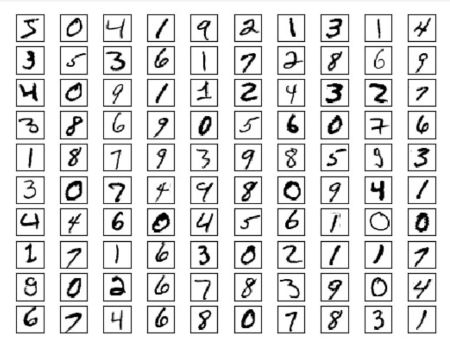

Anda dapat melihat bahwa mereka memang terlihat seperti angka tulisan tangan.

NOTE

Upaya pertama saya untuk menampilkan gambar menghasilkan angka kuning dengan latar belakang hitam. Saya tidak pintar atau cukup halus untuk mengetahui bahwa saya perlu menambahkan cmap=Greys untuk mendapatkan gambar hitam-putih; Saya mencarinya di Google dan menemukan solusinya di Stack Overflow. Sebagai seorang ilmuwan data, Anda akan menjadi cukup mahir dalam alur kerja ini.

Kami juga perlu memuat gambar uji:

In [ ]:
test_images = mnist.test_images().tolist()
test_labels = mnist.test_labels().tolist()

assert shape(test_images) == [10000, 28, 28]
assert shape(test_labels) == [10000]

Setiap gambar berukuran 28 × 28 piksel, tetapi lapisan linier kami hanya dapat menangani input satu dimensi, jadi kami akan meratakannya (dan juga membaginya dengan 256 untuk mendapatkan antara 0 dan 1). Selain itu, jaringan saraf kita akan berlatih lebih baik jika rata-rata masukan kita adalah 0, jadi kita akan mengurangi nilai rata-ratanya:

In [ ]:
# Compute the average pixel value
avg = tensor_sum(train_images) / 60000 / 28 / 28

# Recenter, rescale, and flatten
train_images = [[(pixel - avg) / 256 for row in image for pixel in row]
                for image in train_images]
test_images = [[(pixel - avg) / 256 for row in image for pixel in row]
               for image in test_images]

assert shape(train_images) == [60000, 784], "images should be flattened"
assert shape(test_images) == [10000, 784], "images should be flattened"

# After centering, average pixel should be very close to 0
assert -0.0001 < tensor_sum(train_images) < 0.0001

Kami juga ingin melakukan one-hot-encode pada target, karena kami memiliki 10 output. Pertama mari kita tulis fungsi one_hot_encode:

In [ ]:
def one_hot_encode(i: int, num_labels: int = 10) -> List[float]:
    return [1.0 if j == i else 0.0 for j in range(num_labels)]

assert one_hot_encode(3) == [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
assert one_hot_encode(2, num_labels=5) == [0, 0, 1, 0, 0]

lalu menerapkannya ke data kami:

In [ ]:
train_labels = [one_hot_encode(label) for label in train_labels]
test_labels = [one_hot_encode(label) for label in test_labels]

assert shape(train_labels) == [60000, 10]
assert shape(test_labels) == [10000, 10]

Salah satu kekuatan abstraksi kami adalah bahwa kami dapat menggunakan loop pelatihan/evaluasi yang sama dengan berbagai model. Jadi mari kita tulis dulu. Kami akan menyebarkannya model kami, data, fungsi kerugian, dan (jika kami melatih) pengoptimal.

Ini akan melewati data kami, melacak kinerja, dan (jika kami mengirimkan pengoptimal) memperbarui parameter kami:

In [ ]:
import tqdm

def loop(model: Layer,
         images: List[Tensor],
         labels: List[Tensor],
         loss: Loss,
         optimizer: Optimizer = None) -> None:
    correct = 0         # Track number of correct predictions.
    total_loss = 0.0    # Track total loss.

    with tqdm.trange(len(images)) as t:
        for i in t:
            predicted = model.forward(images[i])             # Predict.
            if argmax(predicted) == argmax(labels[i]):       # Check for
                correct += 1                                 # correctness.
            total_loss += loss.loss(predicted, labels[i])    # Compute loss.

            # If we're training, backpropagate gradient and update weights.
            if optimizer is not None:
                gradient = loss.gradient(predicted, labels[i])
                model.backward(gradient)
                optimizer.step(model)

            # And update our metrics in the progress bar.
            avg_loss = total_loss / (i + 1)
            acc = correct / (i + 1)
            t.set_description(f"mnist loss: {avg_loss:.3f} acc: {acc:.3f}")

Sebagai dasar, kita dapat menggunakan perpustakaan *deep learning* kita untuk melatih model regresi logistik (multikelas), yang hanya merupakan lapisan linier tunggal yang diikuti oleh softmax. Model ini (pada dasarnya) hanya mencari 10 fungsi linier sedemikian rupa sehingga jika masukannya mewakili, katakanlah, 5, maka fungsi linier ke-5 menghasilkan keluaran terbesar.

Satu langkah melalui 60.000 contoh pelatihan kami seharusnya cukup untuk mempelajari model:

In [ ]:
random.seed(0)

# Logistic regression is just a linear layer followed by softmax
model = Linear(784, 10)
loss = SoftmaxCrossEntropy()

# This optimizer seems to work
optimizer = Momentum(learning_rate=0.01, momentum=0.99)

# Train on the training data
loop(model, train_images, train_labels, loss, optimizer)

# Test on the test data (no optimizer means just evaluate)
loop(model, test_images, test_labels, loss)

Ini mendapat sekitar 89% akurasi. Mari kita lihat apakah kita dapat melakukan yang lebih baik dengan jaringan saraf yang dalam. Kami akan menggunakan dua layer tersembunyi, yang pertama dengan 30 neuron, dan yang kedua dengan 10 neuron. Dan kita akan menggunakan aktivasi Tanh:

In [ ]:
random.seed(0)

# Name them so we can turn train on and off
dropout1 = Dropout(0.1)
dropout2 = Dropout(0.1)

model = Sequential([
    Linear(784, 30), # Hidden layer 1: size 30
    dropout1,
    Tanh(),
    Linear(30, 10), # Hidden layer 2: size 10
    dropout2,
    Tanh(),
    Linear(10, 10) # Output layer: size 10
])

Dan kita bisa menggunakan loop pelatihan yang sama!

In [ ]:
optimizer = Momentum(learning_rate=0.01, momentum=0.99)
loss = SoftmaxCrossEntropy()

# Enable dropout and train (takes > 20 minutes on my laptop!)
dropout1.train = dropout2.train = True
loop(model, train_images, train_labels, loss, optimizer)

# Disable dropout and evaluate
dropout1.train = dropout2.train = False
loop(model, test_images, test_labels, loss)

Model mendalam kami mendapatkan akurasi lebih baik dari 92% pada set pengujian, yang merupakan peningkatan bagus dari model logistik sederhana.

Situs web MNIST menjelaskan berbagai model yang mengungguli model tersebut. Banyak di antaranya dapat diimplementasikan menggunakan mesin yang telah kami kembangkan sejauh ini, tetapi akan membutuhkan waktu yang sangat lama untuk melatih kerangka kerja daftar-sebagai-tensor kami. Beberapa model terbaik melibatkan lapisan konvolusional, yang penting tetapi sayangnya berada di luar cakupan buku pengantar tentang ilmu data.

##Model Penyimpanan dan Pemuatan
Model-model ini membutuhkan waktu lama untuk dilatih, jadi alangkah baiknya jika kita dapat menyimpannya sehingga kita tidak perlu melatihnya setiap saat. Untungnya, kita dapat menggunakan modul json untuk dengan mudah membuat serialisasi bobot model ke sebuah file.

Untuk menyimpan, kita dapat menggunakan Layer.params untuk mengumpulkan bobot, memasukkannya ke dalam daftar, dan menggunakan json.dump untuk menyimpan daftar tersebut ke file:

In [ ]:
import json

def save_weights(model: Layer, filename: str) -> None:
    weights = list(model.params())
    with open(filename, 'w') as f:
        json.dump(weights, f)

Memuat beban kembali hanyalah sedikit pekerjaan lagi. Kami hanya menggunakan json.load untuk mendapatkan kembali daftar bobot dari file dan penugasan slice untuk mengatur bobot model kami.

(Secara khusus, ini berarti bahwa kita harus membuat model sendiri dan kemudian memuat bobot. Pendekatan alternatif juga akan menyimpan beberapa representasi dari arsitektur model dan menggunakannya untuk membuat model. Itu bukan ide yang buruk, tetapi itu akan memerlukan lebih banyak kode dan perubahan pada semua Lapisan kita, jadi kita akan tetap menggunakan cara yang lebih sederhana.)

Sebelum kami memuat bobot, kami ingin memeriksa apakah mereka memiliki bentuk yang sama dengan param model yang kami muat. (Ini adalah perlindungan terhadap, misalnya, mencoba memuat bobot untuk jaringan dalam yang tersimpan ke dalam jaringan dangkal, atau masalah serupa.)

In [ ]:
def load_weights(model: Layer, filename: str) -> None:
    with open(filename) as f:
      weights = json.load(f)

    # Check for consistency
    assert all(shape(param) == shape(weight)
               for param, weight in zip(model.params(), weights))

    # Then load using slice assignment
    for param, weight in zip(model.params(), weights):
        param[:] = weight

# Bab 19 Pengelompokan
Muthia Yulisa (4112321035)

Yudha Setya Wicaksana (4112321012)

##  Sebuah Ide

Setiap kali Anda melihat beberapa sumber data, kemungkinan besar data tersebut akan membentuk cluster. A
kumpulan data yang menunjukkan tempat tinggal para jutawan mungkin memiliki kelompok di tempat-tempat seperti Beverly Hills dan
Manhattan. Kumpulan data yang menunjukkan berapa jam orang bekerja setiap minggu mungkin memiliki cluster
40 (dan jika diambil dari negara bagian dengan undang-undang yang mengamanatkan tunjangan khusus untuk setidaknya orang yang bekerja
20 jam seminggu, mungkin ada cluster lain sekitar 19). Kumpulan data demografis dari
pemilih terdaftar cenderung membentuk berbagai kelompok (misalnya, "ibu sepak bola", "pensiunan yang bosan",
“milenial pengangguran”) yang dianggap relevan oleh lembaga survei dan konsultan politik.

Tidak seperti beberapa masalah yang telah kami lihat, umumnya tidak ada pengelompokan yang "benar". Sebuah
skema pengelompokan alternatif mungkin mengelompokkan beberapa “generasi milenial yang menganggur” dengan “lulusan
siswa", dan lainnya dengan "penghuni ruang bawah tanah orang tua". Tidak ada skema yang lebih benar
—sebagai gantinya, masing-masing cenderung lebih optimal sehubungan dengan "seberapa bagus clusternya?" metrik.
Selain itu, cluster tidak akan melabeli dirinya sendiri. Anda harus melakukannya dengan melihat data
mendasari masing-masing.

## Sebuah Model

Bagi kami, setiap input akan menjadi vektor dalam ruang d-dimensi, yang, seperti biasa, akan kami wakili sebagai a
daftar nomor. Tujuan kami adalah untuk mengidentifikasi kelompok input serupa dan (kadang-kadang) untuk menemukan a
nilai representatif untuk setiap cluster.

Misalnya, setiap input dapat berupa vektor numerik yang merepresentasikan judul posting blog, di mana
jika tujuannya mungkin untuk menemukan kelompok posting serupa, mungkin untuk memahami apa yang pengguna kami
ngeblog tentang. Atau bayangkan kita memiliki gambar yang berisi ribuan (merah, hijau, biru)
warna dan kita perlu mencetak versi 10 warna itu. Pengelompokan dapat membantu kita memilih 10
warna yang akan meminimalkan total "kesalahan warna."

Salah satu metode pengelompokan yang paling sederhana adalah k-means, di mana jumlah k cluster dipilih
maju, setelah itu tujuannya adalah untuk mempartisi input menjadi set dengan cara yang meminimalkan total
jumlah kuadrat jarak dari setiap titik ke rata-rata cluster yang ditugaskan.

Salah satu metode pengelompokan yang paling sederhana adalah k-means, di mana jumlah k cluster dipilih
maju, setelah itu tujuannya adalah untuk mempartisi input menjadi set dengan cara yang meminimalkan total
jumlah kuadrat jarak dari setiap titik ke rata-rata cluster yang ditugaskan.

Ada banyak cara untuk menetapkan n poin ke k cluster, yang berarti menemukan clustering yang optimal
adalah masalah yang sangat sulit. Kami akan menerima algoritme iteratif yang biasanya menemukan pengelompokan yang baik:



*   Mulailah dengan satu set k-means, yang merupakan titik-titik dalam ruang d-dimensi.
*   Tetapkan setiap titik ke rata-rata terdekatnya.
*   Jika tidak ada penugasan poin yang berubah, hentikan dan pertahankan cluster.
*   Jika penugasan beberapa poin telah berubah, hitung ulang rata-rata dan kembali ke langkah 2.

Menggunakan fungsi vector_mean dari Bab 4, cukup mudah untuk membuat kelas yang melakukan ini.
Untuk memulainya, kita akan membuat fungsi pembantu yang mengukur berapa banyak perbedaan koordinat dua vektor
di. Kami akan menggunakan ini untuk melacak kemajuan pelatihan kami:

In [ ]:
from scratch.linear_algebra import Vector
def num_differences(v1: Vector, v2: Vector) -> int:
assert len(v1) == len(v2)
return len([x1 for x1, x2 in zip(v1, v2) if x1 != x2])
assert num_differences([1, 2, 3], [2, 1, 3]) == 2
assert num_differences([1, 2], [1, 2]) == 0

Kami juga membutuhkan fungsi yang, dengan memberikan beberapa vektor dan penugasannya ke cluster, menghitungnya
sarana cluster. Mungkin beberapa cluster tidak memiliki poin yang ditetapkan padanya. Kami tidak bisa mengambil
rata-rata koleksi kosong, jadi dalam hal ini kami hanya akan secara acak memilih salah satu poin untuk dijadikan
"rata-rata" dari cluster itu:

In [ ]:
from typing import List
from scratch.linear_algebra import vector_mean
def cluster_means(k: int,

inputs: List[Vector],
assignments: List[int]) -> List[Vector]:
# clusters[i] contains the inputs whose assignment is i
clusters = [[] for i in range(k)]
for input, assignment in zip(inputs, assignments):
clusters[assignment].append(input)
# if a cluster is empty, just use a random point
return [vector_mean(cluster) if cluster else random.choice(inputs)
for cluster in clusters]

Dan sekarang kami siap untuk mengkodekan clusterer kami. Seperti biasa, kami akan menggunakan tqdm untuk melacak kemajuan kami, tetapi di sini kami tidak tahu berapa banyak iterasi yang diperlukan, jadi kami kemudian menggunakan itertools.count, yang mana membuat iterable tak terbatas, dan kami akan mengembalikannya setelah selesai:

In [ ]:
import itertools
import random
import tqdm
from scratch.linear_algebra import squared_distance
class KMeans:
def __init__(self, k: int) -> None:
self.k = k # number of clusters
self.means = None
def classify(self, input: Vector) -> int:
"""return the index of the cluster closest to the input"""
return min(range(self.k),

key=lambda i: squared_distance(input, self.means[i]))

def train(self, inputs: List[Vector]) -> None:
# Start with random assignments
assignments = [random.randrange(self.k) for _ in inputs]
with tqdm.tqdm(itertools.count()) as t:
for _ in t:
# Compute means and find new assignments
self.means = cluster_means(self.k, inputs, assignments)
new_assignments = [self.classify(input) for input in inputs]
# Check how many assignments changed and if we're done
num_changed = num_differences(assignments, new_assignments)
if num_changed == 0:
return
# Otherwise keep the new assignments, and compute new means
assignments = new_assignments
self.means = cluster_means(self.k, inputs, assignments)
t.set_description(f"changed: {num_changed} / {len(inputs)}")

Mari kita lihat cara kerjanya.

## Contoh: Pertemuan

Untuk merayakan pertumbuhan DataSciencester, VP User Rewards Anda ingin mengatur beberapa
pertemuan orang untuk pengguna di kota Anda, lengkap dengan bir, pizza, dan kaos DataSciencester.

Anda mengetahui lokasi semua pengguna lokal Anda (Gambar 20-1), dan dia ingin Anda memilih pertemuan
lokasi yang memudahkan semua orang untuk hadir.


Bergantung pada bagaimana Anda melihatnya, Anda mungkin melihat dua atau tiga kelompok. (Ini mudah dilakukan secara visual
karena datanya hanya dua dimensi. Dengan lebih banyak dimensi, akan jauh lebih sulit untuk dilihat.)
Bayangkan dulu dia memiliki anggaran yang cukup untuk tiga pertemuan. Anda pergi ke komputer Anda dan coba ini:

In [ ]:
random.seed(12) # so you get the same results as me
clusterer = KMeans(k=3)
clusterer.train(inputs)
means = sorted(clusterer.means) # sort for the unit test
assert len(means) == 3
# Check that the means are close to what we expect
assert squared_distance(means[0], [-44, 5]) < 1
assert squared_distance(means[1], [-16, -10]) < 1
assert squared_distance(means[2], [18, 20]) < 1

Anda menemukan tiga klaster yang berpusat di [–44, 5], [–16, –10], dan [18, 20], dan Anda mencari tempat pertemuan
dekat lokasi tersebut (Gambar 20-2).


Anda menunjukkan hasil Anda kepada VP, yang memberi tahu Anda bahwa sekarang dia hanya memiliki anggaran yang cukup untuk dua orang
pertemuan.

"Tidak masalah," Anda berkata:

In [ ]:
random.seed(0)
clusterer = KMeans(k=2)
clusterer.train(inputs)
means = sorted(clusterer.means)
assert len(means) == 2
assert squared_distance(means[0], [-26, -5]) < 1
assert squared_distance(means[1], [18, 20]) < 1

Seperti yang ditunjukkan pada Gambar 20-3, satu pertemuan seharusnya masih dekat [18, 20], tetapi sekarang pertemuan lainnya harus dekat [–26, –5].

## Memilih K

Pada contoh sebelumnya, pemilihan k didorong oleh faktor-faktor di luar kendali kita. Secara umum, ini
tidak akan terjadi. Ada berbagai cara untuk memilih k. Salah satu yang cukup mudah dimengerti
melibatkan memplot jumlah kesalahan kuadrat (antara setiap titik dan rata-rata klasternya) sebagai a
fungsi k dan melihat di mana grafik "membungkuk":

In [ ]:
from matplotlib import pyplot as plt
def squared_clustering_errors(inputs: List[Vector], k: int) -> float:
"""finds the total squared error from k-means clustering the inputs"""
clusterer = KMeans(k)
clusterer.train(inputs)
means = clusterer.means
assignments = [clusterer.classify(input) for input in inputs]
return sum(squared_distance(input, means[cluster])
for input, cluster in zip(inputs, assignments))

yang dapat kita terapkan pada contoh kita sebelumnya:

In [ ]:
plt.imshow(new_img)
plt.axis('off')
plt.show()

Melihat Gambar 20-4, metode ini sesuai dengan anggapan awal kita bahwa tiga adalah yang "benar" jumlah cluster.

## Contoh: Clustering Warna


VP of Swag telah merancang stiker DataSciencester yang menarik yang dia ingin Anda bagikan

pertemuan. Sayangnya, printer stiker Anda hanya bisa mencetak maksimal lima warna per stiker. Dan sejak VP
of Art sedang cuti panjang, VP of Swag bertanya apakah ada cara agar Anda dapat mengambil desainnya dan memodifikasinya
sehingga hanya berisi lima warna.
Gambar komputer dapat direpresentasikan sebagai susunan piksel dua dimensi, di mana setiap piksel itu sendiri a
vektor tiga dimensi (merah, hijau, biru) yang menunjukkan warnanya.
Membuat versi lima warna dari gambar, kemudian, memerlukan:



*   Memilih lima warna.
*   Menetapkan salah satu warna tersebut ke setiap piksel.

Ternyata ini adalah tugas yang bagus untuk pengelompokan k-means, yang dapat mempartisi piksel menjadi lima kelompok
dalam ruang merah-hijau-biru. Jika kemudian kami mewarnai ulang piksel di setiap kluster ke warna rata-rata, kami selesai.
Untuk memulainya, kita membutuhkan cara untuk memuat gambar ke dalam Python. Kita bisa melakukan ini dengan matplotlib, jika kita
pertama instal perpustakaan bantal:

    python -m pip install pillow
Kemudian kita bisa menggunakan matplotlib.image.imread:

In [ ]:
image_path = r"girl_with_book.jpg"    # wherever your image is
import matplotlib.image as mpimg
img = mpimg.imread(image_path) / 256  # rescale to between 0 and 1

Di belakang layar img adalah array NumPy, tetapi untuk tujuan kita, kita dapat memperlakukannya sebagai daftar dari daftar. img[i][j] adalah piksel pada baris ke-i dan kolom ke-j, dan setiap piksel adalah daftar [merah, hijau, biru] angka antara 0 dan 1 yang menunjukkan warna piksel tersebut:

In [ ]:
top_row = img[0]
top_left_pixel = top_row[0]
red, green, blue = top_left_pixel

Secara khusus, kita bisa mendapatkan daftar semua piksel yang diratakan sebagai:

In [ ]:
# .tolist() converts a NumPy array to a Python list
pixels = [pixel.tolist() for row in img for pixel in row]

dan kemudian berikan mereka ke clusterer kami:

In [ ]:
clusterer = KMeans(5)
clusterer.train(pixels) # this might take a while

Setelah selesai, kita tinggal membuat gambar baru dengan format yang sama:

In [ ]:
def recolor(pixel: Vector) -> Vector:
cluster = clusterer.classify(pixel) # index of the closest cluster
return clusterer.means[cluster] # mean of the closest cluster
new_img = [[recolor(pixel) for pixel in row] # recolor this row of pixels
for row in img] # for each row in the image

dan tampilkan, menggunakan plt.imshow:

In [ ]:
plt.imshow(new_img)
plt.axis('off')
plt.show()

Sulit untuk menunjukkan hasil warna dalam buku hitam-putih, tetapi Gambar 20-5 menunjukkan skala abu-abu versi gambar penuh warna dan keluaran menggunakan proses ini untuk menguranginya menjadi lima warna.

## Pengelompokan Hirarkis Bawah-Atas

Pendekatan alternatif untuk pengelompokan adalah “menumbuhkan” kelompok dari bawah ke atas. Kita bisa melakukan ini di
cara berikut:

1.   Jadikan setiap input clusternya sendiri.
2.   Selama masih ada beberapa cluster yang tersisa, temukan dua cluster terdekat dan gabungkan
mereka.

Pada akhirnya, kita akan memiliki satu kluster raksasa yang berisi semua masukan. Jika kami melacak urutan penggabungan,
kita dapat membuat ulang sejumlah cluster dengan memisahkan. Misalnya, jika kita ingin tiga cluster, kita bisa
batalkan saja dua penggabungan terakhir.

Kami akan menggunakan representasi cluster yang sangat sederhana. Nilai-nilai kita akan hidup dalam gugusan daun, yang kita
akan mewakili sebagai NamedTuples:

In [ ]:
from typing import NamedTuple, Union
class Leaf(NamedTuple):
value: Vector
leaf1 = Leaf([10, 20])
leaf2 = Leaf([30, -15])

Kami akan menggunakan ini untuk menumbuhkan cluster gabungan, yang juga akan kami wakili sebagai NamedTuples:

In [ ]:
class Merged(NamedTuple):
children: tuple
order: int
merged = Merged((leaf1, leaf2), order=1)
Cluster = Union[Leaf, Merged]

Kita akan berbicara sedikit tentang urutan penggabungan, tetapi pertama-tama mari kita buat fungsi pembantu yang secara rekursif mengembalikan semua
nilai-nilai yang terkandung dalam cluster (mungkin digabungkan):

In [ ]:
def get_values(cluster: Cluster) -> List[Vector]:
if isinstance(cluster, Leaf):
return [cluster.value]
else:
return [value
for child in cluster.children
for value in get_values(child)]
assert get_values(merged) == [[10, 20], [30, -15]]

Untuk menggabungkan cluster-cluster terdekat, kita memerlukan beberapa pengertian tentang jarak antar cluster. Dengan baik menggunakan jarak minimum antara elemen dari dua cluster, yang menggabungkan dua cluster itu paling dekat dengan sentuhan (tetapi terkadang akan menghasilkan kelompok besar seperti rantai yang tidak terlalu rapat). Jika kami menginginkan klaster bola yang rapat, kami mungkin menggunakan jarak maksimum sebagai gantinya, karena menggabungkan keduanya cluster yang muat di bola terkecil. Keduanya adalah pilihan umum, seperti jarak rata-rata:

In [ ]:
from typing import Callable
from scratch.linear_algebra import distance

def cluster_distance(cluster1: Cluster,
cluster2: Cluster,
distance_agg: Callable = min) -> float:

"""
compute all the pairwise distances between cluster1 and cluster2
and apply the aggregation function _distance_agg_ to the resulting list
"""
return distance_agg([distance(v1, v2)

for v1 in get_values(cluster1)
for v2 in get_values(cluster2)])

Kami akan menggunakan slot pesanan gabungan untuk melacak urutan di mana kami melakukan penggabungan. Angka yang lebih kecil akan mewakili penggabungan nanti. Ini berarti ketika kami ingin memisahkan cluster, kami melakukannya dari penggabungan terendah urutan ke tertinggi. Karena kluster Daun tidak pernah digabungkan, kami akan menetapkannya tak terhingga, yang tertinggi nilai yang mungkin. Dan karena mereka tidak memiliki properti .order, kami akan membuat fungsi pembantu:

In [ ]:
def get_merge_order(cluster: Cluster) -> float:
if isinstance(cluster, Leaf):
return float('inf') # was never merged
else:
return cluster.order

mengembalikan cluster.order

Demikian pula, karena kluster Daun tidak memiliki turunan, kami akan membuat dan menambahkan fungsi pembantu untuk itu:

In [ ]:
from typing import Tuple
def get_children(cluster: Cluster):
if isinstance(cluster, Leaf):
raise TypeError("Leaf has no children")
else:
return cluster.children

Sekarang kami siap membuat algoritme pengelompokan:

In [ ]:
def bottom_up_cluster(inputs: List[Vector],

distance_agg: Callable = min) -> Cluster:

# Start with all leaves
clusters: List[Cluster] = [Leaf(input) for input in inputs]
def pair_distance(pair: Tuple[Cluster, Cluster]) -> float:
return cluster_distance(pair[0], pair[1], distance_agg)
# as long as we have more than one cluster left...
while len(clusters) > 1:
# find the two closest clusters
c1, c2 = min(((cluster1, cluster2)

for i, cluster1 in enumerate(clusters)
for cluster2 in clusters[:i]),
key=pair_distance)
# remove them from the list of clusters

clusters = [c for c in clusters if c != c1 and c != c2]
# merge them, using merge_order = # of clusters left
merged_cluster = Merged((c1, c2), order=len(clusters))
# and add their merge
clusters.append(merged_cluster)
# when there's only one cluster left, return it
return clusters[0]

Menggunakannya sangat simple:

In [ ]:
base_cluster = bottom_up_cluster(inputs)

Ini menghasilkan pengelompokan yang terlihat sebagai berikut:

suruh ngasih gambar

Angka di atas menunjukkan "urutan gabungan". Karena kami memiliki 20 input, butuh 19 penggabungan untuk mencapainya
klaster yang satu ini. Penggabungan pertama membuat cluster 18 dengan menggabungkan daun [19, 28] dan [21, 27]. Dan
penggabungan terakhir membuat cluster 0.

Jika Anda hanya menginginkan dua klaster, Anda akan membaginya pada garpu pertama (“0”), membuat satu klaster dengan enam titik
dan satu detik dengan yang lainnya. Untuk tiga kluster, Anda akan melanjutkan ke garpu kedua (“1”), yaitu
menunjukkan untuk membagi cluster pertama menjadi cluster dengan ([19, 28], [21, 27], [20, 23], [26, 13]) dan
klaster dengan ([11, 15], [13, 13]). Dan seterusnya.

Namun, secara umum, kami tidak ingin menyipitkan mata pada representasi teks yang buruk seperti ini. Sebaliknya, mari
tulis fungsi yang menghasilkan sejumlah cluster dengan melakukan jumlah yang sesuai
memisahkan:

In [ ]:
def generate_clusters(base_cluster: Cluster,

num_clusters: int) -> List[Cluster]:
# start with a list with just the base cluster
clusters = [base_cluster]
# as long as we don't have enough clusters yet...
while len(clusters) < num_clusters:
# choose the last-merged of our clusters
next_cluster = min(clusters, key=get_merge_order)
# remove it from the list
clusters = [c for c in clusters if c != next_cluster]
# and add its children to the list (i.e., unmerge it)
clusters.extend(get_children(next_cluster))
# once we have enough clusters...
return clusters

Jadi, misalnya, jika kita ingin membuat tiga cluster, kita cukup melakukan:

In [ ]:
three_clusters = [get_values(cluster)

for cluster in generate_clusters(base_cluster, 3)]

yang dapat kita plot dengan mudah:

In [ ]:
for i, cluster, marker, color in zip([1, 2, 3],
three_clusters,
['D','o','*'],
['r','g','b']):
xs, ys = zip(*cluster) # magic unzipping trick
plt.scatter(xs, ys, color=color, marker=marker)
# put a number at the mean of the cluster
x, y = vector_mean(cluster)
plt.plot(x, y, marker='$' + str(i) + '$', color='black')
plt.title("User Locations -- 3 Bottom-Up Clusters, Min")
plt.xlabel("blocks east of city center")
plt.ylabel("blocks north of city center")
plt.show()

Ini memberikan hasil yang sangat berbeda dari k-means, seperti yang ditunjukkan pada Gambar 20-6.

ngasih gambar

Seperti disebutkan sebelumnya, ini karena menggunakan min di cluster_distance cenderung memberikan seperti rantai cluster. Jika kita malah menggunakan max (yang memberikan cluster ketat), itu terlihat sama dengan hasil 3-means (Gambar 20-7).

## Untuk Penjelasan Lebih Lanjut

*   scikit-learn memiliki seluruh modul, sklearn.cluster, yang berisi beberapa pengelompokan
algoritma termasuk KMeans dan algoritma pengelompokan hierarki Ward (yang menggunakan a
kriteria yang berbeda untuk menggabungkan cluster daripada yang kami lakukan).
*   SciPy memiliki dua model pengelompokan: scipy.cluster.vq, yang berarti k-means, dan
scipy.cluster.hierarchy, yang memiliki berbagai algoritma pengelompokan hierarkis.

# BAB 20. Pemrosesan Bahasa Alami
Tangkas Pangestu (4112321021) \\
Indah Fitri Auliya (4112321031)

*Pemrosesan bahasa alami* (NLP) mengacu pada teknik komputasi yang melibatkan bahasa. Ini bidang yang luas, tetapi kita akan melihat beberapa teknik, baik yang sederhana maupun yang tidak sederhana.

##Clouds Kata

Pada Bab 1, kita menghitung jumlah kata dari minat pengguna. Salah satu pendekatan untuk memvisualisasikan kata dan jumlah adalah cloud, yang secara artistik menggambarkan kata-kata pada ukuran yang sebanding dengan jumlah mereka.

Namun, secara umum, ilmuwan data tidak terlalu memikirkan cloud kata, sebagian besar karena penempatan kata tidak berarti apa pun selain "di sini ada ruang tempat saya dapat memasukkan kata".

Jika Anda pernah dipaksa untuk membuat cloud kata, pikirkan apakah Anda dapat membuat sumbu menyampaikan sesuatu. Misalnya, bayangkan bahwa, untuk setiap kumpulan kata kunci terkait ilmu data, Anda memiliki dua angka antara 0 dan 100—angka pertama menunjukkan seberapa sering kata itu muncul di posting pekerjaan, dan yang kedua menunjukkan seberapa sering kata itu muncul di resume:

In [ ]:
data = [ ("big data", 100, 15), ("Hadoop", 95, 25), ("Python", 75, 50),
         ("R", 50, 40), ("machine learning", 80, 20), ("statistics", 20, 60),
         ("data science", 60, 70), ("analytics", 90, 3),
         ("team player", 85, 85), ("dynamic", 2, 90), ("synergies", 70, 0),
         ("actionable insights", 40, 30), ("think out of the box", 45, 10),
         ("self-starter", 30, 50), ("customer focus", 65, 15),
         ("thought leadership", 35, 35)]


Pendekatan cloud kata hanya untuk mengatur kata-kata pada halaman dalam font yang tampak keren (Gambar 21-1).

Ini terlihat rapi tetapi tidak benar-benar memberi tahu kita apa pun. Pendekatan yang lebih menarik mungkin dengan menyebarkannya sehingga posisi horizontal menunjukkan popularitas posting dan posisi vertikal menunjukkan popularitas resume, yang menghasilkan visualisasi yang menyampaikan beberapa wawasan (Gambar 21-2)

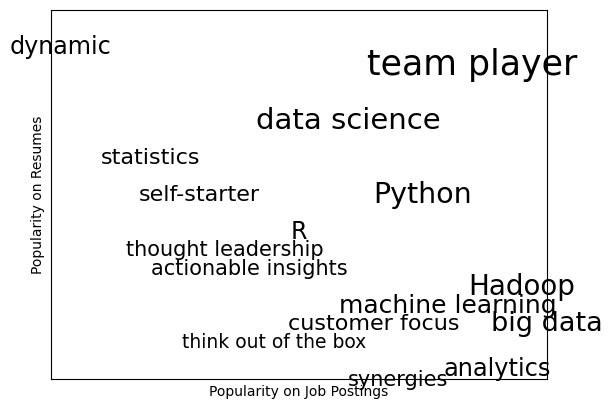

In [ ]:
from matplotlib import pyplot as plt

def text_size(total: int) -> float:
    """equals 8 if total is 0, 28 if total is 200"""
    return 8 + total / 200 * 20

for word, job_popularity, resume_popularity in data:
    plt.text(job_popularity, resume_popularity, word,
              ha='center', va='center',
              size=text_size(job_popularity + resume_popularity))
plt.xlabel("Popularity on Job Postings")
plt.ylabel("Popularity on Resumes")
plt.axis([0, 100, 0, 100])
plt.xticks([])
plt.yticks([])
plt.show()


##Model Bahasa n-Gram

VP DataSciencester dari Search Engine Marketing ingin membuat ribuan halaman web tentang ilmu data sehingga situs Anda akan berperingkat lebih tinggi dalam hasil pencarian untuk istilah terkait ilmu data. (Anda mencoba menjelaskan kepadanya bahwa algoritme mesin telusur cukup pintar sehingga ini tidak akan berhasil, tetapi dia menolak untuk mendengarkan.)

Tentu saja, dia tidak ingin menulis ribuan halaman web, dia juga tidak ingin membayar segerombolan “ahli strategi konten” untuk melakukannya. Alih-alih, dia bertanya kepada Anda apakah Anda dapat membuat halaman web ini secara terprogram. Untuk melakukan ini, kita memerlukan beberapa cara bahasa pemodelan.

Salah satu pendekatannya adalah memulai dengan sekumpulan dokumen dan mempelajari model statistik bahasa. Dalam kasus kita, kita akan mulai dengan esai Mike Loukides “What Is Data Science?”

Seperti di Bab 9, kita akan menggunakan pustaka Permintaan dan Sup Cantik untuk mengambil data. Ada beberapa masalah yang perlu diperhatikan.

Yang pertama adalah bahwa apostrof dalam teks sebenarnya adalah karakter Unicode u"\u2019". Kita akan membuat fungsi pembantu untuk menggantinya dengan apostrof normal:

In [ ]:
def fix_unicode(text: str) -> str:
    return text.replace(u"\u2019", "'")


Masalah kedua adalah begitu kita mendapatkan teks halaman web, kita ingin membaginya menjadi urutan kata dan titik (sehingga kita dapat mengetahui di mana akhir kalimat). Kita dapat melakukan ini menggunakan re.findall:

In [ ]:
import re
from bs4 import BeautifulSoup
import requests

url = "https://www.oreilly.com/ideas/what-is-data-science"
html = requests.get(url).text
soup = BeautifulSoup(html, 'html5lib')

content = soup.find("div", "article-body")   # find article-body div
regex = r"[\w']+|[\.]"                       # matches a word or a period

document = []

for paragraph in content("p"):
    words = re.findall(regex, fix_unicode(paragraph.text))
    document.extend(words)


TypeError: ignored

Kita tentu saja dapat (dan mungkin harus) membersihkan data ini lebih lanjut. Masih ada sejumlah teks asing dalam dokumen (misalnya, kata pertama adalah Bagian), dan kita telah membagi periode kalimat tengah (misalnya, di Web 2.0), dan ada beberapa keterangan dan daftar tersebar di seluruh . Karena itu, kita akan mengerjakan dokumen sebagaimana adanya.

Sekarang setelah kita memiliki teks sebagai rangkaian kata, kita dapat memodelkan bahasa dengan cara berikut: diberi beberapa kata awal (katakanlah, buku), kita melihat semua kata yang mengikutinya di dokumen sumber. Kita secara acak memilih salah satu dari ini untuk menjadi kata berikutnya, dan kita mengulangi prosesnya sampai kita mencapai titik, yang menandakan akhir kalimat. Kita menyebutnya model bigram, karena ditentukan sepenuhnya oleh frekuensi bigram (pasangan kata) dalam data asli.

Bagaimana dengan kata awal? Kita hanya dapat memilih secara acak dari kata-kata yang mengikuti periode. Untuk memulai, mari hitung terlebih dahulu kemungkinan transisi kata. Ingatlah bahwa zip berhenti ketika salah satu inputnya selesai, sehingga zip(document, document[1:]) memberi kita secara tepat pasangan elemen dokumen yang berurutan:

In [ ]:
from collections import defaultdict

transitions = defaultdict(list)
for prev, current in zip(document, document[1:]):
    transitions[prev].append(current)


Sekarang kami siap membuat kalimat:

In [ ]:
from collections import defaultdict

transitions = defaultdict(list)
for prev, current in zip(document, document[1:]):
    transitions[prev].append(current)

def generate_using_bigrams() -> str:
    current = "."   # this means the next word will start a sentence
    result = []
    while True:
        next_word_candidates = transitions[current]    # bigrams (current, _)
        current = random.choice(next_word_candidates)  # choose one at random
        result.append(current)                         # append it to results
        if current == ".": return " ".join(result)     # if "." we're done

Kalimat yang dihasilkannya adalah omong kosong, tetapi itu adalah jenis omong kosong yang mungkin Anda tempatkan di situs web Anda jika Anda mencoba untuk terdengar ilmiah. Misalnya:

*Jika Anda mungkin tahu mana yang Anda inginkan untuk menyortir data, memberi feeds web teman seseorang tentang topik yang sedang tren karena data di Hadoop adalah ilmu data yang memerlukan buku yang menunjukkan mengapa visualisasi ada, tetapi kita melakukan korelasi besar-besaran di banyak disk drive komersial dalam bahasa Python dan membuat lebih banyak formulir yang dapat dilacak membuat koneksi kemudian menggunakan dan menggunakannya untuk menyelesaikan data*. —Model Besar

Kita bisa membuat kalimat-kalimatnya tidak terlalu muluk-muluk dengan melihat *trigram*, triplet dari kata-kata yang berurutan. (Secara umum, Anda mungkin melihat *n-gram* yang terdiri dari *n* kata berurutan, tetapi tiga sudah cukup bagi kami.) Sekarang transisi akan bergantung pada *dua* kata sebelumnya:

In [ ]:
trigram_transitions = defaultdict(list)
starts = []

for prev, current, next in zip(document, document[1:], document[2:]):

    if prev == ".":             # if the previous "word" was a period
        starts.append(current)  # then this is a start word

    trigram_transitions[(prev, current)].append(next)


Perhatikan bahwa sekarang kita harus melacak kata awal secara terpisah. Kita dapat membuat kalimat dengan cara yang hampir sama:

In [ ]:
def generate_using_trigrams() -> str:
    current = random.choice(starts) # choose a random starting word
    prev = "."                      # and precede it with a '.'
    result = [current]
    while True:
        next_word_candidates = trigram_transitions[(prev, current)]
        next_word = random.choice(next_word_candidates)

        prev, current = current, next_word
        result.append(current)

        if current == ".":
            return " ".join(result)


Ini menghasilkan kalimat yang lebih baik seperti:

*Kalau dipikir-pikir, MapReduce tampak seperti epidemi dan jika demikian apakah itu memberi kita wawasan baru tentang cara kerja ekonomi?*  —Model Trigram

Tentu saja, mereka terdengar lebih baik karena pada setiap langkah proses pembangkitan memiliki lebih sedikit pilihan, dan pada banyak langkah hanya ada satu pilihan. Artinya, kita sering membuat kalimat (atau setidaknya frasa panjang) yang terlihat secara verbatim di data asli. Memiliki lebih banyak data akan membantu; itu juga akan bekerja lebih baik jika kita mengumpulkan *n-gram* dari beberapa esai tentang ilmu data.

##Tata bahasa

Pendekatan berbeda untuk pemodelan bahasa adalah dengan *tata bahasa*, aturan untuk menghasilkan kalimat yang dapat diterima. Di sekolah dasar, Anda mungkin belajar tentang bagian-bagian pidato dan cara menggabungkannya. Misalnya, jika Anda memiliki guru bahasa Inggris yang sangat buruk, Anda dapat mengatakan bahwa sebuah kalimat harus terdiri dari kata benda yang diikuti oleh kata kerja. Jika Anda kemudian memiliki daftar kata benda dan kata kerja, Anda dapat membuat kalimat sesuai aturan.

Kita akan mendefinisikan tata bahasa yang sedikit lebih rumit:

In [ ]:
from typing import List, Dict

# Type alias to refer to grammars later
Grammar = Dict[str, List[str]]

grammar = {
    "_S"  : ["_NP _VP"],
    "_NP" : ["_N",
             "_A _NP _P _A _N"],
    "_VP" : ["_V",
             "_V _NP"],
    "_N" : ["data science", "Python", "regression"],
    "_A" : ["big", "linear", "logistic"],
    "_P" : ["about", "near"],
    "_V" : ["learns", "trains", "tests", "is"]
}


Saya membuat konvensi bahwa nama yang dimulai dengan *garis* bawah mengacu pada aturan yang perlu diperluas lebih lanjut, dan nama lain adalah *terminal* yang tidak memerlukan pemrosesan lebih lanjut.

Jadi, misalnya, "_S" adalah aturan "kalimat", yang menghasilkan aturan "_NP" ("frasa kata benda") diikuti dengan aturan "_VP" ("frasa kata kerja").

Aturan frasa kata kerja dapat menghasilkan aturan "_V" ("kata kerja"), atau aturan kata kerja yang diikuti oleh aturan frasa kata benda.

Perhatikan bahwa aturan "_NP" memuat dirinya sendiri di salah satu produksinya. Tata bahasa bisa bersifat rekursif, yang memungkinkan bahkan tata bahasa terbatas seperti ini untuk menghasilkan banyak kalimat berbeda yang tak terhingga.

Bagaimana kita menghasilkan kalimat dari tata bahasa ini? Kita akan mulai dengan daftar yang berisi aturan kalimat ["_S"]. Dan kemudian kita akan berulang kali memperluas setiap aturan dengan menggantinya dengan salah satu produksinya yang dipilih secara acak. Kita berhenti ketika kita memiliki daftar yang hanya terdiri dari terminal.

Misalnya, satu perkembangan seperti itu mungkin terlihat seperti:

In [ ]:
['_S']
['_NP','_VP']
['_N','_VP']
['Python','_VP']
['Python','_V','_NP']
['Python','trains','_NP']
['Python','trains','_A','_NP','_P','_A','_N']
['Python','trains','logistic','_NP','_P','_A','_N']
['Python','trains','logistic','_N','_P','_A','_N']
['Python','trains','logistic','data science','_P','_A','_N']
['Python','trains','logistic','data science','about','_A', '_N']
['Python','trains','logistic','data science','about','logistic','_N']
['Python','trains','logistic','data science','about','logistic','Python']

['Python', 'trains', 'logistic', 'data science', 'about', 'logistic', 'Python']

Bagaimana kita menerapkan ini? Nah, untuk memulai, kita akan membuat fungsi pembantu sederhana untuk mengidentifikasi terminal:

In [ ]:
def is_terminal(token: str) -> bool:
    return token[0] != "_"


Selanjutnya kita perlu menulis sebuah fungsi untuk mengubah daftar token menjadi sebuah kalimat. Kita akan mencari token nonterminal pertama. Jika kita tidak dapat menemukannya, itu berarti kita memiliki kalimat lengkap dan selesai.

Jika kita menemukan nonterminal, maka kita memilih salah satu produksinya secara acak. Jika produksi itu adalah terminal (yaitu, sebuah kata), kita cukup mengganti tokennya dengan itu. Jika tidak, itu adalah urutan token nonterminal yang dipisahkan ruang yang perlu kita pisahkan dan kemudian disambungkan ke token saat ini. Either way, kita mengulangi proses pada set token baru.

Menyatukan semuanya, kita mendapatkan:

In [ ]:
def expand(grammar: Grammar, tokens: List[str]) -> List[str]:
    for i, token in enumerate(tokens):
        # If this is a terminal token, skip it.
        if is_terminal(token): continue

        # Otherwise, it's a nonterminal token,
        # so we need to choose a replacement at random.
        replacement = random.choice(grammar[token])

        if is_terminal(replacement):
            tokens[i] = replacement
        else:
            # Replacement could be, e.g., "_NP _VP", so we need to
            # split it on spaces and splice it in.
            tokens = tokens[:i] + replacement.split() + tokens[(i+1):]

        # Now call expand on the new list of tokens.
        return expand(grammar, tokens)

    # If we get here, we had all terminals and are done.
    return tokens

Dan sekarang kita bisa mulai membuat kalimat:

In [ ]:
def generate_sentence(grammar: Grammar) -> List[str]:
    return expand(grammar, ["_S"])


Coba ubah tata bahasa—tambahkan lebih banyak kata, tambahkan lebih banyak aturan, tambahkan bagian ucapan Anda sendiri—hingga Anda siap membuat halaman web sebanyak yang dibutuhkan perusahaan Anda.

Tata bahasa sebenarnya lebih menarik ketika digunakan ke arah lain. Mengingat kalimat, kita bisa menggunakan tata bahasa untuk *mengurai* kalimat. Ini kemudian memungkinkan kita untuk mengidentifikasi subjek dan kata kerja dan membantu kita memahami kalimat tersebut.

Menggunakan ilmu data untuk menghasilkan teks adalah trik yang rapi; menggunakannya untuk memahami teks lebih ajaib. (Lihat "Untuk Eksplorasi Lebih Lanjut" untuk perpustakaan yang dapat Anda gunakan untuk ini.)

##Tambahan: Pengambilan Sampel Gibbs

Menghasilkan sampel dari beberapa distribusi itu mudah. Kita bisa mendapatkan variabel random yang seragam dengan:

In [ ]:
random.random()

dan variabel random normal dengan:

In [ ]:
inverse_normal_cdf(random.random())


NameError: ignored

Tetapi beberapa distribusi lebih sulit untuk diambil sampelnya. Pengambilan *sampel Gibbs* adalah teknik untuk menghasilkan sampel dari distribusi multidimensi ketika kita hanya mengetahui beberapa distribusi bersyarat.

Misalnya, bayangkan melempar dua dadu. Biarkan $x$ menjadi nilai dadu pertama dan $y$ menjadi jumlah dadu, dan bayangkan Anda ingin menghasilkan banyak pasangan $(x, y)$. Dalam hal ini mudah untuk menghasilkan sampel secara langsung:

In [ ]:
from typing import Tuple
import random

def roll_a_die() -> int:
    return random.choice([1, 2, 3, 4, 5, 6])

def direct_sample() -> Tuple[int, int]:
    d1 = roll_a_die()
    d2 = roll_a_die()
    return d1, d1 + d2


Tetapi bayangkan Anda hanya mengetahui distribusi bersyarat. Distribusi $y$ bersyarat pada $x$ mudah—jika Anda mengetahui nilai $x, y$ kemungkinan besar adalah $x + 1, x + 2, x + 3, x + 4, x + 5, atau x + 6:$

In [ ]:
def random_y_given_x(x: int) -> int:
    """equally likely to be x + 1, x + 2, ... , x + 6"""
    return x + roll_a_die()

Arah lain lebih rumit. Misalnya, jika Anda mengetahui bahwa $y$ adalah $2$, maka $x$ adalah $1$ (karena satu-satunya cara dua dadu dapat berjumlah $2$ adalah jika keduanya adalah $1$). Jika Anda tahu $y$ adalah $3$, maka $x$ kemungkinannya adalah $1$ atau $2$. Demikian pula, jika $y$ adalah $11$, maka $x$ harus $5$ atau $6:$

In [ ]:
def random_x_given_y(y: int) -> int:
    if y <= 7:
        # if the total is 7 or less, the first die is equally likely to be
        # 1, 2, ..., (total - 1)
        return random.randrange(1, y)
    else:
        # if the total is 7 or more, the first die is equally likely to be
        # (total - 6), (total - 5), ..., 6
        return random.randrange(y - 6, 7)


Cara pengambilan sampel Gibbs bekerja adalah kita mulai dengan nilai (valid) apa pun untuk $x$ dan $y$ dan kemudian berulang kali mengganti $x$ dengan nilai acak yang dipilih bersyarat pada $y$ dan mengganti $y$ dengan nilai acak yang dipilih bersyarat pada $x$. Setelah sejumlah iterasi, nilai $x$ dan $y$ yang dihasilkan akan mewakili sampel dari distribusi gabungan tak bersyarat:

In [ ]:
def gibbs_sample(num_iters: int = 100) -> Tuple[int, int]:
    x, y = 1, 2 # doesn't really matter
    for _ in range(num_iters):
        x = random_x_given_y(y)
        y = random_y_given_x(x)
    return x, y

Anda dapat memeriksa apakah ini memberikan hasil yang mirip dengan sampel langsung:

In [ ]:
def compare_distributions(num_samples: int = 1000) -> Dict[int, List[int]]:
    counts = defaultdict(lambda: [0, 0])
    for _ in range(num_samples):
        counts[gibbs_sample()][0] += 1
        counts[direct_sample()][1] += 1
    return counts

Kita akan menggunakan teknik ini di bagian selanjutnya.

##Pemodelan Topik

Saat kita membuat rekomendasi "Ilmuwan Data yang Mungkin Anda Kenal" di Bab 1, kita hanya mencari kecocokan yang tepat dengan minat yang dinyatakan orang.

Pendekatan yang lebih canggih untuk memahami minat pengguna kita mungkin mencoba mengidentifikasi *topik* yang mendasari minat tersebut. Teknik yang disebut *alokasi Dirichlet laten* (LDA) biasanya digunakan untuk mengidentifikasi topik umum dalam kumpulan dokumen. Kita akan menerapkannya pada dokumen yang memuat minat setiap pengguna.

LDA memiliki beberapa kemiripan dengan pengklasifikasi Naive Bayes yang kita buat di Bab 13, karena LDA mengasumsikan model probabilistik untuk dokumen. Kita akan mengabaikan detail matematis yang lebih rumit, tetapi untuk tujuan kita, model tersebut mengasumsikan bahwa:



*   Ada beberapa topik nomor $K$ yang tetap.
*   Ada variabel acak yang memberikan setiap topik distribusi probabilitas terkait kata-kata. Anda harus memikirkan distribusi ini sebagai kemungkinan melihat kata $w$ diberikan topik $k$.
*   Ada variabel acak lain yang memberikan setiap dokumen distribusi probabilitas atas topik. Anda harus menganggap distribusi ini sebagai campuran topik dalam dokumen $d$.
*   Setiap kata dalam dokumen dihasilkan dengan terlebih dahulu memilih topik secara acak (dari distribusi topik dokumen) dan kemudian memilih kata secara acak (dari distribusi kata topik).

Secara khusus, kita memiliki kumpulan dokumen, yang masing-masing berisi daftar kata. Dan kita memiliki koleksi document_topics terkait yang menetapkan topik (di sini angka antara 0 dan K – 1) untuk setiap kata di setiap dokumen.

Jadi, kata kelima dalam dokumen keempat adalah:

In [ ]:
documents[3][4]


dan topik dari mana kata itu dipilih adalah:

In [ ]:
document_topics[3][4]

Ini secara sangat eksplisit menentukan distribusi setiap dokumen atas topik, dan secara implisit menentukan distribusi setiap topik atas kata-kata.

Kita dapat memperkirakan kemungkinan topik 1 menghasilkan kata tertentu dengan membandingkan berapa kali topik 1 menghasilkan kata tersebut dengan berapa kali topik 1 menghasilkan kata apa pun. (Demikian pula, saat kita membuat filter spam di Bab 13, kita membandingkan berapa kali setiap kata muncul di spam dengan jumlah total kata yang muncul di spam.)

Meskipun topik-topik ini hanyalah angka, kita dapat memberinya nama deskriptif dengan melihat kata-kata yang menjadi bobot terberatnya. Kita hanya perlu membuat document_topics. Di sinilah pengambilan sampel Gibbs berperan.

Kita mulai dengan menetapkan setiap kata dalam setiap dokumen sebuah topik secara acak. Sekarang kita telusuri setiap dokumen satu kata pada satu waktu. Untuk kata dan dokumen tersebut, kita membuat bobot untuk setiap topik yang bergantung pada distribusi (saat ini) topik dalam dokumen tersebut dan distribusi kata (saat ini) untuk topik tersebut. Kita kemudian menggunakan bobot tersebut untuk mengambil sampel topik baru untuk kata tersebut. Jika kita mengulangi proses ini berkali-kali, kita akan mendapatkan sampel gabungan dari distribusi topik-kata dan distribusi dokumen-topik.

Untuk memulainya, kita memerlukan fungsi untuk memilih indeks secara acak berdasarkan kumpulan bobot arbitrer:

In [ ]:
def sample_from(weights: List[float]) -> int:
    """returns i with probability weights[i] / sum(weights)"""
    total = sum(weights)
    rnd = total * random.random()     # uniform between 0 and total
    for i, w in enumerate(weights):
        rnd -= w                      # return the smallest i such that
        if rnd <= 0: return i         # weights[0] + ... + weights[i] >= rnd

Misalnya, jika Anda memberikan bobot $[1, 1, 3]$, maka seperlima waktu akan mengembalikan $0$, seperlima waktu akan mengembalikan $1$, dan tiga perlima waktu akan mengembalikan $2$. Mari kita menulis tes:

In [ ]:
from collections import Counter

# Draw 1000 times and count
draws = Counter(sample_from([0.1, 0.1, 0.8]) for _ in range(1000))
assert 10 < draws[0] < 190 # should be ~10%, this is a really loose test
assert 10 < draws[1] < 190 # should be ~10%, this is a really loose test
assert 650 < draws[2] < 950 # should be ~80%, this is a really loose test
assert draws[0] + draws[1] + draws[2] == 1000

Dokumen kita adalah minat pengguna kita, yang terlihat seperti:

In [ ]:
documents = [
    ["Hadoop", "Big Data", "HBase", "Java", "Spark", "Storm", "Cassandra"],
    ["NoSQL", "MongoDB", "Cassandra", "HBase", "Postgres"],
    ["Python", "scikit-learn", "scipy", "numpy", "statsmodels", "pandas"],
    ["R", "Python", "statistics", "regression", "probability"],
    ["machine learning", "regression", "decision trees", "libsvm"],
    ["Python", "R", "Java", "C++", "Haskell", "programming languages"],
    ["statistics", "probability", "mathematics", "theory"],
    ["machine learning", "scikit-learn", "Mahout", "neural networks"],
    ["neural networks", "deep learning", "Big Data", "artificial intelligence"],
    ["Hadoop", "Java", "MapReduce", "Big Data"],
    ["statistics", "R", "statsmodels"],
    ["C++", "deep learning", "artificial intelligence", "probability"],
    ["pandas", "R", "Python"],
    ["databases", "HBase", "Postgres", "MySQL", "MongoDB"],
    ["libsvm", "regression", "support vector machines"]
]


Dan kami akan mencoba menemukan:

In [ ]:
K = 4


topik. Untuk menghitung bobot sampel, kita perlu mencatat beberapa hitungan. Mari pertama-tama buat struktur data untuk mereka.


*   Berapa kali setiap topik ditugaskan ke setiap dokumen:




In [ ]:
# a list of Counters, one for each document
document_topic_counts = [Counter() for _ in documents]



*   Berapa kali setiap kata ditugaskan untuk setiap topik:




In [ ]:
# a list of Counters, one for each topic
topic_word_counts = [Counter() for _ in range(K)]




*   Jumlah total kata yang ditetapkan untuk setiap topik:




In [ ]:
# a list of numbers, one for each topic
topic_counts = [0 for _ in range(K)]




*   Jumlah total kata yang terkandung dalam setiap dokumen:




In [ ]:
# a list of numbers, one for each document
document_lengths = [len(document) for document in documents]




*   Jumlah kata yang berbeda:




In [ ]:
distinct_words = set(word for document in documents for word in document)
W = len(distinct_words)



*   Dan jumlah dokumen:




In [ ]:
D = len(documents)


Setelah kami mengisinya, kami dapat menemukan, misalnya, jumlah kata dalam dokumen $[3]$ yang terkait dengan topik $1$ sebagai berikut:

In [ ]:
document_topic_counts[3][1]

Dan kita dapat menemukan berapa kali *nlp* dikaitkan dengan topik $2$ sebagai berikut:

In [ ]:
topic_word_counts[2]["nlp"]

Sekarang kita siap untuk mendefinisikan fungsi probabilitas bersyarat kita. Seperti pada Bab 13, masing-masing memiliki istilah pemulusan yang memastikan setiap topik memiliki peluang bukan nol untuk dipilih dalam dokumen apa pun dan bahwa setiap kata memiliki peluang bukan nol untuk dipilih untuk topik apa pun:

In [ ]:
def p_topic_given_document(topic: int, d: int, alpha: float = 0.1) -> float:
    """
    The fraction of words in document 'd'
    that are assigned to 'topic' (plus some smoothing)
    """
    return ((document_topic_counts[d][topic] + alpha) /
            (document_lengths[d] + K * alpha))

def p_word_given_topic(word: str, topic: int, beta: float = 0.1) -> float:
    """
    The fraction of words assigned to 'topic'
    that equal 'word' (plus some smoothing)
    """
    return ((topic_word_counts[topic][word] + beta) /
            (topic_counts[topic] + W * beta))


Kita akan menggunakan ini untuk membuat bobot untuk memperbarui topik:

In [ ]:
def topic_weight(d: int, word: str, k: int) -> float:
    """
    Given a document and a word in that document,
    return the weight for the kth topic
    """
    return p_word_given_topic(word, k) * p_topic_given_document(k, d)

def choose_new_topic(d: int, word: str) -> int:
    return sample_from([topic_weight(d, word, k)
                        for k in range(K)])


Ada alasan matematis yang kuat mengapa topic_weight didefinisikan seperti itu, tetapi detailnya akan membawa kita terlalu jauh. Mudah-mudahan masuk akal setidaknya secara intuitif bahwa—dengan kata dan dokumennya—kemungkinan pilihan topik bergantung pada seberapa besar kemungkinan topik tersebut untuk dokumen dan seberapa besar kemungkinan kata tersebut untuk topik.

Ini semua mesin yang kita butuhkan. Kita mulai dengan menetapkan setiap kata ke topik acak dan mengisi penghitung kita dengan tepat:

In [ ]:
K = 4
random.seed(0)
document_topics = [[random.randrange(K) for word in document]
                   for document in documents]

D = len(documents)
document_topic_counts = [Counter() for _ in documents]
topic_word_counts = [Counter() for _ in range(K)]
topic_counts = [0 for _ in range(K)]
for d in range(D):
    for word, topic in zip(documents[d], document_topics[d]):
        document_topic_counts[d][topic] += 1
        topic_word_counts[topic][word] += 1
        topic_counts[topic] += 1

Tujuan kita adalah untuk mendapatkan sampel gabungan dari distribusi topik-kata dan distribusi dokumen-topik. Kita melakukan ini menggunakan bentuk pengambilan sampel Gibbs yang menggunakan probabilitas bersyarat yang didefinisikan sebelumnya:

In [ ]:
import tqdm
for iter in tqdm.trange(1000):
    for d in range(D):
        for i, (word, topic) in enumerate(zip(documents[d],
                                              document_topics[d])):

            # remove this word / topic from the counts
            # so that it doesn't influence the weights
            document_topic_counts[d][topic] -= 1
            topic_word_counts[topic][word] -= 1
            topic_counts[topic] -= 1
            document_lengths[d] -= 1

            # choose a new topic based on the weights
            new_topic = choose_new_topic(d, word)
            document_topics[d][i] = new_topic

            # and now add it back to the counts
            document_topic_counts[d][new_topic] += 1
            topic_word_counts[new_topic][word] += 1
            topic_counts[new_topic] += 1
            document_lengths[d] += 1

100%|██████████| 1000/1000 [00:00<00:00, 2371.20it/s]


Apa topiknya? Itu hanya angka $0,\;1,\;2,\;dan\;3$. Jika kita menginginkan nama untuk mereka, kita harus melakukannya sendiri. Mari kita lihat lima kata yang paling berbobot untuk masing-masing kata (Tabel 21-1):

In [ ]:
for k, word_counts in enumerate(topic_word_counts):
    for word, count in word_counts.most_common():
        if count > 0:
            print(k, word, count)


0 Big Data 3
0 Java 2
0 artificial intelligence 2
0 Hadoop 2
0 deep learning 2
0 pandas 1
0 Spark 1
0 Storm 1
0 MapReduce 1
0 neural networks 1
1 HBase 3
1 Cassandra 2
1 Postgres 2
1 MongoDB 2
1 databases 1
1 MySQL 1
1 NoSQL 1
2 Python 4
2 R 4
2 probability 3
2 statistics 3
2 statsmodels 2
2 C++ 2
2 Java 1
2 scipy 1
2 mathematics 1
2 theory 1
2 Haskell 1
2 programming languages 1
2 neural networks 1
2 scikit-learn 1
2 Mahout 1
3 regression 3
3 machine learning 2
3 libsvm 2
3 support vector machines 1
3 decision trees 1
3 pandas 1
3 scikit-learn 1
3 numpy 1


In [ ]:
from prettytable import PrettyTable
table = PrettyTable(["Topic 0","Topic 1","Topic 2","Topic 3"])
table.add_row(["Java","R","HBase","regression"])
table.add_row(["Big Data","statistics","Postgres","libsvm"])
table.add_row(["Hadoop","Python","MongoDB","scikit-learn"])
table.add_row(["deep learning","probability","Cassandra","machine learning"])
table.add_row(["artificial intelligence","pandas","NoSQL","neural networks"])
print(table)

+-------------------------+-------------+-----------+------------------+
|         Topic 0         |   Topic 1   |  Topic 2  |     Topic 3      |
+-------------------------+-------------+-----------+------------------+
|           Java          |      R      |   HBase   |    regression    |
|         Big Data        |  statistics |  Postgres |      libsvm      |
|          Hadoop         |    Python   |  MongoDB  |   scikit-learn   |
|      deep learning      | probability | Cassandra | machine learning |
| artificial intelligence |    pandas   |   NoSQL   | neural networks  |
+-------------------------+-------------+-----------+------------------+


Berdasarkan ini saya mungkin akan menetapkan nama topik:

In [ ]:
topic_names = ["Big Data and programming languages",
               "Python and statistics",
               "databases",
               "machine learning"]


pada titik mana kita dapat melihat bagaimana model menetapkan topik untuk setiap minat pengguna:

In [ ]:
topic_names = ["Big Data and programming languages",
               "Python and statistics",
               "databases",
               "machine learning"]

for document, topic_counts in zip(documents, document_topic_counts):
    print(document)
    for topic, count in topic_counts.most_common():
        if count > 0:
            print(topic_names[topic], count)
    print()


['Hadoop', 'Big Data', 'HBase', 'Java', 'Spark', 'Storm', 'Cassandra']
databases 7

['NoSQL', 'MongoDB', 'Cassandra', 'HBase', 'Postgres']
databases 5

['Python', 'scikit-learn', 'scipy', 'numpy', 'statsmodels', 'pandas']
Python and statistics 4
databases 2

['R', 'Python', 'statistics', 'regression', 'probability']
Python and statistics 3
machine learning 2

['machine learning', 'regression', 'decision trees', 'libsvm']
machine learning 4

['Python', 'R', 'Java', 'C++', 'Haskell', 'programming languages']
Big Data and programming languages 3
Python and statistics 3

['statistics', 'probability', 'mathematics', 'theory']
machine learning 3
Python and statistics 1

['machine learning', 'scikit-learn', 'Mahout', 'neural networks']
databases 2
Big Data and programming languages 1
machine learning 1

['neural networks', 'deep learning', 'Big Data', 'artificial intelligence']
Big Data and programming languages 4

['Hadoop', 'Java', 'MapReduce', 'Big Data']
databases 4

['statistics', 'R', '

##Vektor Kata

Banyak kemajuan terbaru dalam NLP melibatkan pembelajaran mendalam. Di sisa bab ini kita akan melihat beberapa di antaranya dengan menggunakan mesin yang kita kembangkan di Bab 19.

Salah satu inovasi penting melibatkan representasi kata sebagai vektor berdimensi rendah. Vektor ini dapat dibandingkan, dijumlahkan, dimasukkan ke dalam model pembelajaran mesin, atau apa pun yang ingin Anda lakukan dengannya. Mereka biasanya memiliki sifat yang bagus; misalnya, kata-kata yang mirip cenderung memiliki vektor yang mirip. Artinya, biasanya vektor kata untuk besar cukup dekat dengan vektor kata untuk besar, sehingga model yang beroperasi pada vektor kata dapat (sampai taraf tertentu) menangani hal-hal seperti sinonim secara gratis.

Seringkali vektor akan menunjukkan sifat aritmatika yang menyenangkan juga. Misalnya, dalam beberapa model seperti itu jika Anda mengambil vektor untuk raja, kurangi vektor untuk pria, dan tambahkan vektor untuk wanita, Anda akan mendapatkan vektor yang sangat dekat dengan vektor untuk ratu. Mungkin menarik untuk merenungkan apa artinya ini tentang apa yang sebenarnya "dipelajari" kata vektor, meskipun kita tidak akan menghabiskan waktu untuk itu di sini.

Menghasilkan vektor seperti itu untuk kosakata kata yang besar adalah pekerjaan yang sulit, jadi biasanya kita akan mempelajarinya dari kumpulan teks. Ada beberapa skema yang berbeda, tetapi pada level tinggi tugas biasanya terlihat seperti ini:



1.   Dapatkan banyak teks.
2.   Buat kumpulan data di mana tujuannya adalah untuk memprediksi kata yang diberikan kata terdekat (atau sebagai alternatif, untuk memprediksi kata terdekat yang diberikan sebuah kata).
3.   Latih jaringan saraf untuk mengerjakan tugas ini dengan baik.
4.   Ambil status internal jaringan saraf terlatih sebagai vektor kata.

Secara khusus, karena tugasnya adalah memprediksi kata yang diberikan kata-kata terdekat, kata-kata yang muncul dalam konteks yang serupa (dan karenanya memiliki kata-kata terdekat yang serupa) harus memiliki keadaan internal yang serupa dan oleh karena itu vektor kata serupa.

Di sini kita akan mengukur "kesamaan" menggunakan *kesamaan kosinus*, yang merupakan angka antara $–1 dan 1$ yang mengukur sejauh mana dua vektor menunjuk ke arah yang sama:



In [ ]:
import math
from typing import List

Vector = List[float]

def scalar_multiply(c: float, v: Vector) -> Vector:
    """Multiplies every element by c"""
    return [c * v_i for v_i in v]

def vector_sum(vectors: List[Vector]) -> Vector:
    """Sums all corresponding elements"""
    # Check that vectors is not empty
    assert vectors, "no vectors provided!"

    # Check the vectors are all the same size
    num_elements = len(vectors[0])
    assert all(len(v) == num_elements for v in vectors), "different sizes!"

    # the i-th element of the result is the sum of every vector[i]
    return [sum(vector[i] for vector in vectors)
            for i in range(num_elements)]

def vector_mean(vectors: List[Vector]) -> Vector:
    """Computes the element-wise average"""
    n = len(vectors)
    return scalar_multiply(1/n, vector_sum(vectors))

def dot(v: Vector, w: Vector) -> float:
    """Computes v_1 * w_1 + ... + v_n * w_n"""
    assert len(v) == len(w), "vectors must be same length"

    return sum(v_i * w_i for v_i, w_i in zip(v, w))

def cosine_similarity(v1: Vector, v2: Vector) -> float:
    return dot(v1, v2) / math.sqrt(dot(v1, v1) * dot(v2, v2))

assert cosine_similarity([1., 1, 1], [2., 2, 2]) == 1, "same direction"
assert cosine_similarity([-1., -1], [2., 2]) == -1, "opposite direction"
assert cosine_similarity([1., 0], [0., 1]) == 0, "orthogonal"

Mari pelajari beberapa vektor kata untuk melihat cara kerjanya.

Untuk memulainya, kita memerlukan kumpulan data mainan. Vektor kata yang umum digunakan biasanya berasal dari pelatihan jutaan atau bahkan miliaran kata. Karena perpustakaan mainan kita tidak dapat menangani data sebanyak itu, kita akan membuat kumpulan data buatan dengan beberapa struktur di dalamnya:

In [ ]:
import random
colors = ["red", "green", "blue", "yellow", "black", ""]
nouns = ["bed", "car", "boat", "cat"]
verbs = ["is", "was", "seems"]
adverbs = ["very", "quite", "extremely", ""]
adjectives = ["slow", "fast", "soft", "hard"]

def make_sentence() -> str:
    return " ".join([
        "The",
        random.choice(colors),
        random.choice(nouns),
        random.choice(verbs),
        random.choice(adverbs),
        random.choice(adjectives),
        "."
    ])
NUM_SENTENCES = 50

random.seed(0)
sentences = [make_sentence() for _ in range(NUM_SENTENCES)]

Ini akan menghasilkan banyak kalimat dengan struktur serupa tetapi kata-kata berbeda; misalnya, "Perahu hijau sepertinya agak lambat." Mengingat pengaturan ini, warna sebagian besar akan muncul dalam konteks "serupa", seperti halnya kata benda, dan seterusnya. Jadi jika kita melakukan pekerjaan yang baik dalam menetapkan vektor kata, warnanya akan mendapatkan vektor yang serupa, dan seterusnya.

CATATAN

Dalam penggunaan praktis, Anda mungkin memiliki kumpulan jutaan kalimat, dalam hal ini Anda akan mendapatkan konteks "cukup" dari kalimat sebagaimana adanya. Di sini, dengan hanya 50 kalimat, kita harus membuatnya agak artifisial.

Seperti yang disebutkan sebelumnya, kami ingin melakukan one-hot-encode kata-kata kami, yang berarti kami harus mengonversinya menjadi ID. Kami akan memperkenalkan kelas Vocabulary untuk melacak pemetaan ini:

In [ ]:
Tensor = list
from typing import List
class Vocabulary:
    def __init__(self, words: List[str] = None) -> None:
        self.w2i: Dict[str, int] = {}   # mapping word -> word_id
        self.i2w: Dict[int, str] = {}   # mapping word_id -> word

        for word in (words or []):      # If words were provided,
            self.add(word)              # add them.

    @property
    def size(self) -> int:
        """how many words are in the vocabulary"""
        return len(self.w2i)

    def add(self, word: str) -> None:
        if word not in self.w2i:        # If the word is new to us:
            word_id = len(self.w2i)     # Find the next id.
            self.w2i[word] = word_id    # Add to the word -> word_id map.
            self.i2w[word_id] = word    # Add to the word_id -> word map.
    def get_id(self, word: str) -> int:
        """return the id of the word (or None)"""
        return self.w2i.get(word)

    def get_word(self, word_id: int) -> str:
        """return the word with the given id (or None)"""
        return self.i2w.get(word_id)
    def one_hot_encode(self, word: str) -> Tensor:
        word_id = self.get_id(word)
        assert word_id is not None, f"unknown word {word}"

        return [1.0 if i == word_id else 0.0 for i in range(self.size)]


Ini semua adalah hal yang dapat kITA lakukan secara manual, tetapi berguna untuk memilikinya di kelas. Kita mungkin harus mengujinya:

In [ ]:
vocab = Vocabulary(["a", "b", "c"])
assert vocab.size == 3, "there are 3 words in the vocab"
assert vocab.get_id("b") == 1, "b should have word_id 1"
assert vocab.one_hot_encode("b") == [0, 1, 0]
assert vocab.get_id("z") is None, "z is not in the vocab"
assert vocab.get_word(2) == "c", "word_id 2 should be c"
vocab.add("z")
assert vocab.size == 4, "now there are 4 words in the vocab"
assert vocab.get_id("z") == 3, "now z should have id 3"
assert vocab.one_hot_encode("z") == [0, 0, 0, 1]

Kita juga harus menulis fungsi pembantu sederhana untuk menyimpan dan memuat kosa kata, seperti yang kita miliki untuk model pembelajaran mendalam kita:

In [ ]:
import json

def save_vocab(vocab: Vocabulary, filename: str) -> None:
    with open(filename, 'w') as f:
        json.dump(vocab.w2i, f) # Only need to save w2i

def load_vocab(filename: str) -> Vocabulary:
    vocab = Vocabulary()
    with open(filename) as f:
        # Load w2i and generate i2w from it
        vocab.w2i = json.load(f)
        vocab.i2w = {id: word for word, id in vocab.w2i.items()}
    return vocab

Kita akan menggunakan model vektor kata yang disebut skip-gram yang mengambil kata sebagai input dan menghasilkan probabilitas untuk kata apa yang mungkin terlihat di dekatnya. Kita akan memberinya pasangan pelatihan (word, near_word) dan mencoba meminimalkan kerugian SoftmaxCrossEntropy.

CATATAN

Model umum lainnya, *continuous bag-of-words* (CBOW), mengambil kata terdekat sebagai masukan dan mencoba memprediksi kata aslinya.

Mari kita rancang jaringan saraf kita. Pada intinya akan menjadi lapisan embedding yang mengambil ID kata sebagai input dan mengembalikan vektor kata. Di bawah penutup kita bisa menggunakan tabel pencarian untuk ini.

Kita kemudian akan meneruskan vektor kata ke lapisan Linear dengan jumlah keluaran yang sama seperti kata-kata yang ada dalam kosakata kita. Seperti sebelumnya, kita akan menggunakan softmax untuk mengonversi keluaran ini menjadi probabilitas pada kata-kata terdekat. Saat kita menggunakan penurunan gradien untuk melatih model, kami akan memperbarui vektor di tabel pencarian. Setelah kita menyelesaikan pelatihan, tabel pencarian itu memberi kita vektor kata kita.

Mari buat layer penyematan itu. Dalam praktiknya kita mungkin ingin menyematkan sesuatu selain kata-kata, jadi kita akan membuat lapisan Penyematan yang lebih umum. (Nanti kita akan menulis subkelas TextEmbedding yaitu khusus untuk vektor kata.)

Dalam konstruktornya, kita akan memberikan jumlah dan dimensi vektor embedding kita, sehingga dapat membuat embeddings (yang pada awalnya akan menjadi normal acak standar):

In [ ]:
from typing import Iterable
Tensor = list
from typing import List
from typing import Callable

def is_1d(tensor: Tensor) -> bool:
    """
    If tensor[0] is a list, it's a higher-order tensor.
    Otherwise, tensor is 1-dimensonal (that is, a vector).
    """
    return not isinstance(tensor[0], list)

def tensor_apply(f: Callable[[float], float], tensor: Tensor) -> Tensor:
    """Applies f elementwise"""
    if is_1d(tensor):
        return [f(x) for x in tensor]
    else:
        return [tensor_apply(f, tensor_i) for tensor_i in tensor]

def zeros_like(tensor: Tensor) -> Tensor:
    return tensor_apply(lambda _: 0.0, tensor)

def random_tensor(*dims: int, init: str = 'normal') -> Tensor:
    if init == 'normal':
        return random_normal(*dims)
    elif init == 'uniform':
        return random_uniform(*dims)
    elif init == 'xavier':
        variance = len(dims) / sum(dims)
        return random_normal(*dims, variance=variance)
    else:
        raise ValueError(f"unknown init: {init}")

class Embedding(Layer):
    def __init__(self, num_embeddings: int, embedding_dim: int) -> None:
        self.num_embeddings = num_embeddings
        self.embedding_dim = embedding_dim

        # One vector of size embedding_dim for each desired embedding
        self.embeddings = random_tensor(num_embeddings, embedding_dim)
        self.grad = zeros_like(self.embeddings)

        # Save last input id
        self.last_input_id = None

Dalam kasus kita, kita hanya akan menyematkan satu kata pada satu waktu. Namun, dalam model lain kita mungkin ingin menyematkan urutan kata dan mendapatkan kembali urutan vektor kata. (Misalnya, jika kita ingin melatih model CBOW yang dijelaskan sebelumnya.) Jadi, desain alternatif akan menggunakan urutan ID kata. Kita akan tetap dengan satu per satu, untuk membuatnya lebih sederhana.

In [ ]:
def forward(self, input_id: int) -> Tensor:
    """Just select the embedding vector corresponding to the input id"""
    self.input_id = input_id # remember for use in backpropagation

    return self.embeddings[input_id]


Untuk pass mundur kita akan mendapatkan gradien yang sesuai dengan vektor embedding yang dipilih, dan kita harus membuat gradien yang sesuai untuk self.embeddings, yang bernilai nol untuk setiap embedding selain yang dipilih:

In [ ]:
def backward(self, gradient: Tensor) -> None:
    # Zero out the gradient corresponding to the last input.
    # This is way cheaper than creating a new all-zero tensor each time.
    if self.last_input_id is not None:
        zero_row = [0 for _ in range(self.embedding_dim)]
        self.grad[self.last_input_id] = zero_row

    self.last_input_id = self.input_id
    self.grad[self.input_id] = gradient


Karena kita memiliki parameter dan gradien, kita perlu mengganti metode tersebut:

In [ ]:
def params(self) -> Iterable[Tensor]:
    return [self.embeddings]

def grads(self) -> Iterable[Tensor]:
    return [self.grad]


Seperti disebutkan sebelumnya, kita menginginkan subkelas khusus untuk vektor kata. Dalam hal ini, jumlah penyematan kita ditentukan oleh kosakata kita, jadi mari kita teruskan saja:

In [ ]:
class TextEmbedding(Embedding):
    def __init__(self, vocab: Vocabulary, embedding_dim: int) -> None:
        # Call the superclass constructor
        super().__init__(vocab.size, embedding_dim)

        # And hang onto the vocab
        self.vocab = vocab

Semua metode bawaan lainnya akan berfungsi sebagaimana adanya, tetapi kita akan menambahkan beberapa metode khusus untuk bekerja dengan teks. Misalnya, kita ingin dapat mengambil vektor untuk kata tertentu. (Ini bukan bagian dari antarmuka Lapisan, tetapi kita selalu bebas menambahkan metode ekstra ke lapisan tertentu sesuka kita.)

In [ ]:
def __getitem__(self, word: str) -> Tensor:
    word_id = self.vocab.get_id(word)
    if word_id is not None:
        return self.embeddings[word_id]
    else:
        return None

Metode dunder ini akan memungkinkan kita mengambil vektor kata menggunakan pengindeksan:

In [ ]:
word_vector = embedding["black"]


NameError: ignored

Dan kita juga ingin lapisan embedding memberi tahu kita kata-kata yang paling dekat dengan kata tertentu:

In [ ]:
from typing import Tuple
def closest(self, word: str, n: int = 5) -> List[Tuple[float, str]]:
    """Returns the n closest words based on cosine similarity"""
    vector = self[word]

    # Compute pairs (similarity, other_word), and sort most similar first
    scores = [(cosine_similarity(vector, self.embeddings[i]), other_word)
              for other_word, i in self.vocab.w2i.items()]
    scores.sort(reverse=True)

    return scores[:n]

Lapisan embedding kita hanya menampilkan vektor, yang dapat kita masukkan ke dalam lapisan Linear.

Sekarang kita siap untuk mengumpulkan data pelatihan kita. Untuk setiap kata masukan, kita akan memilih sebagai kata target dua kata di sebelah kirinya dan dua kata di sebelah kanannya.

Mari kita mulai dengan mengecilkan kalimat dan membaginya menjadi kata-kata:

In [ ]:
import re

# This is not a great regex, but it works on our data.
tokenized_sentences = [re.findall("[a-z]+|[.]", sentence.lower())
                       for sentence in sentences]

pada titik mana kita dapat membangun kosakata:

In [ ]:
# Create a vocabulary (that is, a mapping word -> word_id) based on our text.
vocab = Vocabulary(word
                   for sentence_words in tokenized_sentences
                   for word in sentence_words)

Dan sekarang kita dapat membuat data pelatihan:

In [ ]:
Tensor = list
from typing import List
def one_hot_encode(i: int, num_labels: int = 10) -> List[float]:
    return [1.0 if j == i else 0.0 for j in range(num_labels)]

inputs: List[int] = []
targets: List[Tensor] = []

for sentence in tokenized_sentences:
    for i, word in enumerate(sentence):         # For each word
        for j in [i - 2, i - 1, i + 1, i + 2]:  # take the nearby locations
            if 0 <= j < len(sentence):          # that aren't out of bounds
                nearby_word = sentence[j]       # and get those words.

                # Add an input that's the original word_id
                inputs.append(vocab.get_id(word))

                # Add a target that's the one-hot-encoded nearby word
                targets.append(vocab.one_hot_encode(nearby_word))


Dengan mesin yang telah kita buat, sekarang mudah untuk membuat model kita:

In [ ]:
from typing import List
import random

def normal_cdf(x: float, mu: float = 0, sigma: float = 1) -> float:
    return (1 + math.erf((x - mu) / math.sqrt(2) / sigma)) / 2

def inverse_normal_cdf(p: float,
                       mu: float = 0,
                       sigma: float = 1,
                       tolerance: float = 0.00001) -> float:
    """Find approximate inverse using binary search"""

    # if not standard, compute standard and rescale
    if mu != 0 or sigma != 1:
        return mu + sigma * inverse_normal_cdf(p, tolerance=tolerance)

    low_z = -10.0                      # normal_cdf(-10) is (very close to) 0
    hi_z  =  10.0                      # normal_cdf(10)  is (very close to) 1
    while hi_z - low_z > tolerance:
        mid_z = (low_z + hi_z) / 2     # Consider the midpoint
        mid_p = normal_cdf(mid_z)      # and the cdf's value there
        if mid_p < p:
            low_z = mid_z              # Midpoint too low, search above it
        else:
            hi_z = mid_z               # Midpoint too high, search below it

    return mid_z

def random_uniform(*dims: int) -> Tensor:
    if len(dims) == 1:
        return [random.random() for _ in range(dims[0])]
    else:
        return [random_uniform(*dims[1:]) for _ in range(dims[0])]

def random_normal(*dims: int,
                  mean: float = 0.0,
                  variance: float = 1.0) -> Tensor:
    if len(dims) == 1:
        return [mean + variance * inverse_normal_cdf(random.random())
                for _ in range(dims[0])]
    else:
        return [random_normal(*dims[1:], mean=mean, variance=variance)
                for _ in range(dims[0])]

def random_tensor(*dims: int, init: str = 'normal') -> Tensor:
    if init == 'normal':
        return random_normal(*dims)
    elif init == 'uniform':
        return random_uniform(*dims)
    elif init == 'xavier':
        variance = len(dims) / sum(dims)
        return random_normal(*dims, variance=variance)
    else:
        raise ValueError(f"unknown init: {init}")

class Linear(Layer):
    def __init__(self, input_dim: int, output_dim: int, init: str = 'xavier') -> None:
        """
        A layer of output_dim neurons, each with input_dim weights
        (and a bias).
        """
        self.input_dim = input_dim
        self.output_dim = output_dim

        # self.w[o] is the weights for the o-th neuron
        self.w = random_tensor(output_dim, input_dim, init=init)

        # self.b[o] is the bias term for the o-th neuron
        self.b = random_tensor(output_dim, init=init)

    def forward(self, input: Tensor) -> Tensor:
        # Save the input to use in the backward pass.
        self.input = input

        # Return the vector of neuron outputs.
        return [dot(input, self.w[o]) + self.b[o]
                for o in range(self.output_dim)]

    def backward(self, gradient: Tensor) -> Tensor:
        # Each b[o] gets added to output[o], which means
        # the gradient of b is the same as the output gradient.
        self.b_grad = gradient

        # Each w[o][i] multiplies input[i] and gets added to output[o].
        # So its gradient is input[i] * gradient[o].
        self.w_grad = [[self.input[i] * gradient[o]
                        for i in range(self.input_dim)]
                       for o in range(self.output_dim)]

        # Each input[i] multiplies every w[o][i] and gets added to every
        # output[o]. So its gradient is the sum of w[o][i] * gradient[o]
        # across all the outputs.
        return [sum(self.w[o][i] * gradient[o] for o in range(self.output_dim))
                for i in range(self.input_dim)]

    def params(self) -> Iterable[Tensor]:
        return [self.w, self.b]

    def grads(self) -> Iterable[Tensor]:
        return [self.w_grad, self.b_grad]

class Sequential(Layer):
    """
    A layer consisting of a sequence of other layers.
    It's up to you to make sure that the output of each layer
    makes sense as the input to the next layer.
    """
    def __init__(self, layers: List[Layer]) -> None:
        self.layers = layers

    def forward(self, input):
        """Just forward the input through the layers in order."""
        for layer in self.layers:
            input = layer.forward(input)
        return input

    def backward(self, gradient):
        """Just backpropagate the gradient through the layers in reverse."""
        for layer in reversed(self.layers):
            gradient = layer.backward(gradient)
        return gradient

    def params(self) -> Iterable[Tensor]:
        """Just return the params from each layer."""
        return (param for layer in self.layers for param in layer.params())

    def grads(self) -> Iterable[Tensor]:
        """Just return the grads from each layer."""
        return (grad for layer in self.layers for grad in layer.grads())

class TextEmbedding(Embedding):
    def __init__(self, vocab: Vocabulary, embedding_dim: int) -> None:
        # Call the superclass constructor
        super().__init__(vocab.size, embedding_dim)

        # And hang onto the vocab
        self.vocab = vocab

random.seed(0)
EMBEDDING_DIM = 5 # seems like a good size

# Define the embedding layer separately, so we can reference it.
embedding = TextEmbedding(vocab=vocab, embedding_dim=EMBEDDING_DIM)

model = Sequential([
    # Given a word (as a vector of word_ids), look up its embedding.
    embedding,
    # And use a linear layer to compute scores for "nearby words."
    Linear(input_dim=EMBEDDING_DIM, output_dim=vocab.size)
])


Dengan menggunakan mesin dari Bab 19, mudah untuk melatih model kita:

In [ ]:
Tensor = list
from typing import List
from typing import Callable

def backward(self, gradient: Tensor) -> None:
    # Zero out the gradient corresponding to the last input.
    # This is way cheaper than creating a new all-zero tensor each time.
    if self.last_input_id is not None:
        zero_row = [0 for _ in range(self.embedding_dim)]
        self.grad[self.last_input_id] = zero_row

    self.last_input_id = self.input_id
    self.grad[self.input_id] = gradient

def backward(self, gradient: Tensor):
    # Backpropagate through the tanh
    a_grad = [gradient[h] * (1 - self.hidden[h] ** 2)
                  for h in range(self.hidden_dim)]

    # b has the same gradient as a
    self.b_grad = a_grad

    # Each w[h][i] is multiplied by input[i] and added to a[h],
    # so each w_grad[h][i] = a_grad[h] * input[i]
    self.w_grad = [[a_grad[h] * self.input[i]
                    for i in range(self.input_dim)]
                   for h in range(self.hidden_dim)]

    # Each u[h][h2] is multiplied by hidden[h2] and added to a[h],
    # so each u_grad[h][h2] = a_grad[h] * prev_hidden[h2]
    self.u_grad = [[a_grad[h] * self.prev_hidden[h2]
                    for h2 in range(self.hidden_dim)]
                   for h in range(self.hidden_dim)]

    # Each input[i] is multiplied by every w[h][i] and added to a[h],
    # so each input_grad[i] = sum(a_grad[h] * w[h][i] for h in ...)
    return [sum(a_grad[h] * self.w[h][i] for h in range(self.hidden_dim))
            for i in range(self.input_dim)]

def tensor_combine(f: Callable[[float, float], float],
                   t1: Tensor,
                   t2: Tensor) -> Tensor:
    """Applies f to corresponding elements of t1 and t2"""
    if is_1d(t1):
        return [f(x, y) for x, y in zip(t1, t2)]
    else:
        return [tensor_combine(f, t1_i, t2_i)
                for t1_i, t2_i in zip(t1, t2)]

def tensor_sum(tensor: Tensor) -> float:
    """Sums up all the values in the tensor"""
    if is_1d(tensor):
        return sum(tensor)  # just a list of floats, use Python sum
    else:
        return sum(tensor_sum(tensor_i)      # Call tensor_sum on each row
                   for tensor_i in tensor)   # and sum up those results.

def softmax(tensor: Tensor) -> Tensor:
    """Softmax along the last dimension"""
    if is_1d(tensor):
        # Subtract largest value for numerical stabilitity.
        largest = max(tensor)
        exps = [math.exp(x - largest) for x in tensor]

        sum_of_exps = sum(exps)                 # This is the total "weight".
        return [exp_i / sum_of_exps             # Probability is the fraction
                for exp_i in exps]              # of the total weight.
    else:
        return [softmax(tensor_i) for tensor_i in tensor]

class Layer:
    """
    Our neural networks will be composed of Layers, each of which
    knows how to do some computation on its inputs in the "forward"
    direction and propagate gradients in the "backward" direction.
    """

    def forward(self, input_id: int) -> Tensor:
      """Just select the embedding vector corresponding to the input id"""
      self.input_id = input_id    # remember for use in backpropagation

      return self.embeddings[input_id]

    def forward(self, input: Tensor) -> Tensor:
      self.input = input              # Save both input and previous
      self.prev_hidden = self.hidden  # hidden state to use in backprop.

      a = [(dot(self.w[h], input) +           # weights @ input
          dot(self.u[h], self.hidden) +     # weights @ hidden
          self.b[h])                        # bias
          for h in range(self.hidden_dim)]

      self.hidden = tensor_apply(tanh, a)  # Apply tanh activation
      return self.hidden                   # and return the result.
      raise NotImplementedError

    def backward(self, gradient):
        """
        Similarly, we're not going to be prescriptive about what the
        gradient looks like. It's up to you the user to make sure
        that you're doing things sensibly.
        """
        raise NotImplementedError

    def params(self) -> Iterable[Tensor]:
        """
        Returns the parameters of this layer. The default implementation
        returns nothing, so that if you have a layer with no parameters
        you don't have to implement this.
        """
        return ()

    def grads(self) -> Iterable[Tensor]:
        """
        Returns the gradients, in the same order as params()
        """
        return ()

class Optimizer:
    """
    An optimizer updates the weights of a layer (in place) using information
    known by either the layer or the optimizer (or by both).
    """
    def step(self, layer: Layer) -> None:
        raise NotImplementedError

class GradientDescent(Optimizer):
    def __init__(self, learning_rate: float = 0.1) -> None:
        self.lr = learning_rate

    def step(self, layer: Layer) -> None:
        for param, grad in zip(layer.params(), layer.grads()):
            # Update param using a gradient step
            param[:] = tensor_combine(
                lambda param, grad: param - grad * self.lr,
                param,
                grad)

class Momentum(Optimizer):
    def __init__(self,
                 learning_rate: float,
                 momentum: float = 0.9) -> None:
        self.lr = learning_rate
        self.mo = momentum
        self.updates: List[Tensor] = []  # running average

    def step(self, layer: Layer) -> None:
        # If we have no previous updates, start with all zeros.
        if not self.updates:
            self.updates = [zeros_like(grad) for grad in layer.grads()]

        for update, param, grad in zip(self.updates,
                                       layer.params(),
                                       layer.grads()):
            # Apply momentum
            update[:] = tensor_combine(
                lambda u, g: self.mo * u + (1 - self.mo) * g,
                update,
                grad)

            # Then take a gradient step
            param[:] = tensor_combine(
                lambda p, u: p - self.lr * u,
                param,
                update)

class Loss:
    def loss(self, predicted: Tensor, actual: Tensor) -> float:
        """How good are our predictions? (Larger numbers are worse.)"""
        raise NotImplementedError

    def gradient(self, predicted: Tensor, actual: Tensor) -> Tensor:
        """How does the loss change as the predictions change?"""
        raise NotImplementedError

class SoftmaxCrossEntropy(Loss):
    """
    This is the negative-log-likelihood of the observed values, given the
    neural net model. So if we choose weights to minimize it, our model will
    be maximizing the likelihood of the observed data.
    """
    def loss(self, predicted: Tensor, actual: Tensor) -> float:
        # Apply softmax to get probabilities
        probabilities = softmax(predicted)

        # This will be log p_i for the actual class i and 0 for the other
        # classes. We add a tiny amount to p to avoid taking log(0).
        likelihoods = tensor_combine(lambda p, act: math.log(p + 1e-30) * act,
                                     probabilities,
                                     actual)

        # And then we just sum up the negatives.
        return -tensor_sum(likelihoods)

    def gradient(self, predicted: Tensor, actual: Tensor) -> Tensor:
        probabilities = softmax(predicted)

        # Isn't this a pleasant equation?
        return tensor_combine(lambda p, actual: p - actual,
                              probabilities,
                              actual)

class Vocabulary:
    def __init__(self, words: List[str] = None) -> None:
        self.w2i: Dict[str, int] = {}  # mapping word -> word_id
        self.i2w: Dict[int, str] = {}  # mapping word_id -> word

        for word in (words or []):     # If words were provided,
            self.add(word)             # add them.

    @property
    def size(self) -> int:
        """how many words are in the vocabulary"""
        return len(self.w2i)

    def add(self, word: str) -> None:
        if word not in self.w2i:        # If the word is new to us:
            word_id = len(self.w2i)     # Find the next id.
            self.w2i[word] = word_id    # Add to the word -> word_id map.
            self.i2w[word_id] = word    # Add to the word_id -> word map.

    def get_id(self, word: str) -> int:
        """return the id of the word (or None)"""
        return self.w2i.get(word)

    def get_word(self, word_id: int) -> str:
        """return the word with the given id (or None)"""
        return self.i2w.get(word_id)

    def one_hot_encode(self, word: str) -> Tensor:
        word_id = self.get_id(word)
        assert word_id is not None, f"unknown word {word}"

        return [1.0 if i == word_id else 0.0 for i in range(self.size)]

vocab = Vocabulary(["a", "b", "c"])

class Embedding(Layer):
    def __init__(self, num_embeddings: int, embedding_dim: int) -> None:
        self.num_embeddings = num_embeddings
        self.embedding_dim = embedding_dim

        # One vector of size embedding_dim for each desired embedding
        self.embeddings = random_tensor(num_embeddings, embedding_dim)
        self.grad = zeros_like(self.embeddings)

        # Save last input id
        self.last_input_id = None

    def forward(self, input_id: int) -> Tensor:
        """Just select the embedding vector corresponding to the input id"""
        self.input_id = input_id    # remember for use in backpropagation

        return self.embeddings[input_id]

    def backward(self, gradient: Tensor) -> None:
        # Zero out the gradient corresponding to the last input.
        # This is way cheaper than creating a new all-zero tensor each time.
        if self.last_input_id is not None:
            zero_row = [0 for _ in range(self.embedding_dim)]
            self.grad[self.last_input_id] = zero_row

        self.last_input_id = self.input_id
        self.grad[self.input_id] = gradient

    def params(self) -> Iterable[Tensor]:
        return [self.embeddings]

    def grads(self) -> Iterable[Tensor]:
        return [self.grad]

class TextEmbedding(Embedding):
    def __init__(self, vocab: Vocabulary, embedding_dim: int) -> None:
        # Call the superclass constructor
        super().__init__(vocab.size, embedding_dim)

        # And hang onto the vocab
        self.vocab = vocab

    def __getitem__(self, word: str) -> Tensor:
        word_id = self.vocab.get_id(word)
        if word_id is not None:
            return self.embeddings[word_id]
        else:
            return None

    def closest(self, word: str, n: int = 5) -> List[Tuple[float, str]]:
        """Returns the n closest words based on cosine similarity"""
        vector = self[word]

        # Compute pairs (similarity, other_word), and sort most similar first
        scores = [(cosine_similarity(vector, self.embeddings[i]), other_word)
                  for other_word, i in self.vocab.w2i.items()]
        scores.sort(reverse=True)

        return scores[:n]

EMBEDDING_DIM = 5  # seems like a good size

# Define the embedding layer separately, so we can reference it.
embedding = TextEmbedding(vocab=vocab, embedding_dim=EMBEDDING_DIM)

loss = SoftmaxCrossEntropy()
optimizer = GradientDescent(learning_rate=0.01)

for epoch in range(100):
    epoch_loss = 0.0
    for input, target in zip(inputs, targets):
        predicted = model.forward(input)
        epoch_loss += loss.loss(predicted, target)
        gradient = loss.gradient(predicted, target)
        model.backward(gradient)
        optimizer.step(model)
    print(epoch, epoch_loss)          # Print the loss
    print(embedding.closest("black")) # and also a few nearest words
    print(embedding.closest("slow"))  # so we can see what's being
    print(embedding.closest("car"))   # learned.


TypeError: ignored

Saat Anda menonton kereta ini, Anda dapat melihat warna semakin dekat satu sama lain, kata sifat semakin dekat satu sama lain, dan kata benda semakin dekat satu sama lain.

Setelah model dilatih, sangat menyenangkan untuk menjelajahi kata-kata yang paling mirip:

In [ ]:
def cosine_similarity(v1: Vector, v2: Vector) -> float:
    return dot(v1, v2) / math.sqrt(dot(v1, v1) * dot(v2, v2))

class Vocabulary:
    def __init__(self, words: List[str] = None) -> None:
        self.w2i: Dict[str, int] = {}  # mapping word -> word_id
        self.i2w: Dict[int, str] = {}  # mapping word_id -> word

        for word in (words or []):     # If words were provided,
            self.add(word)             # add them.

    @property
    def size(self) -> int:
        """how many words are in the vocabulary"""
        return len(self.w2i)

    def add(self, word: str) -> None:
        if word not in self.w2i:        # If the word is new to us:
            word_id = len(self.w2i)     # Find the next id.
            self.w2i[word] = word_id    # Add to the word -> word_id map.
            self.i2w[word_id] = word    # Add to the word_id -> word map.

    def get_id(self, word: str) -> int:
        """return the id of the word (or None)"""
        return self.w2i.get(word)

    def get_word(self, word_id: int) -> str:
        """return the word with the given id (or None)"""
        return self.i2w.get(word_id)

    def one_hot_encode(self, word: str) -> Tensor:
        word_id = self.get_id(word)
        assert word_id is not None, f"unknown word {word}"

        return [1.0 if i == word_id else 0.0 for i in range(self.size)]

vocab = Vocabulary(["a", "b", "c"])

class Embedding(Layer):
    def __init__(self, num_embeddings: int, embedding_dim: int) -> None:
        self.num_embeddings = num_embeddings
        self.embedding_dim = embedding_dim

        # One vector of size embedding_dim for each desired embedding
        self.embeddings = random_tensor(num_embeddings, embedding_dim)
        self.grad = zeros_like(self.embeddings)

        # Save last input id
        self.last_input_id = None

    def forward(self, input_id: int) -> Tensor:
        """Just select the embedding vector corresponding to the input id"""
        self.input_id = input_id    # remember for use in backpropagation

        return self.embeddings[input_id]

    def backward(self, gradient: Tensor) -> None:
        # Zero out the gradient corresponding to the last input.
        # This is way cheaper than creating a new all-zero tensor each time.
        if self.last_input_id is not None:
            zero_row = [0 for _ in range(self.embedding_dim)]
            self.grad[self.last_input_id] = zero_row

        self.last_input_id = self.input_id
        self.grad[self.input_id] = gradient

    def params(self) -> Iterable[Tensor]:
        return [self.embeddings]

    def grads(self) -> Iterable[Tensor]:
        return [self.grad]

class TextEmbedding(Embedding):
    def __init__(self, vocab: Vocabulary, embedding_dim: int) -> None:
        # Call the superclass constructor
        super().__init__(vocab.size, embedding_dim)

        # And hang onto the vocab
        self.vocab = vocab

    def __getitem__(self, word: str) -> Tensor:
        word_id = self.vocab.get_id(word)
        if word_id is not None:
            return self.embeddings[word_id]
        else:
            return None

    def closest(self, word: str, n: int = 5) -> List[Tuple[float, str]]:
        """Returns the n closest words based on cosine similarity"""
        vector = self[word]

        # Compute pairs (similarity, other_word), and sort most similar first
        scores = [(cosine_similarity(vector, self.embeddings[i]), other_word)
                  for other_word, i in self.vocab.w2i.items()]
        scores.sort(reverse=True)

        return scores[:n]

EMBEDDING_DIM = 5  # seems like a good size

# Define the embedding layer separately, so we can reference it.
embedding = TextEmbedding(vocab=vocab, embedding_dim=EMBEDDING_DIM)

pairs = [(cosine_similarity(embedding[w1], embedding[w2]), w1, w2)
          for w1 in vocab.w2i
          for w2 in vocab.w2i
          if w1 < w2]

pairs.sort(reverse=True)
print(pairs[:5])

# Plot word vectors
plt.close()


[(0.5309900776004893, 'a', 'c'), (0.3714568504719056, 'a', 'b'), (-0.1910087541221678, 'b', 'c')]


yang (bagi saya) menghasilkan:

In [ ]:
[(0.9980283554864815, 'boat', 'car'),
 (0.9975147744587706, 'bed', 'cat'),
 (0.9953153441218054, 'seems', 'was'),
 (0.9927107440377975, 'extremely', 'quite'),
 (0.9836183658415987, 'bed', 'car')]

[(0.9980283554864815, 'boat', 'car'),
 (0.9975147744587706, 'bed', 'cat'),
 (0.9953153441218054, 'seems', 'was'),
 (0.9927107440377975, 'extremely', 'quite'),
 (0.9836183658415987, 'bed', 'car')]

(Jelas tempat tidur dan kucing tidak benar-benar mirip, tetapi dalam kalimat pelatihan kami tampaknya seperti itu, dan itulah yang ditangkap oleh model.)

Kita juga dapat mengekstraksi dua komponen utama pertama dan memplotnya:

dv: 40.174: 100%|██████████| 100/100 [00:00<00:00, 141.69it/s]


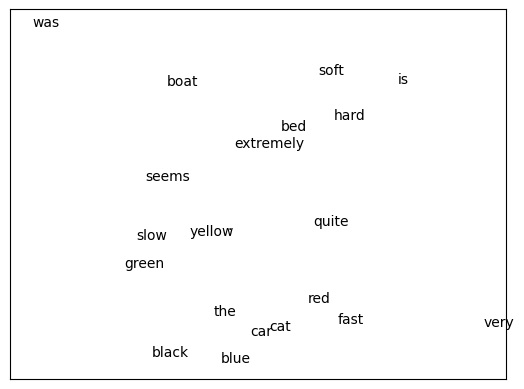

In [ ]:
from typing import List
import math
Vector = List[float]
import tqdm

def add(v: Vector, w: Vector) -> Vector:
    """Adds corresponding elements"""
    assert len(v) == len(w), "vectors must be the same length"

    return [v_i + w_i for v_i, w_i in zip(v, w)]

def subtract(v: Vector, w: Vector) -> Vector:
    """Subtracts corresponding elements"""
    assert len(v) == len(w), "vectors must be the same length"

    return [v_i - w_i for v_i, w_i in zip(v, w)]

def vector_sum(vectors: List[Vector]) -> Vector:
    """Sums all corresponding elements"""
    # Check that vectors is not empty
    assert vectors, "no vectors provided!"

    # Check the vectors are all the same size
    num_elements = len(vectors[0])
    assert all(len(v) == num_elements for v in vectors), "different sizes!"

    # the i-th element of the result is the sum of every vector[i]
    return [sum(vector[i] for vector in vectors)
            for i in range(num_elements)]

def scalar_multiply(c: float, v: Vector) -> Vector:
    """Multiplies every element by c"""
    return [c * v_i for v_i in v]

def vector_mean(vectors: List[Vector]) -> Vector:
    """Computes the element-wise average"""
    n = len(vectors)
    return scalar_multiply(1/n, vector_sum(vectors))

def dot(v: Vector, w: Vector) -> float:
    """Computes v_1 * w_1 + ... + v_n * w_n"""
    assert len(v) == len(w), "vectors must be same length"

    return sum(v_i * w_i for v_i, w_i in zip(v, w))

def sum_of_squares(v: Vector) -> float:
    """Returns v_1 * v_1 + ... + v_n * v_n"""
    return dot(v, v)

def magnitude(v: Vector) -> float:
    """Returns the magnitude (or length) of v"""
    return math.sqrt(sum_of_squares(v))   # math.sqrt is square root function

def squared_distance(v: Vector, w: Vector) -> float:
    """Computes (v_1 - w_1) ** 2 + ... + (v_n - w_n) ** 2"""
    return sum_of_squares(subtract(v, w))

def distance(v: Vector, w: Vector) -> float:
    """Computes the distance between v and w"""
    return math.sqrt(squared_distance(v, w))

def direction(w: Vector) -> Vector:
    mag = magnitude(w)
    return [w_i / mag for w_i in w]

def directional_variance(data: List[Vector], w: Vector) -> float:
    """
    Returns the variance of x in the direction of w
    """
    w_dir = direction(w)
    return sum(dot(v, w_dir) ** 2 for v in data)

def directional_variance_gradient(data: List[Vector], w: Vector) -> Vector:
    """
    The gradient of directional variance with respect to w
    """
    w_dir = direction(w)
    return [sum(2 * dot(v, w_dir) * v[i] for v in data)
            for i in range(len(w))]

def gradient_step(v: Vector, gradient: Vector, step_size: float) -> Vector:
    """Moves `step_size` in the `gradient` direction from `v`"""
    assert len(v) == len(gradient)
    step = scalar_multiply(step_size, gradient)
    return add(v, step)

def first_principal_component(data: List[Vector],
                              n: int = 100,
                              step_size: float = 0.1) -> Vector:
    # Start with a random guess
    guess = [1.0 for _ in data[0]]

    with tqdm.trange(n) as t:
        for _ in t:
            dv = directional_variance(data, guess)
            gradient = directional_variance_gradient(data, guess)
            guess = gradient_step(guess, gradient, step_size)
            t.set_description(f"dv: {dv:.3f}")

    return direction(guess)

def project(v: Vector, w: Vector) -> Vector:
    """return the projection of v onto the direction w"""
    projection_length = dot(v, w)
    return scalar_multiply(projection_length, w)

def subtract(v: Vector, w: Vector) -> Vector:
    """Subtracts corresponding elements"""
    assert len(v) == len(w), "vectors must be the same length"

    return [v_i - w_i for v_i, w_i in zip(v, w)]

def remove_projection_from_vector(v: Vector, w: Vector) -> Vector:
    """projects v onto w and subtracts the result from v"""
    return subtract(v, project(v, w))

def remove_projection(data: List[Vector], w: Vector) -> List[Vector]:
    return [remove_projection_from_vector(v, w) for v in data]

def pca(data: List[Vector], num_components: int) -> List[Vector]:
    components: List[Vector] = []
    for _ in range(num_components):
        component = first_principal_component(data)
        components.append(component)
        data = remove_projection(data, component)

    return components

def transform_vector(v: Vector, components: List[Vector]) -> Vector:
    return [dot(v, w) for w in components]

def transform(data: List[Vector], components: List[Vector]) -> List[Vector]:
    return [transform_vector(v, components) for v in data]

import matplotlib.pyplot as plt

# Extract the first two principal components and transform the word vectors
components = pca(embedding.embeddings, 2)
transformed = transform(embedding.embeddings, components)

# Scatter the points (and make them white so they're "invisible")
fig, ax = plt.subplots()
ax.scatter(*zip(*transformed), marker='.', color='w')

# Add annotations for each word at its transformed location
for word, idx in vocab.w2i.items():
    ax.annotate(word, transformed[idx])

# And hide the axes
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

plt.show()

yang menunjukkan bahwa kata-kata yang mirip memang mengelompok bersama (Gambar 21-3):

Jika Anda tertarik, tidak sulit untuk melatih vektor kata CBOW. Anda harus melakukan sedikit pekerjaan. Pertama, Anda harus memodifikasi layer Embedding sehingga dibutuhkan sebagai input daftar ID dan output daftar vektor embedding. Kemudian Anda harus membuat layer baru (Jumlah?) Yang mengambil daftar vektor dan mengembalikan jumlahnya.

Setiap kata mewakili contoh pelatihan di mana inputnya adalah ID kata untuk kata-kata di sekitarnya, dan targetnya adalah penyandian satu kata dari kata itu sendiri.

Lapisan Penyematan yang dimodifikasi mengubah kata-kata di sekitarnya menjadi daftar vektor, lapisan Sum baru menciutkan daftar vektor menjadi satu vektor, dan kemudian lapisan Linear dapat menghasilkan skor yang dapat dimaksimalkan untuk mendapatkan distribusi yang mewakili "kata-kata yang paling mungkin , mengingat konteks ini.”

Saya menemukan model CBOW lebih sulit untuk dilatih daripada model skip-gram, tetapi saya mendorong Anda untuk mencobanya.

##Jaringan Syaraf Berulang

Vektor kata yang kita kembangkan di bagian sebelumnya sering digunakan sebagai input ke jaringan saraf. Salah satu tantangan untuk melakukannya adalah kalimat memiliki panjang yang bervariasi: Anda dapat menganggap kalimat $3$ kata sebagai tensor $[3, embedding_dim]$ dan kalimat $10$ kata sebagai tensor $[10, embedding_dim]$. Untuk, katakanlah, meneruskannya ke lapisan Linear, kita perlu melakukan sesuatu tentang dimensi panjang variabel pertama itu.

Salah satu opsinya adalah menggunakan lapisan Sum (atau varian yang menggunakan rata-rata); namun, *urutan kata* dalam sebuah kalimat biasanya penting untuk maknanya. Untuk mengambil contoh umum, "anjing menggigit manusia" dan "manusia menggigit anjing" adalah dua cerita yang sangat berbeda!

Cara lain untuk menangani ini adalah menggunakan *jaringan saraf berulang* (RNN), yang memiliki *status tersembunyi* yang dipertahankan di antara input. Dalam kasus yang paling sederhana, setiap masukan digabungkan dengan keadaan tersembunyi saat ini untuk menghasilkan keluaran, yang kemudian digunakan sebagai keadaan tersembunyi yang baru. Ini memungkinkan jaringan semacam itu untuk "mengingat" (dalam arti tertentu) masukan yang telah mereka lihat, dan untuk membangun keluaran akhir yang bergantung pada semua masukan dan urutannya.

Kita akan membuat lapisan RNN yang paling sederhana, yang akan menerima satu input (sesuai dengan, misalnya, satu kata dalam kalimat, atau satu karakter dalam satu kata), dan yang akan mempertahankan status tersembunyinya di antara panggilan.

Ingatlah bahwa layer Linear kita memiliki bobot, w, dan bias, b. Butuh input vektor dan menghasilkan vektor yang berbeda sebagai output menggunakan logika:

In [ ]:
output[o] = dot(w[o], input) + b[o]


Di sini kita ingin memasukkan status tersembunyi kita, jadi kita akan memiliki dua set bobot—satu untuk diterapkan ke input dan satu untuk diterapkan ke status tersembunyi sebelumnya:

In [ ]:
output[o] = dot(w[o], input) + dot(u[o], hidden) + b[o]


Selanjutnya, kita akan menggunakan vektor keluaran sebagai nilai tersembunyi yang baru. Ini bukan perubahan besar, tetapi ini akan memungkinkan jaringan kami melakukan hal-hal luar biasa.

In [ ]:
from typing import Callable
import math

def tensor_apply(f: Callable[[float], float], tensor: Tensor) -> Tensor:
    """Applies f elementwise"""
    if is_1d(tensor):
        return [f(x) for x in tensor]
    else:
        return [tensor_apply(f, tensor_i) for tensor_i in tensor]

def tanh(x: float) -> float:
    # If x is very large or very small, tanh is (essentially) 1 or -1.
    # We check for this because e.g. math.exp(1000) raises an error.
    if x < -100:  return -1
    elif x > 100: return 1

    em2x = math.exp(-2 * x)
    return (1 - em2x) / (1 + em2x)

class SimpleRnn(Layer):
    """Just about the simplest possible recurrent layer."""
    def __init__(self, input_dim: int, hidden_dim: int) -> None:
        self.input_dim = input_dim
        self.hidden_dim = hidden_dim

        self.w = random_tensor(hidden_dim, input_dim, init='xavier')
        self.u = random_tensor(hidden_dim, hidden_dim, init='xavier')
        self.b = random_tensor(hidden_dim)
        self.reset_hidden_state()

    def reset_hidden_state(self) -> None:
        self.hidden = [0 for _ in range(self.hidden_dim)]

Anda dapat melihat bahwa kita memulai status tersembunyi sebagai vektor 0, dan kita menyediakan fungsi yang dapat dipanggil oleh orang yang menggunakan jaringan untuk menyetel ulang status tersembunyi.

Dengan pengaturan ini, fungsi penerusan cukup mudah (setidaknya, jika Anda mengingat dan memahami cara kerja lapisan Linear kita):

In [ ]:
def forward(self, input: Tensor) -> Tensor:
    self.input = input # Save both input and previous
    self.prev_hidden = self.hidden # hidden state to use in backprop.

    a = [(dot(self.w[h], input) + # weights @ input
          dot(self.u[h], self.hidden) + # weights @ hidden
          self.b[h]) # bias
         for h in range(self.hidden_dim)]

    self.hidden = tensor_apply(tanh, a) # Apply tanh activation
    return self.hidden # and return the result.


Lintasan mundur mirip dengan yang ada di lapisan Linear kita, kecuali bahwa ia perlu menghitung kumpulan gradien tambahan untuk bobot u:

In [ ]:
def backward(self, gradient: Tensor):
    # Backpropagate through the tanh
    a_grad = [gradient[h] * (1 - self.hidden[h] ** 2)
              for h in range(self.hidden_dim)]

    # b has the same gradient as a
    self.b_grad = a_grad

    # Each w[h][i] is multiplied by input[i] and added to a[h],
    # so each w_grad[h][i] = a_grad[h] * input[i]
    self.w_grad = [[a_grad[h] * self.input[i]
                    for i in range(self.input_dim)]
                   for h in range(self.hidden_dim)]

    # Each u[h][h2] is multiplied by hidden[h2] and added to a[h],
    # so each u_grad[h][h2] = a_grad[h] * prev_hidden[h2]
    self.u_grad = [[a_grad[h] * self.prev_hidden[h2]
                    for h2 in range(self.hidden_dim)]
                   for h in range(self.hidden_dim)]

    # Each input[i] is multiplied by every w[h][i] and added to a[h],
    # so each input_grad[i] = sum(a_grad[h] * w[h][i] for h in ...)
    return [sum(a_grad[h] * self.w[h][i] for h in range(self.hidden_dim))
            for i in range(self.input_dim)]


Dan akhirnya kita perlu mengganti metode params dan grads:

In [ ]:
def params(self) -> Iterable[Tensor]:
    return [self.w, self.u, self.b]

def grads(self) -> Iterable[Tensor]:
    return [self.w_grad, self.u_grad, self.b_grad]

PERINGATAN

RNN "sederhana" ini sangat sederhana sehingga Anda mungkin tidak boleh menggunakannya dalam praktik.

SimpleRnn kita memiliki beberapa fitur yang tidak diinginkan. Salah satunya adalah seluruh status tersembunyinya digunakan untuk memperbarui input setiap kali Anda memanggilnya. Yang lainnya adalah bahwa seluruh status tersembunyi ditimpa setiap kali Anda memanggilnya. Kedua hal ini membuat sulit untuk dilatih; khususnya, mereka mempersulit model untuk mempelajari dependensi jarak jauh.

Untuk alasan ini, hampir tidak ada yang menggunakan RNN sederhana semacam ini. Sebagai gantinya, mereka menggunakan varian yang lebih rumit seperti LSTM ("memori jangka pendek panjang") atau GRU ("gated recurrent unit"), yang memiliki lebih banyak parameter dan menggunakan "gerbang" berparameter yang memungkinkan hanya sebagian dari keadaan untuk menjadi diperbarui (dan hanya beberapa status yang akan digunakan) di setiap langkah waktu.

Tidak ada yang *sulit* tentang varian ini; namun, mereka melibatkan lebih banyak kode, yang (menurut saya) tidak akan lebih mendidik untuk dibaca. Kode untuk bab ini di GitHub menyertakan implementasi LSTM. Saya mendorong Anda untuk memeriksanya, tetapi agak membosankan sehingga kita tidak akan membahasnya lebih lanjut di sini.

Satu keanehan lain dari implementasi kita adalah hanya membutuhkan satu "langkah" pada satu waktu dan mengharuskan kita untuk mengatur ulang status tersembunyi secara manual. Implementasi RNN yang lebih praktis mungkin menerima urutan input, menyetel status tersembunyinya ke 0 pada awal setiap urutan, dan menghasilkan urutan output. Kita pasti bisa dimodifikasi untuk berperilaku seperti ini; sekali lagi, ini akan membutuhkan lebih banyak kode dan kerumitan untuk mendapatkan sedikit pemahaman.

##Contoh: Menggunakan RNN Tingkat Karakter

VP Branding yang baru direkrut tidak memberikan nama *DataSciencester* sendiri, dan (oleh karena itu) dia curiga bahwa nama yang lebih baik dapat membawa kesuksesan yang lebih besar bagi perusahaan. Dia meminta Anda menggunakan ilmu data untuk menyarankan kandidat pengganti.

Salah satu aplikasi RNN yang "imut" melibatkan penggunaan *karakter* (bukan kata-kata) sebagai inputnya, melatih mereka untuk mempelajari pola bahasa halus di beberapa kumpulan data, dan kemudian menggunakannya untuk menghasilkan contoh fiksi dari kumpulan data tersebut.

Misalnya, Anda dapat melatih RNN tentang nama band alternatif, menggunakan model terlatih untuk menghasilkan nama baru untuk band alternatif palsu, lalu memilih sendiri yang paling lucu dan membagikannya di Twitter. Kegembiraan!

Setelah melihat trik ini berkali-kali untuk tidak menganggapnya pintar, Anda memutuskan untuk mencobanya.

Setelah beberapa penggalian, Anda menemukan bahwa akselerator startup $Y$ Combinator telah menerbitkan daftar $100$ teratas (sebenarnya $101$) startup paling sukses, yang sepertinya merupakan titik awal yang baik. Memeriksa halaman, Anda menemukan bahwa semua nama perusahaan ada di dalam $<b class="h4">$ tag, yang berarti mudah untuk menggunakan keterampilan pengikisan web Anda untuk mengambilnya:

In [ ]:
from bs4 import BeautifulSoup
import requests

url = "https://www.ycombinator.com/topcompanies/"
soup = BeautifulSoup(requests.get(url).text, 'html5lib')

# We get the companies twice, so use a set comprehension to deduplicate.
companies = list({b.text
                  for b in soup("b")
                  if "h4" in b.get("class", ())})
assert len(companies) == 101

Seperti biasa, halaman dapat berubah (atau hilang), dalam hal ini kode ini tidak akan berfungsi. Jika demikian, Anda dapat menggunakan keterampilan ilmu data yang baru Anda pelajari untuk memperbaikinya atau dapatkan daftarnya dari situs GitHub buku.

Jadi apa rencana kita? Kita akan melatih model untuk memprediksi karakter berikutnya dari sebuah nama, mengingat karakter saat ini *dan* status tersembunyi yang mewakili semua karakter yang telah kita lihat sejauh ini.

Seperti biasa, kita akan benar-benar memprediksi distribusi probabilitas pada karakter dan melatih model kita untuk meminimalkan kerugian SoftmaxCrossEntropy.

Setelah model kita dilatih, kita dapat menggunakannya untuk menghasilkan beberapa probabilitas, mengambil sampel karakter secara acak berdasarkan probabilitas tersebut, lalu memberi makan karakter tersebut sebagai input berikutnya. Ini akan memungkinkan kita untuk menghasilkan nama perusahaan menggunakan bobot yang dipelajari.

Untuk memulainya, kita harus membuat Vocabulary dari karakter dalam nama:

In [ ]:
vocab = Vocabulary([c for company in companies for c in company])


Selain itu, kita akan menggunakan token khusus untuk menandai awal dan akhir nama perusahaan. Hal ini memungkinkan model untuk mempelajari karakter mana yang harus diawali dengan nama perusahaan dan juga untuk mempelajari kapan nama perusahaan *diakhiri*.

Kita hanya akan menggunakan karakter regex untuk memulai dan mengakhiri, yang (untungnya) tidak muncul di daftar perusahaan kita:

In [ ]:
START = "^"
STOP = "$"

# We need to add them to the vocabulary too.
vocab.add(START)
vocab.add(STOP

Untuk model kita, kita akan melakukan one-hot-encode setiap karakter, menyebarkannya melalui dua SimpleRnns, dan kemudian menggunakan layer Linear untuk menghasilkan skor untuk setiap kemungkinan karakter berikutnya:

In [ ]:
HIDDEN_DIM = 32 # You should experiment with different sizes!

rnn1 = SimpleRnn(input_dim=vocab.size, hidden_dim=HIDDEN_DIM)
rnn2 = SimpleRnn(input_dim=HIDDEN_DIM, hidden_dim=HIDDEN_DIM)
linear = Linear(input_dim=HIDDEN_DIM, output_dim=vocab.size)

model = Sequential([
    rnn1,
    rnn2,
    linear
])


Bayangkan sejenak kita telah melatih model ini. Mari tulis fungsi yang menggunakannya untuk menghasilkan nama perusahaan baru, dengan menggunakan fungsi sample_from dari “Pemodelan Topik”:

In [ ]:
START = "^"

def softmax(tensor: Tensor) -> Tensor:
    """Softmax along the last dimension"""
    if is_1d(tensor):
        # Subtract largest value for numerical stabilitity.
        largest = max(tensor)
        exps = [math.exp(x - largest) for x in tensor]

        sum_of_exps = sum(exps)                 # This is the total "weight".
        return [exp_i / sum_of_exps             # Probability is the fraction
                for exp_i in exps]              # of the total weight.
    else:
        return [softmax(tensor_i) for tensor_i in tensor]

def generate(seed: str = START, max_len: int = 50) -> str:
    rnn1.reset_hidden_state() # Reset both hidden states
    rnn2.reset_hidden_state()
    output = [seed] # Start the output with the specified seed

    # Keep going until we produce the STOP character or reach the max length
    while output[-1] != STOP and len(output) < max_len:
        # Use the last character as the input
        input = vocab.one_hot_encode(output[-1])

        # Generate scores using the model
        predicted = model.forward(input)

        # Convert them to probabilities and draw a random char_id
        probabilities = softmax(predicted)
        next_char_id = sample_from(probabilities)

        # Add the corresponding char to our output
        output.append(vocab.get_word(next_char_id))

    # Get rid of START and END characters and return the word
    return ''.join(output[1:-1])

Akhirnya, kita siap untuk melatih RNN level karakter kita. Ini akan memakan waktu lama!

In [ ]:
from bs4 import BeautifulSoup
import requests

url = "https://www.ycombinator.com/topcompanies/"
soup = BeautifulSoup(requests.get(url).text, 'html5lib')

# We get the companies twice, so use a set comprehension to deduplicate.
companies = list({b.text
                  for b in soup("b")
                  if "h4" in b.get("class", ())})
loss = SoftmaxCrossEntropy()
optimizer = Momentum(learning_rate=0.01, momentum=0.9)

for epoch in range(300):
    random.shuffle(companies) # Train in a different order each epoch.
    epoch_loss = 0 # Track the loss.
    for company in tqdm.tqdm(companies):
        rnn1.reset_hidden_state() # Reset both hidden states.
        rnn2.reset_hidden_state()
        company = START + company + STOP # Add START and STOP characters.

        # The rest is just our usual training loop, except that the inputs
        # and target are the one-hot-encoded previous and next characters.
        for prev, next in zip(company, company[1:]):
            input = vocab.one_hot_encode(prev)
            target = vocab.one_hot_encode(next)
            predicted = model.forward(input)
            epoch_loss += loss.loss(predicted, target)
            gradient = loss.gradient(predicted, target)
            model.backward(gradient)
            optimizer.step(model)
        # Each epoch, print the loss and also generate a name.
        print(epoch, epoch_loss, generate())

        # Turn down the learning rate for the last 100 epochs.
        # There's no principled reason for this, but it seems to work.
        if epoch == 200:
            optimizer.lr *= 0.1

0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, 

Setelah pelatihan, model menghasilkan beberapa nama sebenarnya dari daftar (yang tidak mengherankan, karena model memiliki kapasitas yang lumayan dan tidak banyak data pelatihan), serta nama yang hanya sedikit berbeda dari nama pelatihan ( Scripe, Loinbare, Pozium), nama-nama yang tampak benar-benar kreatif (Benuus, Cletpo, Equite, Vivest), dan nama-nama yang sampah tetapi masih seperti kata-kata (SFitreasy, Sint ocanelp, GliyOx, Doorboronelhav).

Sayangnya, seperti kebanyakan output karakter-level-RNN, ini hanya sedikit pintar, dan VP Branding akhirnya tidak dapat menggunakannya.

Jika saya menaikkan dimensi tersembunyi menjadi $64$, saya mendapatkan lebih banyak nama kata demi kata dari daftar; jika saya menjatuhkannya ke $8$, saya mendapatkan sebagian besar sampah. Kosakata dan bobot akhir untuk semua ukuran model ini tersedia di situs GitHub buku, dan Anda dapat menggunakan load_weights dan load_vocab untuk menggunakannya sendiri.

Seperti yang disebutkan sebelumnya, kode GitHub untuk bab ini juga berisi implementasi untuk LSTM, yang bebas Anda tukarkan sebagai pengganti SimpleRnns dalam model nama perusahaan kita.

##Untuk Eksplorasi Lebih Lanjut



*   NLTK adalah pustaka alat NLP yang populer untuk Python. Ini memiliki seluruh bukunya sendiri, yang tersedia untuk dibaca online.
*   gensim adalah pustaka Python untuk pemodelan topik, yang merupakan taruhan yang lebih baik daripada model awal kita.
*   spaCy adalah perpustakaan untuk "Pemrosesan Bahasa Alami Kekuatan Industri dengan Python" dan juga cukup populer.
*   Andrej Karpathy memiliki posting blog terkenal, "Efektivitas yang Tidak Masuk Akal dari Jaringan Syaraf Berulang", yang sangat layak untuk dibaca.
*   Pekerjaan harian saya melibatkan membangun AllenNLP, perpustakaan Python untuk melakukan penelitian NLP. (Setidaknya, pada saat buku ini dicetak, memang demikian.) Perpustakaannya cukup di luar cakupan buku ini, tetapi Anda mungkin masih menganggapnya menarik, dan memiliki demo interaktif yang keren dari banyak negara bagian- model NLP tercanggih.








# Bab 21 Analis Jaringan
Ananda Ravi Shouma Setyawan \\
Novia Rahmadini

Banyak masalah data yang menarik dapat dipikirkan dengan baik dalam hal jaringan, yang terdiri dari node dari beberapa jenis dan tepi yang bergabung dengan mereka.
Misalnya, teman-teman Facebook Anda membentuk simpul-simpul jaringan yang ujung-ujungnya adalah persahabatan hubungan. Contoh yang kurang jelas adalah World Wide Web itu sendiri, dengan setiap halaman web sebuah simpul dan masing-masing hyperlink dari satu halaman ke halaman lain sebuah edge.
Persahabatan Facebook itu saling menguntungkan — jika saya Facebook berteman dengan Anda, maka Anda tentu berteman dengan saya. Dalam hal ini, kami mengatakan bahwa ujung-ujungnya tidak terarah. Hyperlink bukan—situs web saya tertaut ke whitehouse.gov, tetapi (untuk alasan yang tidak dapat saya jelaskan) whitehouse.gov menolak menautkan ke situs web saya. Kami menyebut jenis tepi ini diarahkan. Kami akan melihat kedua jenis jaringan.


## Sentralitas Antara
Di Bab 1, kami menghitung konektor kunci di jaringan DataSciencester dengan menghitung jumlahnya teman yang dimiliki setiap pengguna. Sekarang kami memiliki cukup mesin untuk melihat pendekatan lain. Kami akan menggunakan jaringan yang sama, tetapi sekarang kami akan menggunakan NamedTuples untuk datanya.
Ingat bahwa jaringan (Gambar 22-1) terdiri dari pengguna:


In [ ]:
from typing import NamedTuple

class User(NamedTuple):
    id: int
    name: str

users = [User(0, "Hero"), User(1, "Dunn"), User(2, "Sue"), User(3, "Chi"),
          User(4, "Thor"), User(5, "Clive"), User(6, "Hicks"),
          User(7, "Devin"), User(8, "Kate"), User(9, "Klein")]

dan persahabatan:

In [ ]:
friend_pairs = [(0, 1), (0, 2), (1, 2), (1, 3), (2, 3), (3, 4),
                (4, 5), (5, 6), (5, 7), (6, 8), (7, 8), (8, 9)]

Persahabatan akan lebih mudah untuk dikerjakan sebagai dict:

In [ ]:
from typing import Dict, List

# type alias for keeping track of Friendships
Friendships = Dict[int, List[int]]

friendships: Friendships = {user.id: [] for user in users}

for i, j in friend_pairs:
    friendships[i].append(j)
    friendships[j].append(i)

assert friendships[4] == [3, 5]
assert friendships[8] == [6, 7, 9]

Ketika kami tinggalkan, kami tidak puas dengan gagasan kami tentang sentralitas derajat, yang tidak terlalu setuju
dengan intuisi kami tentang siapa penghubung utama jaringan itu.
Metrik alternatif adalah sentralitas keantaraan, yang mengidentifikasi orang-orang yang sering berada di
jalur terpendek antara pasangan orang lain. Secara khusus, sentralitas keantaraan dari simpul i adalah dihitung dengan menjumlahkan, untuk setiap pasangan node j dan k lainnya, proporsi jalur terpendek di antaranya simpul j dan simpul k yang melewati i.
Artinya, untuk mengetahui sentralitas keantaraan Thor, kita perlu menghitung semua jalur terpendek antara semua pasangan orang yang bukan Thor. Dan kemudian kita perlu menghitung berapa banyak dari itu
jalur terpendek melewati Thor. Misalnya, satu-satunya jalur terpendek antara Chi (id 3) dan Clive (id 5) melewati Thor, sementara tidak satu pun dari dua jalur terpendek antara Pahlawan (id 0) dan Chi (id
3) tidak.
Jadi, sebagai langkah pertama, kita perlu memikirkan jalur terpendek antara semua pasangan orang. Ada beberapa algoritme yang cukup canggih untuk melakukannya secara efisien, tetapi (seperti yang hampir selalu terjadi) kami akan menggunakan algoritma yang kurang efisien dan mudah dipahami. Algoritma ini (penerapan pencarian luas-pertama) adalah salah satu yang lebih rumit di buku, jadi mari kita bahas dengan hati-hati:

1. Tujuan kami adalah fungsi yang mengambil from_user dan menemukan semua jalur terpendek ke setiap pengguna lainnya.
2. Kami akan merepresentasikan jalur sebagai daftar ID pengguna. Karena setiap jalur dimulai dari from_user, kami
tidak akan memasukkan ID-nya dalam daftar. Ini berarti bahwa panjang daftar mewakili jalan
akan menjadi panjang jalan itu sendiri.
3. Kami akan mempertahankan kamus yang disebut shortest_paths_to di mana kuncinya adalah ID pengguna dan
nilai adalah daftar jalur yang berakhir pada pengguna dengan ID yang ditentukan. Jika ada yang terpendek unik
jalur, daftar hanya akan berisi satu jalur itu. Jika ada beberapa jalur terpendek, daftarnya akan
berisi semuanya.
4. Kami juga akan mempertahankan antrean yang disebut frontier yang berisi pengguna yang ingin kami jelajahi
urutan yang ingin kita jelajahi. Kami akan menyimpannya sebagai pasangan (prev_user, user) sehingga
kita tahu bagaimana kita sampai ke masing-masing. Kami menginisialisasi antrian dengan semua tetangga
from_user. (Kami belum membahas tentang antrean, yang merupakan struktur data yang dioptimalkan untuk “tambahkan
sampai akhir” dan operasi “hapus dari depan”. Dalam Python, mereka diimplementasikan sebagai
collections.deque, yang sebenarnya merupakan antrian ujung ganda.)
5. Saat kami menjelajahi grafik, setiap kali kami menemukan tetangga baru yang belum kami ketahui
jalur terpendek ke, kami menambahkannya ke akhir antrean untuk dijelajahi nanti, dengan pengguna saat ini
sebagai prev_user.
6. Saat kami mengeluarkan pengguna dari antrean, dan kami belum pernah bertemu pengguna itu sebelumnya, kami melakukannya
pasti menemukan satu atau lebih jalur terpendek ke dia—masing-masing jalur terpendek ke prev_user
dengan satu langkah ekstra ditambahkan.
7. Saat kami mengeluarkan pengguna dari antrean dan kami telah bertemu dengan pengguna itu sebelumnya, maka baik
kami telah menemukan jalur terpendek lainnya (dalam hal ini kami harus menambahkannya) atau kami telah menemukan jalur yang lebih panjang
path (dalam hal ini kita tidak seharusnya).
8. Saat tidak ada lagi pengguna yang tersisa di antrean, kami telah menjelajahi seluruh grafik (atau, paling tidak,
bagiannya yang dapat dijangkau dari pengguna awal) dan selesai.

Kita bisa menggabungkan semua ini ke dalam fungsi (besar):

In [ ]:
from collections import deque

Path = List[int]

def shortest_paths_from(from_user_id: int,
                        friendships: Friendships) -> Dict[int, List[Path]]:
    # A dictionary from user_id to *all* shortest paths to that user.
    shortest_paths_to: Dict[int, List[Path]] = {from_user_id: [[]]}
    # A queue of (previous user, next user) that we need to check.
    # Starts out with all pairs (from_user, friend_of_from_user).
    frontier = deque((from_user_id, friend_id)
                    for friend_id in friendships[from_user_id])

# Keep going until we empty the queue.
while frontier:
    # Remove the pair that's next in the queue.
    prev_user_id, user_id = frontier.popleft()

    # Because of the way we're adding to the queue,
    # necessarily we already know some shortest paths to prev_user.
    paths_to_prev_user = shortest_paths_to[prev_user_id]
    new_paths_to_user = [path + [user_id] for path in paths_to_prev_user]

    # It's possible we already know a shortest path to user_id.
    old_paths_to_user = shortest_paths_to.get(user_id, [])

    # What's the shortest path to here that we've seen so far?
    if old_paths_to_user:
      min_path_length = len(old_paths_to_user[0])
    else:
      min_path_length = float('inf')

    # Only keep paths that aren't too long and are actually new.
    new_paths_to_user = [path
                        for path in new_paths_to_user
                        if len(path) <= min_path_length
                        and path not in old_paths_to_user]

    shortest_paths_to[user_id] = old_paths_to_user + new_paths_to_user

    # Add never-seen neighbors to the frontier.
    frontier.extend((user_id, friend_id)
                    for friend_id in friendships[user_id]
                    if friend_id not in shortest_paths_to)

    return shortest_paths_to

Sekarang mari kita hitung semua jalur terpendek:

In [ ]:
# For each from_user, for each to_user, a list of shortest paths.
shortest_paths = {user.id: shortest_paths_from(user.id, friendships)
                  for user in users}

Dan kami akhirnya siap menghitung sentralitas keantaraan. Untuk setiap pasang node $i$ dan $j$, kita mengetahuinya $n$ lintasan terpendek dari $i$ ke $j$. Kemudian, untuk masing-masing jalur tersebut, kita cukup menambahkan $1/n$ ke sentralitas masing-masing simpul di jalan itu:

In [ ]:
betweenness_centrality = {user.id: 0.0 for user in users}

for source in users:
    for target_id, paths in shortest_paths[source.id].items():
        if source.id < target_id: # don't double count
            num_paths = len(paths) # how many shortest paths?
            contrib = 1 / num_paths # contribution to centrality
            for path in paths:

              for between_id in path:
                  if between_id not in [source.id, target_id]:
                      betweenness_centrality[between_id] += contrib

Seperti yang ditunjukkan pada Gambar 22-2, pengguna $0$ dan $9$ memiliki sentralitas 0 (karena keduanya tidak berada pada jalur terpendek antara pengguna lain), sedangkan 3, 4, dan 5 semuanya memiliki sentralitas tinggi (karena ketiganya terletak pada banyak jalur terpendek).

Ukuran lain yang bisa kita lihat adalah sentralitas kedekatan. Pertama, untuk setiap pengguna kami menghitung farnessnya, yang merupakan jumlah panjang jalur terpendeknya ke setiap pengguna lainnya. Karena kita sudah menghitung jalur terpendek di antara setiap pasangan node, mudah untuk menambahkan panjangnya. (Jika ada beberapa jalur terpendek, semuanya memiliki panjang yang sama, jadi kita bisa melihat yang pertama saja.)

In [ ]:
def farness(user_id: int) -> float:
    """the sum of the lengths of the shortest paths to each other user"""
    return sum(len(paths[0])
              for paths in shortest_paths[user_id].values())

setelah itu sangat sedikit pekerjaan untuk menghitung sentralitas kedekatan (Gambar 22-3):

In [ ]:
closeness_centrality = {user.id: 1 / farness(user.id) for user in users}

Ada jauh lebih sedikit variasi di sini — bahkan node paling sentral masih cukup jauh dari node keluar di pinggiran. Seperti yang kita lihat, menghitung jalur terpendek agak menyusahkan. Untuk alasan ini, keantaraan dan kedekatan sentralitas tidak sering digunakan pada jaringan besar. Kurang intuitif (tetapi umumnya lebih mudah dihitung)
sentralitas vektor eigen lebih sering digunakan.

## Eigenvector Centrality
Untuk berbicara tentang sentralitas vektor eigen, kita harus berbicara tentang vektor eigen, dan untuk membicarakan tentang vektor eigen, kita harus berbicara tentang perkalian matriks.

### Perkalian Matriks
Jika A adalah $n \times m$ matriks dan B adalah $m \times k$ matriks (perhatikan bahwa dimensi kedua A sama dengan dimensi pertama dimensi dari B), maka perkalian mereka AB adalah $n \times k$ matriks yang entri ke-$(i,j)$ nya adalah:

yang merupakan produk titik dari baris ke-i A (dianggap sebagai vektor) dengan kolom ke-j dari B (juga dianggap sebagai vektor).
Kita dapat mengimplementasikannya menggunakan fungsi make_matrix dari Bab 4

In [ ]:
from scratch.linear_algebra import Matrix, make_matrix, shape

def matrix_times_matrix(m1: Matrix, m2: Matrix) -> Matrix:
    nr1, nc1 = shape(m1)
    nr2, nc2 = shape(m2)
    assert nc1 == nr2, "must have (# of columns in m1) == (# of rows in m2)"

def entry_fn(i: int, j: int) -> float:
    """dot product of i-th row of m1 with j-th column of m2"""
    return sum(m1[i][k] * m2[k][j] for k in range(nc1))

return make_matrix(nr1, nc2, entry_fn)

Jika kita menganggap vektor berdimensi m sebagai matriks $(m, 1)$, kita dapat mengalikannya dengan matriks $(n, m)$ untuk mendapatkan matriks $(n, 1)$, yang kemudian dapat kita anggap sebagai vektor n-dimensi.
Ini berarti cara lain untuk berpikir tentang matriks $(n, m)$ adalah sebagai pemetaan linier yang mengubah vektor mdimensi menjadi vektor $n$-dimensi:

In [ ]:
from scratch.linear_algebra import Vector, dot

def matrix_times_vector(m: Matrix, v: Vector) -> Vector:
    nr, nc = shape(m)
    n = len(v)
    assert nc == n, "must have (# of cols in m) == (# of elements in v)"

    return [dot(row, v) for row in m] # output has length nr

Ketika A adalah matriks bujur sangkar, operasi ini memetakan vektor $n$-dimensi ke $n$-dimensi lainnya vektor. Ada kemungkinan bahwa, untuk beberapa matriks $A$ dan vektor $v$, ketika $A$ beroperasi pada v kita mendapatkan kembali sebuah skalar kelipatan dari $v$—yaitu, hasilnya adalah vektor yang menunjuk ke arah yang sama dengan $v$. Saat ini
terjadi (dan ketika, sebagai tambahan, $v$ bukan vektor dari semua nol), kita sebut $v$ vektor eigen dari $A$. Dan kita sebut pengganda sebagai nilai eigen.

Salah satu cara yang mungkin untuk menemukan vektor eigen dari $A$ adalah dengan mengambil vektor awal $v$, menerapkan
matrix_times_vector, rescaling hasilnya menjadi berkekuatan $1$, dan ulangi hingga proses konvergen:

In [ ]:
from typing import Tuple
import random
from scratch.linear_algebra import magnitude, distance

def find_eigenvector(m: Matrix,
                      tolerance: float = 0.00001) -> Tuple[Vector, float]:
    guess = [random.random() for _ in m]

    while True:
        result = matrix_times_vector(m, guess) # transform guess
        norm = magnitude(result) # compute norm
        next_guess = [x / norm for x in result] # rescale

        if distance(guess, next_guess) < tolerance:
            # convergence so return (eigenvector, eigenvalue)
            return next_guess, norm

        guess = next_guess

Secara konstruksi, tebakan yang dikembalikan adalah vektor sehingga, ketika Anda menerapkan matrix_times_vector ke itu dan skala ulang untuk memiliki panjang 1, Anda mendapatkan kembali vektor yang sangat dekat dengan dirinya sendiri — yang artinya adalah sebuah vektor eigen.
Tidak semua matriks bilangan real memiliki vektor eigen dan nilai eigen. Misalnya, matriks:

In [ ]:
rotate = [[ 0, 1],
          [-1, 0]]

memutar vektor $90$ derajat searah jarum jam, yang berarti bahwa satu-satunya vektor yang dipetakan ke kelipatan skalar itu sendiri adalah vektor nol. Jika Anda mencoba find_eigenvector(rotate) itu akan berjalan selamanya. Bahkan matriks yang memiliki vektor eigen terkadang terjebak dalam siklus. Pertimbangkan matriks:

In [ ]:
flip = [[0, 1],
        [1, 0]]

Matriks ini memetakan sembarang vektor $[x, y]$ ke $[y, x]$. Ini berarti, misalnya, $[1, 1]$ adalah an vektor eigen dengan nilai eigen 1. Namun, jika Anda memulai dengan vektor acak dengan koordinat tidak sama,find_eigenvector hanya akan berulang kali menukar koordinat selamanya. (Perpustakaan bukan dari awal seperti NumPy gunakan metode berbeda yang akan berfungsi dalam kasus ini.) Meskipun demikian, kapan
find_eigenvector mengembalikan hasil, hasil itu memang vektor eigen

### Sentralitas
Bagaimana ini membantu kami memahami jaringan DataSciencester? Untuk memulai, kita harus mewakili koneksi di jaringan kami sebagai adjacency_matrix, yang $(i,j)$ entrinya adalah $1$ (jika pengguna i dan
pengguna j adalah teman) atau $0$ (jika bukan):

In [ ]:
def entry_fn(i: int, j: int):
    return 1 if (i, j) in friend_pairs or (j, i) in friend_pairs else 0

n = len(users)
adjacency_matrix = make_matrix(n, n, entry_fn)

## Grafik Terarah dan PageRank

DataSciencester tidak mendapatkan banyak daya tarik, jadi VP of Revenue mempertimbangkan untuk beralih dari a model pertemanan menjadi model endorsement. Ternyata tidak ada yang terlalu peduli dengan data yang mana ilmuwan berteman satu sama lain, tetapi perekrut teknologi sangat peduli dengan data scientist dihormati oleh ilmuwan data lainnya.
Dalam model baru ini, kami akan melacak dukungan (sumber, target) yang tidak lagi mewakili a hubungan timbal balik, tetapi sumber itu mendukung target sebagai ilmuwan data yang hebat
(Gambar 22-5).

Kita harus memperhitungkan asimetri ini:

In [ ]:
endorsements = [(0, 1), (1, 0), (0, 2), (2, 0), (1, 2),
                (2, 1), (1, 3), (2, 3), (3, 4), (5, 4),
                (5, 6), (7, 5), (6, 8), (8, 7), (8, 9)]

setelah itu kita dapat dengan mudah menemukan ilmuwan data yang paling didukung dan menjual informasi tersebut kepada
perekrut:

In [ ]:
from collections import Counter

endorsement_counts = Counter(target for source, target in endorsements)

Namun, "jumlah dukungan" adalah metrik yang mudah untuk dimainkan. Yang perlu Anda lakukan hanyalah membuat palsu akun dan minta mereka mendukung Anda. Atau atur dengan teman Anda untuk saling mendukung. (Sebagai pengguna 0, 1, dan 2 sepertinya sudah selesai.)
Metrik yang lebih baik akan mempertimbangkan siapa yang mendukung Anda. Endorsement dari orang yang punya banyak dukungan entah bagaimana harus dihitung lebih dari dukungan dari orang-orang dengan sedikit dukungan.
Ini adalah inti dari algoritma PageRank, yang digunakan oleh Google untuk menentukan peringkat situs web berdasarkan yang lain situs web menautkannya, situs web lain mana yang menautkannya, dan seterusnya. (Jika ini mengingatkan Anda pada ide di balik sentralitas vektor eigen, itu seharusnya.) Versi yang disederhanakan terlihat seperti ini:
1. Ada total 1,0 (atau 100%) PageRank di jaringan.
2. Awalnya PageRank ini didistribusikan secara merata di antara node.
3. Pada setiap langkah, sebagian besar PageRank setiap node didistribusikan secara merata di antara mereka
tautan keluar.
4. Pada setiap langkah, sisa PageRank setiap node didistribusikan secara merata di antara semua node

In [ ]:
import tqdm

def page_rank(users: List[User],
              endorsements: List[Tuple[int, int]],
              damping: float = 0.85,
              num_iters: int = 100) -> Dict[int, float]:
    # Compute how many people each person endorses
    outgoing_counts = Counter(target for source, target in endorsements)

    # Initially distribute PageRank evenly
    num_users = len(users)
    pr = {user.id : 1 / num_users for user in users}

    # Small fraction of PageRank that each node gets each iteration
    base_pr = (1 - damping) / num_users

    for iter in tqdm.trange(num_iters):
        next_pr = {user.id : base_pr for user in users} # start with base_pr

        for source, target in endorsements:
            # Add damped fraction of source pr to target
            next_pr[target] += damping * pr[source] / outgoing_counts[source]

        pr = next_pr

    return pr

Jika kami menghitung peringkat halaman:

In [ ]:
pr = page_rank(users, endorsements)

# Thor (user_id 4) has higher page rank than anyone else
assert pr[4] > max(page_rank
                  for user_id, page_rank in pr.items()
                  if user_id != 4)

PageRank (Gambar 22-6) mengidentifikasi pengguna 4 (Thor) sebagai ilmuwan data dengan peringkat tertinggi

Meskipun Thor memiliki lebih sedikit dukungan (dua) daripada pengguna 0, 1, dan 2, dukungannya tetap ada peringkat mereka dari dukungan mereka. Selain itu, kedua pendukungnya hanya mendukung dia, yang mana
berarti dia tidak harus membagi peringkat mereka dengan orang lain.

# Bab 22 Sistem Rekomendasi

Dimas Widhiatmoko \\
Indraswari Prasetyaningtyas

Masalah data umum lainnya adalah menghasilkan semacam rekomendasi. Netflix merekomendasikan film yang mungkin ingin Anda tonton. Amazon merekomendasikan produk yang mungkin ingin Anda beli. Twitter merekomendasikan pengguna yang mungkin ingin Anda ikuti. Dalam bab ini, kita akan melihat beberapa cara untuk menggunakan data untuk membuat rekomendasi.



Secara khusus, kita akan melihat dataset users_interests yang telah kita gunakan sebelumnya:

In [ ]:
users_interests = [
["Hadoop", "Big Data", "HBase", "Java", "Spark", "Storm", "Cassandra"], ["NoSQL", "MongoDB", "Cassandra", "HBase", "Postgres"],
["Python", "scikit-learn", "scipy", "numpy", "statsmodels", "pandas"],
["R", "Python", "statistics", "regression", "probability"],
["machine learning", "regression", "decision trees", "libsvm"],
["Python", "R", "Java", "C++", "Haskell", "programming languages"], ["statistics", "probability", "mathematics", "theory"],
["machine learning", "scikit-learn", "Mahout", "neural networks"],
["neural networks", "deep learning", "Big Data", "artificial intelligence"], ["Hadoop", "Java", "MapReduce", "Big Data"],
["statistics", "R", "statsmodels"],
["C++", "deep learning", "artificial intelligence", "probability"], ["pandas", "R", "Python"],
["databases", "HBase", "Postgres", "MySQL", "MongoDB"],
["libsvm", "regression", "support vector machines"]
]


Dan kami akan memikirkan masalah merekomendasikan minat baru kepada pengguna berdasarkan minatnya yang ditentukan saat ini.

## Kurasi Manual

Sebelum internet, ketika Anda membutuhkan rekomendasi buku, Anda akan pergi ke perpustakaan, di mana pustakawan tersedia untuk menyarankan buku-buku yang relevan dengan minat Anda atau mirip dengan buku yang Anda sukai.

Mengingat jumlah pengguna dan minat DataSciencester yang terbatas, akan mudah bagi Anda untuk menghabiskan sore hari secara manual merekomendasikan minat untuk setiap pengguna. Tetapi metode ini tidak berskala sangat baik, dan itu dibatasi oleh pengetahuan dan imajinasi pribadi Anda. (Bukan berarti saya menyarankan bahwa pengetahuan dan imajinasi pribadi Anda terbatas.) Jadi mari kita pikirkan apa yang bisa kita lakukan dengan data.

## Merekomendasikan Apa yang Populer

One easy approach is to simply recommend what’s popular:

In [ ]:
from collections import Counter

popular_interests = Counter(interest
                            for user_interests in users_interests
                            for interest in user_interests)

yang terlihat seperti:

In [ ]:
[('Python', 4),
 ('R', 4),
 ('Java', 3),
 ('regression', 3),
 ('statistics', 3),
 ('probability', 3),
 # ...
]

Setelah menghitung ini, kami hanya dapat menyarankan kepada pengguna minat paling populer yang belum dia minati:


In [ ]:
from typing import List, Tuple

def most_popular_new_interests(
     user_interests: List[str],
     max_results: int = 5) -> List[Tuple[str, int]]:
   suggestions = [(interest, frequency)
                  for interest, frequency in popular_interests.most_common()
                  if interest not in user_interests]
   return suggestions[:max_results]


Jadi, jika Anda pengguna 1, dengan minat:

In [ ]:
["NoSQL", "MongoDB", "Cassandra", "HBase", "Postgres"]

Maka kami akan merekomendasikan Anda:


In [ ]:
[('Python', 4), ('R', 4), ('Java', 3), ('regression', 3), ('statistics', 3)]

Jika Anda adalah pengguna 3, yang sudah tertarik dengan banyak hal itu, Anda malah akan mendapatkan:


In [ ]:
[('Java', 3), ('HBase', 3), ('Big Data', 3),
 ('neural networks', 2), ('Hadoop', 2)]


Tentu saja, "banyak orang tertarik dengan Python, jadi mungkin Anda juga harus tertarik" bukanlah promosi penjualan yang paling menarik. Jika seseorang baru mengenal situs kami dan kami tidak tahu apa-apa tentang mereka,
Itu mungkin yang terbaik yang bisa kita lakukan. Mari kita lihat bagaimana kita bisa berbuat lebih baik dengan mendasarkan rekomendasi setiap pengguna pada minat yang ada.

## Pemfilteran kolaboratif berbasis pengguna

Salah satu cara untuk mempertimbangkan minat pengguna adalah dengan mencari pengguna yang entah bagaimana mirip dengannya, dan kemudian menyarankan hal-hal yang diminati pengguna tersebut.

Untuk melakukan itu, kita memerlukan cara untuk mengukur seberapa mirip dua pengguna. Di sini kita akan menggunakan kesamaan kosinus, yang kita gunakan dalam Bab 21 untuk mengukur seberapa mirip dua vektor kata.

Kami akan menerapkan ini ke vektor 0s dan 1s, masing-masing vektor v mewakili minat satu pengguna. v[i] akan menjadi 1 jika pengguna menentukan bunga ITH, dan 0 sebaliknya. Dengan demikian, "pengguna serupa" akan berarti "pengguna yang vektor minatnya hampir mengarah ke arah yang sama." Pengguna dengan minat yang sama akan memiliki kesamaan 1. Pengguna tanpa minat yang sama akan memiliki kesamaan 0. Jika tidak, kesamaan akan jatuh di antaranya, dengan angka yang lebih dekat ke 1 menunjukkan "sangat mirip" dan angka yang lebih dekat ke 0 menunjukkan "tidak terlalu mirip."

Tempat yang baik untuk memulai adalah mengumpulkan minat yang diketahui dan (secara implisit) menetapkan indeks kepada mereka. Kita dapat melakukan ini dengan menggunakan pemahaman yang ditetapkan untuk menemukan minat unik, dan kemudian menyortirnya ke dalam daftar. Minat pertama dalam daftar yang dihasilkan adalah minat 0, dan seterusnya:

In [ ]:
unique_interests = sorted({interest
                          for user_interests in users_interests
                          for interest in user_interests})

Ini memberi kita daftar yang dimulai:


In [ ]:
assert unique_interests[:6] == [
     'Big Data',
     'C++',
     'Cassandra',
     'HBase',
     'Hadoop',
     'Haskell',
     # ...
]


Selanjutnya kita ingin menghasilkan vektor "minat" 0s dan 1s untuk setiap pengguna. Kita hanya perlu mengulangi daftar unique_interests, mengganti 1 jika pengguna memiliki minat masing-masing, dan 0 jika tidak:


In [ ]:
def make_user_interest_vector(user_interests: List[str]) -> List[int]:
   """
   Given a list of interests, produce a vector whose ith element is 1
   if unique_interests[i] is in the list, 0 otherwise
   """
   return [1 if interest in user_interests else 0
           for interest in unique_interests]

Dan sekarang kita dapat membuat daftar vektor minat pengguna:

In [ ]:
user_interest_vectors = [make_user_interest_vector(user_interests)
                         for user_interests in users_interests]


Now user_interest_vectors[i][j] equals 1 if user i specified interest j, and 0 otherwise.

Karena kita memiliki dataset kecil, tidak masalah untuk menghitung kesamaan berpasangan antara semua
Pengguna kami:


In [ ]:
from scratch.nlp import cosine_similarity

user_similarities = [[cosine_similarity(interest_vector_i, interest_vector_j)
                      for interest_vector_j in user_interest_vectors]
                      for interest_vector_i in user_interest_vectors]

after which user_similarities[i][j] gives us the similarity between users i and j:


In [ ]:
# Users 0 and 9 share interests in Hadoop, Java, and Big Data
assert 0.56 < user_similarities[0][9] < 0.58, "several shared interests"

# Users 0 and 8 share only one interest: Big Data
assert 0.18 < user_similarities[0][8] < 0.20, "only one shared interest"


Secara khusus, user_similarities[i] adalah vektor kesamaan pengguna i dengan setiap pengguna lain. Kita dapat menggunakan ini untuk menulis fungsi yang menemukan pengguna yang paling mirip dengan pengguna tertentu. Kami akan memastikan untuk tidak menyertakan pengguna itu sendiri, atau pengguna mana pun yang tidak memiliki kesamaan. Dan kami akan mengurutkan hasil dari yang paling mirip hingga yang paling tidak mirip:

In [ ]:
def most_similar_users_to(user_id: int) -> List[Tuple[int, float]]:
    pairs = [(other_user_id, similarity)                      # Find other
            for other_user_id, similarity in                  # users with
                enumerate(user_similarities[user_id])         # nonzero
            if user_id != other_user_id and similarity > 0]   # similarity.

return sorted(pairs,                                          # Sort them
              key=lambda pair: pair[-1],                      # most similar
              reverse=True)                                   # first.

Misalnya, jika kita memanggil most_similar_users_to(0) kita mendapatkan:


In [ ]:
[(9, 0.5669467095138409),
 (1, 0.3380617018914066),
 (8, 0.1889822365046136),
 (13, 0.1690308509457033),
 (5, 0.1543033499620919)]

Bagaimana kami menggunakan ini untuk menyarankan minat baru kepada pengguna? Untuk setiap minat, kita bisa menambahkan kesamaan pengguna dari pengguna lain yang tertarik:

In [ ]:
from collections import defaultdict

def user_based_suggestions(user_id: int,
                           include_current_interests: bool = False):
    # Sum up the similarities
    suggestions: Dict[str, float] = defaultdict(float)
    for other_user_id, similarity in most_similar_users_to(user_id):
        for interest in users_interests[other_user_id]:
            suggestions[interest] += similarity

    # Convert them to a sorted list
    suggestions = sorted(suggestions.items(),
                        key=lambda pair: pair[-1], # weight
                        reverse=True)

    # And (maybe) exclude already interests
    if include_current_interests:
       return suggestions
    else:
       return [(suggestion, weight)
                for suggestion, weight in suggestions
                if suggestion not in users_interests[user_id]]


Jika kita menyebut user_based_suggestions(0), beberapa minat pertama yang disarankan adalah:


In [ ]:
[('MapReduce', 0.5669467095138409),
 ('MongoDB', 0.50709255283711),
 ('Postgres', 0.50709255283711),
 ('NoSQL', 0.3380617018914066),
 ('neural networks', 0.1889822365046136),
 ('deep learning', 0.1889822365046136),
 ('artificial intelligence', 0.1889822365046136),
 #...
]


Ini tampak seperti saran yang cukup bagus untuk seseorang yang minatnya adalah "Big Data" dan terkait database. (Bobot tidak secara intrinsik bermakna; kami hanya menggunakannya untuk memesan.)

Pendekatan ini tidak bekerja dengan baik ketika jumlah item menjadi sangat besar. Ingat kutukan dimensi dari Bab 12 — dalam ruang vektor dimensi besar sebagian besar vektor sangat berjauhan (dan juga menunjuk ke arah yang sangat berbeda). Artinya, ketika ada sejumlah besar minat, "pengguna yang paling mirip" dengan pengguna tertentu mungkin tidak sama sekali.

Bayangkan sebuah situs seperti Amazon.com, dari mana saya telah membeli ribuan item selama beberapa dekade terakhir. Anda dapat mencoba mengidentifikasi pengguna yang mirip dengan saya berdasarkan pola pembelian, tetapi kemungkinan besar di seluruh dunia tidak ada orang yang riwayat pembeliannya terlihat seperti milik saya. Siapa pun pembelanja "paling mirip" saya, dia mungkin tidak mirip dengan saya sama sekali, dan pembeliannya hampir pasti akan menjadi rekomendasi yang buruk.

## Pemfilteran kolaboratif berbasis item

Pendekatan alternatif adalah menghitung kesamaan antara kepentingan secara langsung. Kami kemudian dapat menghasilkan saran untuk setiap pengguna dengan menggabungkan minat yang serupa dengan minatnya saat ini.

Untuk memulainya, kita ingin mengubah urutan matriks minat pengguna kita sehingga baris sesuai dengan minat dan kolom sesuai dengan pengguna:

In [ ]:
interest_user_matrix = [[user_interest_vector[j]
                         for user_interest_vector in user_interest_vectors]
                        for j, _ in enumerate(unique_interests)]

Seperti apa bentuknya? Baris j dari interest_user_matrix adalah kolom j dari

user_interest_matrix. Artinya, ia memiliki 1 untuk setiap pengguna dengan minat itu dan 0 untuk setiap pengguna tanpa minat itu.

Misalnya, unique_interests[0] adalah Big Data, dan interest_user_matrix[0] adalah:

In [ ]:
[1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0]

karena pengguna 0, 8, dan 9 menunjukkan minat pada Big Data.

Kita sekarang dapat menggunakan kesamaan kosinus lagi. Jika pengguna yang sama persis tertarik pada dua topik, kesamaan mereka adalah 1. Jika tidak ada dua pengguna yang tertarik pada kedua topik, kesamaan mereka akan menjadi 0:

In [ ]:
interest_similarities = [[cosine_similarity(user_vector_i, user_vector_j)
                          for user_vector_j in interest_user_matrix]
                        for user_vector_i in interest_user_matrix]

Misalnya, kita dapat menemukan minat yang paling mirip dengan Big Data (minat 0) menggunakan:

In [ ]:
def most_similar_interests_to(interest_id: int):
    similarities = interest_similarities[interest_id]
    pairs = [(unique_interests[other_interest_id], similarity)
             for other_interest_id, similarity in enumerate(similarities)
             if interest_id != other_interest_id and similarity > 0]
    return sorted(pairs,
                  key=lambda pair: pair[-1], reverse=True)


yang menunjukkan minat serupa berikut:

In [ ]:
[('Hadoop', 0.8164965809277261),
 ('Java', 0.6666666666666666),
 ('MapReduce', 0.5773502691896258),
 ('Spark', 0.5773502691896258),
 ('Storm', 0.5773502691896258),
 ('Cassandra', 0.4082482904638631),
 ('artificial intelligence', 0.4082482904638631),
 ('deep learning', 0.4082482904638631),
 ('neural networks', 0.4082482904638631),
 ('HBase', 0.3333333333333333)]

Sekarang kita dapat membuat rekomendasi untuk pengguna dengan menyimpulkan kesamaan minat yang serupa dengannya:

In [ ]:
def item_based_suggestions(user_id: int,
                           include_current_interests: bool = False):
    # Add up the similar interests
    suggestions = defaultdict(float)
    user_interest_vector = user_interest_vectors[user_id]
    for interest_id, is_interested in enumerate(user_interest_vector):
        if is_interested == 1:
           similar_interests = most_similar_interests_to(interest_id)
           for interest, similarity in similar_interests:
               suggestions[interest] += similarity
    # Sort them by weight
    suggestions = sorted(suggestions.items(),
                         key=lambda pair: pair[-1],
                         reverse=True)
    if include_current_interests:
       return suggestions
    else:
       return [(suggestion, weight)
                for suggestion, weight in suggestions
                if suggestion not in users_interests[user_id]]


Untuk pengguna 0, ini menghasilkan rekomendasi berikut (tampaknya masuk akal):


In [ ]:
[('MapReduce', 1.861807319565799),
 ('Postgres', 1.3164965809277263),
 ('MongoDB', 1.3164965809277263),
 ('NoSQL', 1.2844570503761732),
 ('programming languages', 0.5773502691896258),
 ('MySQL', 0.5773502691896258),
 ('Haskell', 0.5773502691896258),
 ('databases', 0.5773502691896258),
 ('neural networks', 0.4082482904638631),
 ('deep learning', 0.4082482904638631),
 ('C++', 0.4082482904638631),
 ('artificial intelligence', 0.4082482904638631),
 ('Python', 0.2886751345948129),
 ('R', 0.2886751345948129)]


## Faktorisasi matriks

Seperti yang telah kita lihat, kita dapat mewakili preferensi pengguna kita sebagai matriks [num_users, num_items] dari 0s dan 1s, di mana 1s mewakili item yang disukai dan 0s item yang tidak disukai.

Terkadang Anda mungkin benar-benar memiliki peringkat numerik; misalnya, ketika Anda menulis ulasan Amazon, Anda menetapkan item skor mulai dari 1 hingga 5 bintang. Anda masih bisa mewakili ini dengan angka dalam
[num_users, num_items] matriks (mengabaikan untuk saat ini masalah apa yang harus dilakukan tentang item yang tidak dinilai).

Di bagian ini, kami akan menganggap kami memiliki data peringkat tersebut dan mencoba mempelajari model yang dapat memprediksi peringkat untuk pengguna dan item tertentu.

Salah satu cara untuk mendekati masalah adalah dengan mengasumsikan bahwa setiap pengguna memiliki beberapa "tipe" laten, yang dapat direpresentasikan sebagai vektor angka, dan bahwa setiap item juga memiliki beberapa "tipe" laten.

Jika tipe pengguna direpresentasikan sebagai matriks [num_users, redup], dan transpose tipe item
direpresentasikan sebagai matriks [redup, num_items], produk mereka adalah matriks [num_users, num_items]. Dengan demikian, salah satu cara untuk membangun model semacam itu adalah dengan "memfaktorkan" matriks preferensi ke dalam produk matriks pengguna dan matriks item.

(Mungkin gagasan tentang tipe laten ini mengingatkan Anda pada kata embeddings yang kami kembangkan di Bab 21. Berpeganglah pada gagasan itu.)

Daripada bekerja dengan dataset 10-pengguna kami yang dibuat-buat, kami akan bekerja dengan dataset MovieLens 100k, yang berisi peringkat dari 0 hingga 5 untuk banyak film dari banyak pengguna. Setiap pengguna hanya menilai sebagian kecil film. Kami akan menggunakan ini untuk mencoba membangun sistem yang dapat memprediksi peringkat untuk pasangan (pengguna, film) tertentu. Kami akan melatihnya untuk memprediksi dengan baik film yang dinilai setiap pengguna; Mudah-mudahan kemudian akan menggeneralisasi ke film yang belum dinilai pengguna.

Untuk memulainya, mari kita dapatkan himpunan data. Anda dapat mengunduhnya dari

http://files.grouplens.org/datasets/movielens/ml-100k.zip.

Buka zip dan ekstrak file; Kami hanya akan menggunakan dua di antaranya:

In [ ]:
# This points to the current directory, modify if your files are elsewhere.
MOVIES = "u.item" # pipe-delimited: movie_id|title|...
RATINGS = "u.data" # tab-delimited: user_id, movie_id, rating, timestamp


Seperti yang sering terjadi, kami akan memperkenalkan NamedTuple untuk mempermudah pengerjaan:

In [ ]:
from typing import NamedTuple

class Rating(NamedTuple):
   user_id: str
   movie_id: str
   rating: float

CATATAN

ID film dan ID pengguna sebenarnya adalah bilangan bulat, tetapi tidak berurutan, yang berarti jika kita bekerja dengannya sebagai bilangan bulat, kita akan berakhir dengan banyak dimensi yang terbuang (kecuali jika kita menomori ulang semuanya). Jadi agar lebih sederhana, kami hanya akan memperlakukannya sebagai string.

Sekarang mari kita baca data dan jelajahi. File film dibatasi pipa dan memiliki banyak kolom. Kami hanya peduli dengan dua yang pertama, yaitu ID dan judul:

In [ ]:
import csv
# We specify this encoding to avoid a UnicodeDecodeError.
# See: https://stackoverflow.com/a/53136168/1076346.
with open(MOVIES, encoding="iso-8859-1") as f:
     reader = csv.reader(f, delimiter="|")
     movies = {movie_id: title for movie_id, title, *_ in reader}


File peringkat dibatasi tab dan berisi empat kolom untuk user_id, movie_id, peringkat (1 hingga 5), dan stempel waktu. Kami akan mengabaikan stempel waktu, karena kami tidak membutuhkannya:

In [ ]:
# Create a list of [Rating]
with open(RATINGS, encoding="iso-8859-1") as f:
     reader = csv.reader(f, delimiter="\t")
     ratings = [Rating(user_id, movie_id, float(rating))
                for user_id, movie_id, rating, _ in reader]

# 1682 movies rated by 943 users
assert len(movies) == 1682
assert len(list({rating.user_id for rating in ratings})) == 943

Ada banyak analisis eksplorasi menarik yang dapat Anda lakukan pada data ini; misalnya, Anda mungkin tertarik dengan peringkat rata-rata untuk film Star Wars (dataset berasal dari tahun 1998, yang berarti mendahului The Phantom Menace setahun):


In [ ]:
import re

# Data structure for accumulating ratings by movie_id
star_wars_ratings = {movie_id: []
                    for movie_id, title in movies.items()
                    if re.search("Star Wars|Empire Strikes|Jedi", title)}

# Iterate over ratings, accumulating the Star Wars ones
for rating in ratings:
    if rating.movie_id in star_wars_ratings:
        star_wars_ratings[rating.movie_id].append(rating.rating)

# Compute the average rating for each movie
avg_ratings = [(sum(title_ratings) / len(title_ratings), movie_id)
               for movie_id, title_ratings in star_wars_ratings.items()]

# And then print them in order
for avg_rating, movie_id in sorted(avg_ratings, reverse=True):
    print(f"{avg_rating:.2f} {movies[movie_id]}")


Mereka semua dinilai sangat tinggi:

4.36 Star Wars (1977)
4.20 Empire Strikes Back, The (1980) 4.01 Return of the Jedi (1983)

Jadi mari kita coba membuat model untuk memprediksi peringkat ini. Sebagai langkah pertama, mari kita pisahkan data peringkat ke dalam set pelatihan, validasi, dan tes:

In [ ]:
import random
random.seed(0)
random.shuffle(ratings)

split1 = int(len(ratings) * 0.7)
split2 = int(len(ratings) * 0.85)

train = ratings[:split1]              # 70% of the data
validation = ratings[split1:split2]   # 15% of the data
test = ratings[split2:]               # 15% of the data


Itu selalu baik untuk memiliki model dasar yang sederhana dan memastikan bahwa kita melakukan lebih baik dari itu. Di sini model dasar sederhana mungkin "memprediksi peringkat rata-rata." Kita akan menggunakan kesalahan kuadrat rata-rata sebagai metrik kita, jadi mari kita lihat bagaimana baseline dilakukan pada set pengujian kita:


In [ ]:
avg_rating = sum(rating.rating for rating in train) / len(train)
baseline_error = sum((rating.rating - avg_rating) ** 2
                      for rating in test) / len(test)

# This is what we hope to do better than
assert 1.26 < baseline_error < 1.27


Mengingat penyematan kami, peringkat yang diprediksi diberikan oleh produk matriks dari penyematan pengguna dan penyematan film. Untuk pengguna dan film tertentu, nilai itu hanyalah produk titik dari penyematan yang sesuai.

Jadi mari kita mulai dengan membuat embeddings. Kami akan mewakilinya sebagai dikte di mana kuncinya adalah ID dan nilainya adalah vektor, yang akan memungkinkan kami untuk dengan mudah mengambil penyematan untuk ID yang diberikan:


In [ ]:
from scratch.deep_learning import random_tensor

EMBEDDING_DIM = 2

# Find unique ids
user_ids = {rating.user_id for rating in ratings}
movie_ids = {rating.movie_id for rating in ratings}

# Then create a random vector per id
user_vectors = {user_id: random_tensor(EMBEDDING_DIM)
                for user_id in user_ids}
movie_vectors = {movie_id: random_tensor(EMBEDDING_DIM)
                 for movie_id in movie_ids}


Sekarang kita harus cukup ahli dalam menulis loop pelatihan:


In [ ]:
from typing import List
import tqdm
from scratch.linear_algebra import dot
def loop(dataset: List[Rating],
         learning_rate: float = None) -> None:
    with tqdm.tqdm(dataset) as t:
        loss = 0.0
        for i, rating in enumerate(t):
            movie_vector = movie_vectors[rating.movie_id]
            user_vector = user_vectors[rating.user_id]
            predicted = dot(user_vector, movie_vector)
            error = predicted - rating.rating
            loss += error ** 2

if learning_rate is not None:
# predicted = m_0 * u_0 + ... + m_k * u_k
# So each u_j enters output with coefficent m_j
# and each m_j enters output with coefficient u_j
user_gradient = [error * m_j for m_j in movie_vector]
movie_gradient = [error * u_j for u_j in user_vector]

# Take gradient steps
for j in range(EMBEDDING_DIM):
    user_vector[j] -= learning_rate * user_gradient[j]
    movie_vector[j] -= learning_rate * movie_gradient[j]

t.set_description(f"avg loss: {loss / (i + 1)}")

Dan sekarang kita dapat melatih model kita (yaitu, menemukan penyematan yang optimal). Bagi saya itu bekerja paling baik jika saya
menurunkan tingkat pembelajaran sedikit setiap zaman:

In [ ]:
learning_rate = 0.05
for epoch in range(20):
    learning_rate *= 0.9
    print(epoch, learning_rate)
    loop(train, learning_rate=learning_rate)
    loop(validation)
loop(test)

Model ini cukup tepat untuk overfit set pelatihan. Saya mendapat hasil terbaik dengan EMBEDDING_DIM = 2,
yang membuat saya kehilangan rata-rata pada set tes sekitar 0,89.

Jika Anda menginginkan penyematan dimensi yang lebih tinggi, Anda dapat mencoba regularisasi seperti yang kami gunakan dalam "Regularisasi". Secara khusus, pada setiap pembaruan gradien Anda dapat mengecilkan bobot menjadi 0. Saya tidak bisa mendapatkan hasil yang lebih baik dengan cara itu.

Sekarang, periksa vektor yang dipelajari. Tidak ada alasan untuk mengharapkan kedua komponen menjadi sangat bermakna, jadi kita akan menggunakan analisis komponen utama:


In [ ]:
from scratch.working_with_data import pca, transform

original_vectors = [vector for vector in movie_vectors.values()]
components = pca(original_vectors, 2)

Mari kita ubah vektor kita untuk mewakili komponen utama dan bergabung dalam ID film dan
Peringkat rata-rata:

In [ ]:
ratings_by_movie = defaultdict(list)
for rating in ratings:
    ratings_by_movie[rating.movie_id].append(rating.rating)

vectors = [
    (movie_id,
    sum(ratings_by_movie[movie_id]) / len(ratings_by_movie[movie_id]),
    movies[movie_id],
    vector)
for movie_id, vector in zip(movie_vectors.keys(), transform(original_vectors, components))

]

# Print top 25 and bottom 25 by first principal component
print(sorted(vectors, key=lambda v: v[-1][0])[:25])
print(sorted(vectors, key=lambda v: v[-1][0])[-25:])


25 teratas semuanya berperingkat tinggi, sedangkan 25 terbawah sebagian besar berperingkat rendah (atau tidak diberi peringkat dalam data pelatihan), yang menunjukkan bahwa komponen utama pertama sebagian besar menangkap "seberapa bagus film ini?"

Sulit bagi saya untuk memahami komponen kedua; Dan, memang embedding dua dimensi hanya dilakukan sedikit lebih baik daripada embedding satu dimensi, menunjukkan bahwa apa pun komponen kedua yang ditangkap mungkin sangat halus. (Agaknya salah satu dataset MovieLens yang lebih besar akan memiliki hal-hal yang lebih menarik terjadi.)


## Untuk Eksplorasi Lebih Lanjut



*   Surprise adalah pustaka Python untuk "membangun dan menganalisis sistem rekomendasi" yang tampaknya cukup populer dan terkini.

*   Hadiah Netflix adalah kompetisi yang agak terkenal untuk membangun sistem yang lebih baik untuk merekomendasikan film kepada pengguna Netflix.



# Bab 23 Database dan SQL
Addin Zaidan  Zakki
Fadilatul Husna

Ingatan adalah teman terbesar manusia dan musuh terburuk.
—Gilbert Parker


Data yang Anda butuhkan akan sering berada di database, sistem yang dirancang untuk menyimpan dan membuat kueri secara efisien
data. Sebagian besar adalah database relasional, seperti PostgreSQL, MySQL, dan SQLServer,
yang menyimpan data dalam tabel dan biasanya ditanyakan menggunakan Structured Query Language (SQL), a
bahasa deklaratif untuk memanipulasi data.
SQLadalah bagian yang sangat penting dari perangkat ilmuwan data. Dalam bab ini, kita akan membuat
NotQuiteABase, implementasi Python dari sesuatu yang bukan database. Kami juga akan membahas
dasar-dasar SQLsambil menunjukkan bagaimana mereka bekerja di database kami yang tidak cukup, yang paling “dari
gores” cara yang dapat saya pikirkan untuk membantu Anda memahami apa yang mereka lakukan. Harapan saya adalah penyelesaian itu
masalah di NotQuiteABase akan memberi Anda pemahaman yang baik tentang bagaimana Anda dapat memecahkan masalah yang sama
menggunakan SQL.

## Buat Tabel dan Insert
Database relasional adalah kumpulan tabel, dan hubungan di antara mereka. Tabel hanyalah sebuah
kumpulan baris, tidak berbeda dengan beberapa matriks yang telah kita kerjakan. Namun, meja juga
telah mengaitkannya dengan skema tetap yang terdiri dari nama kolom dan tipe kolom.
Misalnya, bayangkan kumpulan data pengguna yang berisi untuk setiap pengguna user_id, nama, dan
jumlah_teman:

In [ ]:
users = [[0, "Hero", 0],
[1, "Dunn", 2],
[2, "Sue", 3],
[3, "Chi", 3]]

Dalam SQL, kita dapat membuat tabel ini dengan:

In [ ]:
CREATE TABLE users (
user_id INT NOT NULL,
name VARCHAR(200),
num_friends INT);

Perhatikan bahwa kami menetapkan bahwa user_id dan num_friends harus bilangan bulat (dan user_id itu tidak
diizinkan menjadi NULL, yang menunjukkan nilai yang hilang dan mirip dengan Tidak Ada kami) dan itulah namanya
harus berupa string dengan panjang 200 atau kurang. Kami akan menggunakan tipe Python dengan cara yang serupa


Anda dapat menyisipkan baris dengan pernyataan INSERT:

In [ ]:
INSERT INTO users (user_id, name, num_friends) VALUES (0, 'Hero', 0);

Perhatikan juga bahwa pernyataan SQL harus diakhiri dengan titik koma, dan bahwa SQL memerlukan tanda kutip tunggal untuk
senarnya.
Di NotQuiteABase, Anda akan membuat Tabel dengan menentukan skema serupa. Kemudian untuk menyisipkan baris, Anda akan
gunakan metode penyisipan tabel, yang mengambil daftar nilai baris yang harus dalam urutan yang sama
nama kolom tabel.
Di belakang layar, kami akan menyimpan setiap baris sebagai dict dari nama kolom ke nilai. Sebuah basis data nyata
tidak akan pernah menggunakan representasi yang membuang-buang ruang, tetapi hal itu akan membuat NotQuiteABase menjadi lebih banyak
lebih mudah untuk bekerja dengan.
Kami akan mengimplementasikan Tabel NotQuiteABase sebagai kelas raksasa, yang akan kami terapkan satu metode pada satu
waktu. Mari kita mulai dengan menghindari beberapa impor dan ketik alias

In [ ]:
rom typing import Tuple, Sequence, List, Any, Callable, Dict, Iterator
from collections import defaultdict
# A few type aliases we'll use later
Row = Dict[str, Any] # A database row
WhereClause = Callable[[Row], bool] # Predicate for a single row
HavingClause = Callable[[List[Row]], bool] # Predicate over multiple rows


Mari kita mulai dengan konstruktor. Untuk membuat tabel NotQuiteABase, kita harus memasukkan daftar
nama kolom, dan daftar tipe kolom, sama seperti jika Anda membuat tabel dalam SQL
basis data:

In [ ]:
class Table:
def __init__(self, columns: List[str], types: List[type]) -> None:
assert len(columns) == len(types), "# of columns must == # of types"
self.columns = columns # Names of columns
self.types = types # Data types of columns
self.rows: List[Row] = [] # (no data yet)

Kami akan menambahkan metode pembantu untuk mendapatkan jenis kolom:


In [ ]:
def col2type(self, col: str) -> type:
idx = self.columns.index(col) # Find the index of the column,
return self.types[idx] # and return its type.


Dan kami akan menambahkan metode penyisipan yang memeriksa apakah nilai yang Anda masukkan valid. Secara khusus,
Anda harus memberikan jumlah nilai yang benar, dan masing-masing harus jenis yang benar (atau Tidak Ada):

In [ ]:
def insert(self, values: list) -> None:
# Check for right # of values
if len(values) != len(self.types):
raise ValueError(f"You need to provide {len(self.types)} values")
# Check for right types of values
for value, typ3 in zip(values, self.types):
if not isinstance(value, typ3) and value is not None:
raise TypeError(f"Expected type {typ3} but got {value}")
# Add the corresponding dict as a "row"
self.rows.append(dict(zip(self.columns, values)))


Dalam database SQL yang sebenarnya, Anda akan secara eksplisit menentukan apakah ada kolom yang diizinkan untuk diisi
nilai nol (Tidak Ada); untuk membuat hidup kita lebih sederhana, kita hanya akan mengatakan bahwa kolom apa pun bisa.
Kami juga akan memperkenalkan beberapa metode dunder yang memungkinkan kami memperlakukan tabel seperti List[Row], yang mana
sebagian besar akan kami gunakan untuk menguji kode kami:

In [ ]:
def __getitem__(self, idx: int) -> Row:
return self.rows[idx]
def __iter__(self) -> Iterator[Row]:
return iter(self.rows)
def __len__(self) -> int:
return len(self.rows)

Dan kami akan menambahkan metode untuk mencetak cantik tabel kami:

In [ ]:
def __repr__(self):
"""Pretty representation of the table: columns then rows"""
rows = "\n".join(str(row) for row in self.rows)
return f"{self.columns}\n{rows}"

Sekarang kita dapat membuat tabel Pengguna kami

In [ ]:
# Constructor requires column names and types
users = Table(['user_id', 'name', 'num_friends'], [int, str, int])
users.insert([0, "Hero", 0])
users.insert([1, "Dunn", 2])
users.insert([2, "Sue", 3])
users.insert([3, "Chi", 3])
users.insert([4, "Thor", 3])
users.insert([5, "Clive", 2])
users.insert([6, "Hicks", 3])
users.insert([7, "Devin", 2])
users.insert([8, "Kate", 2])
users.insert([9, "Klein", 3])
users.insert([10, "Jen", 1])


Jika sekarang Anda mencetak (pengguna), Anda akan melihat:

In [ ]:
['user_id', 'name', 'num_friends']
{'user_id': 0, 'name': 'Hero', 'num_friends': 0}
{'user_id': 1, 'name': 'Dunn', 'num_friends': 2}
{'user_id': 2, 'name': 'Sue', 'num_friends': 3}

API seperti daftar memudahkan untuk menulis pengujian:

In [ ]:
assert len(users) == 11
assert users[1]['name'] == 'Dunn'


Kami memiliki lebih banyak fungsi untuk ditambahkan.

## Perbaraui

## Hapus

## Pilih

## Pengelompokkan

## Pesanan


Seringkali, Anda ingin mengurutkan hasil Anda. Misalnya, Anda mungkin ingin mengetahui (menurut abjad)
dua nama pertama pengguna Anda:

In [ ]:
SELECT * FROM users
ORDER BY name
LIMIT 2;

Ini mudah diimplementasikan dengan memberikan metode order_by pada Tabel kami yang menggunakan fungsi order

## Gabungan


## Subkueri


Di SQL, Anda dapat MEMILIH dari (dan GABUNG) hasil kueri seolah-olah itu adalah tabel. Jadi jika kamu
ingin menemukan user_id terkecil dari siapa pun yang tertarik dengan SQL, Anda dapat menggunakan subquery. (Dari
Tentu saja, Anda dapat melakukan perhitungan yang sama menggunakan GABUNG, tetapi itu tidak akan mengilustrasikan subkueri.

In [ ]:
SELECT MIN(user_id) AS min_user_id FROM
(SELECT user_id FROM user_interests WHERE interest = 'SQL') sql_interests;

Mengingat cara kami mendesain NotQuiteABase, kami mendapatkannya secara gratis. (Hasil kueri kami aktual
tabel.

In [ ]:
likes_sql_user_ids = (
user_interests
.where(lambda row: row["interest"] == "SQL")
.select(keep_columns=['user_id'])
)
likes_sql_user_ids.group_by(group_by_columns=[],
aggregates={ "min_user_id" : min_user_id }

## Indeks

untuk menemukan baris yang berisi nilai tertentu (katakanlah, dengan nama "Hero"), NotQuiteABase harus memeriksanya
setiap baris dalam tabel. Jika tabel memiliki banyak baris, ini bisa memakan waktu sangat lama.
Demikian pula, algoritme gabungan kami sangat tidak efisien. Untuk setiap baris di tabel kiri, setiap baris diperiksa
baris di tabel kanan untuk melihat apakah itu cocok. Dengan dua meja besar, ini bisa memakan waktu sekitar
selamanya.
Juga, Anda sering ingin menerapkan batasan pada beberapa kolom Anda. Misalnya, di tabel pengguna Anda
Anda mungkin tidak ingin mengizinkan dua pengguna berbeda untuk memiliki user_id yang sama.
Indeks menyelesaikan semua masalah ini. Jika tabel user_interests memiliki indeks pada user_id, smart
algoritma join dapat menemukan kecocokan secara langsung daripada memindai seluruh tabel. Jika tabel pengguna
memiliki indeks "unik" pada user_id, Anda akan mendapatkan kesalahan jika mencoba memasukkan duplikat.
Setiap tabel dalam database dapat memiliki satu atau lebih indeks, yang memungkinkan Anda mencari baris dengan cepat
kolom kunci, menggabungkan tabel secara efisien, dan menerapkan batasan unik pada kolom atau
kombinasi kolom.
Merancang dan menggunakan indeks dengan baik adalah seni hitam (yang agak bervariasi tergantung pada
database tertentu), tetapi jika Anda akhirnya melakukan banyak pekerjaan database, ada baiknya mempelajarinya.

## Pengoptimalan Kueri

Ingat kueri untuk menemukan semua pengguna yang tertarik dengan SQL

In [ ]:
SELECT users.name
FROM users
JOIN user_interests
ON users.user_id = user_interests.user_id
WHERE user_interests.interest = 'SQL'

Di NotQuiteABase ada (setidaknya) dua cara berbeda untuk menulis kueri ini. Anda bisa menyaring
tabel user_interests sebelum melakukan join:

In [ ]:
(
user_interests
.where(lambda row: row["interest"] == "SQL")
.join(users)
.select(["name"])
)

Atau Anda dapat memfilter hasil gabungan:

In [ ]:
(
user_interests
.join(users)
.where(lambda row: row["interest"] == "SQL")
.select(["name"])
)

Bagaimanapun, Anda akan mendapatkan hasil yang sama, tetapi filter-sebelum-bergabung hampir pasti lebih
efisien, karena dalam hal ini join memiliki lebih sedikit baris untuk dioperasikan.
Di SQL, Anda biasanya tidak akan khawatir tentang ini. Anda "menyatakan" hasil yang Anda inginkan dan membiarkannya
ke mesin kueri untuk menjalankannya (dan menggunakan indeks secara efisien).

## NoSQL


Tren baru-baru ini dalam basis data adalah menuju basis data "NoSQL" nonrelasional, yang tidak mewakili data
dalam tabel. Misalnya, MongoDB adalah basis data tanpa skema populer yang elemennya sewenang-wenang
dokumen JSON kompleks daripada baris.
Ada database kolom yang menyimpan data dalam kolom, bukan baris (bagus bila data memiliki banyak
kolom tetapi kueri membutuhkan sedikit), penyimpanan kunci/nilai yang dioptimalkan untuk mengambil tunggal
(kompleks) nilai dengan kunci mereka, database untuk menyimpan dan melintasi grafik, database yang
dioptimalkan untuk berjalan di beberapa pusat data, database yang dirancang untuk berjalan di memori, database
untuk menyimpan data deret waktu, dan ratusan lainnya.
Rasa hari esok mungkin bahkan tidak ada sekarang, jadi saya tidak bisa melakukan lebih dari memberi tahu Anda
bahwa NoSQL adalah suatu hal. Jadi sekarang kamu tahu. Itu suatu hal.

# Bab 24 PetaKurangi (MapReduce)

Kelompok 8

Putri Nadila (4112321006)

Ananda Maya Oktaviani ()

Devita Abellia Rahmawati (4112321010)

The future has already arrived. It's just not evenly distributed yet.

                        -William Gibson

MapReduce adalah model pemrograman untuk melakukan pemrosesan paralel pada kumpulan data besar. Meskipun merupakan teknik yang kuat, dasar-dasarnya relatif sederhana.

Bayangkan kita memiliki koleksi item yang ingin kita proses. Misalnya, item mungkin berupa log situs web, teks dari berbagai buku, file gambar, atau apa pun. Versi dasar dari algoritma MapReduce terdiri dari langkah-langkah berikut:
1. Gunakan fungsi mapper untuk mengubah setiap item menjadi nol atau lebih pasangan kunci/nilai. (Seringkali ini disebut fungsi peta, tetapi sudah ada fungsi Python yang disebut peta dan kita tidak perlu mencampuradukkan keduanya.
2. Kumpulkan semua pasangan dengan kunci identik.
3. Gunakan fungsi peredam pada setiap kumpulan nilai yang dikelompokkan untuk menghasilkan nilai output untuk kunci yang sesuai.

               CATATAN

MapReduce terlalu kuno, sedemikian rupa sehingga saya mempertimbangkan untuk menghapus bab ini dari edisi kedua. Tapi saya memutuskan itu masih merupakan topik yang menarik, jadi saya akhirnya meninggalkannya (jelas).

Ini semua semacam abstrak, jadi mari kita lihat contoh spesifiknya. Ada beberapa aturan mutlak ilmu data, tetapi salah satunya adalah contoh MapReduce pertama Anda harus melibatkan penghitungan kata.

## Contoh: Jumlah Kata

Data Sciencester telah berkembang menjadi jutaan pengguna! Ini bagus untuk keamanan pekerjaan Anda, tetapi membuat analisis rutin sedikit lebih sulit.

Misalnya, VP Konten Anda ingin mengetahui hal-hal seperti apa yang dibicarakan orang dalam pembaruan status mereka. Sebagai upaya pertama, Anda memutuskan untuk menghitung kata yang muncul, sehingga Anda dapat menyiapkan laporan tentang kata yang paling sering muncul.

Ketika Anda memiliki beberapa ratus pengguna, ini mudah dilakukan:

In [ ]:
from typing import List
from collections import Counter

def tokenize(document: str) -> List[str]:
    """Just split on whitespace"""
    return document.split()

def word_count_old(documents: List[str]):
    """Word count not using Mapleduce"""
    return Counter(word
    for document in documents
    for word in tokenize(document))

Dengan jutaan pengguna, kumpulan dokumen (pembaruan status) tiba-tiba terlalu besar untuk muat di komputer Anda. Jika Anda dapat memasukkan ini ke dalam model MapReduce, Anda dapat menggunakan beberapa infrastruktur "data besar" yang telah diterapkan oleh teknisi Anda.

Pertama, kita memerlukan fungsi yang mengubah dokumen menjadi urutan pasangan kunci/nilai. Kami ingin hasil kami dikelompokkan berdasarkan kata, yang berarti bahwa kuncinya harus kata-kata. Dan untuk setiap kata, kami hanya akan memancarkan nilai 1 untuk menunjukkan bahwa pasangan ini sesuai dengan satu kemunculan kata:

In [ ]:
from typing import Iterator, Tuple

def wc_napper(document: str) -> Iterator [Tuple[str, int]]:
    """For each word in the document, emit (word, 1)"""
    for word in tokentze(document):
        yield (word, 1)

Melewatkan langkah "pipa" 2 untuk saat ini, bayangkan bahwa untuk beberapa kata kami telah mengumpulkan daftar jumlah yang sesuai yang kami keluarkan. Untuk menghasilkan jumlah keseluruhan untuk kata itu, maka, kita hanya perlu:

In [ ]:
from typing import Iterable

def wc_reducer (word: str,
                counts: Iterable[int]) -> Iterator [Tuple[str, int]]:
    """Sun up the counts for a word"""
    yield (word, sun(counts))

Kembali ke langkah 2, sekarang kita perlu mengumpulkan hasil dari wc_mapper dan memasukkannya ke wc_reducer. Mari pikirkan bagaimana kita akan melakukan ini hanya pada satu komputer:

In [ ]:
from collections import defaultdict

def word_count(documents: List[str])-> List[Tuple[str, int]]:
    """Count the words in the input documents using MapReduce"""

    collector = defaultdict(list) # To store grouped values

    for document in documents:
        for word, count in wc_napper (document):
            collector[word].append(count)

    return [output

           for word, counts in collector.items()
           for output in wc_reducer (word, counts)]

Bayangkan kita memiliki tiga dokumen ["ilmu data", "data besar", "fiksi ilmiah"].

Kemudian wc_mapper diterapkan pada dokumen pertama menghasilkan dua pasangan ("data", 1) dan ("sains", 1). Setelah kami melalui ketiga dokumen, kolektor berisi:

In [ ]:
{"data":[1, 1],
 "science": [1, 1],
 "big":[1],
 "Fiction": []}

{'data': [1, 1], 'science': [1, 1], 'big': [1], 'Fiction': []}

Kemudian wc_reducer menghasilkan hitungan untuk setiap kata:

In [ ]:
[("data", 2), ("science", 2), ("big", 1), ("fiction", 1)]

[('data', 2), ('science', 2), ('big', 1), ('fiction', 1)]

## Mengapa MapReduce?

Seperti disebutkan sebelumnya, manfaat utama MapReduce adalah memungkinkan kita untuk mendistribusikan perhitungan dengan memindahkan pemrosesan ke data. Bayangkan kita ingin menghitung kata di miliaran dokumen.

Pendekatan asli kami (non-MapReduce) membutuhkan mesin yang melakukan pemrosesan untuk memiliki akses ke setiap dokumen. Ini berarti bahwa semua dokumen harus ada di mesin itu atau ditransfer ke mesin itu selama pemrosesan. Lebih penting lagi, ini berarti mesin hanya dapat memproses satu dokumen dalam satu waktu.

                   CATATAN
Mungkin itu dapat memproses hingga beberapa sekaligus jika memiliki banyak inti dan jika kode ditulis ulang untuk memanfaatkannya tetapi meskipun demikian, semua dokumen masih harus terhubung ke mesin itu.

Bayangkan sekarang miliaran dokumen kita tersebar di 100 mesin. Dengan infrastruktur yang tepat (dan mengabaikan beberapa detail), kita dapat melakukan hal berikut:

• Mintalah setiap mesin menjalankan mapper pada dokumennya, menghasilkan banyak pasangan kunci/nilai.

• Distribusikan pasangan kunci/nilai tersebut ke sejumlah mesin "pereduksi", pastikan bahwa pasangan yang sesuai dengan kunci yang diberikan semuanya berakhir di mesin yang sama.

• Mintalah setiap mesin pereduksi mengelompokkan pasangan dengan kunci dan kemudian jalankan peredam pada setiap set nilai-nilai.

•Kembalikan setiap pasangan (kunci, keluaran).

Yang luar biasa tentang ini adalah skala secara horizontal. Jika kami menggandakan jumlah mesin, maka (mengabaikan biaya tetap tertentu untuk menjalankan sistem MapReduce) perhitungan kami harus berjalan sekitar dua kali lebih cepat. Setiap mesin mapper hanya perlu melakukan setengah pekerjaan, dan (dengan asumsi ada cukup kunci berbeda untuk lebih mendistribusikan pekerjaan peredam) yang sama berlaku untuk mesin peredam.

## MapReduce Lebih Umum

Jika Anda memikirkannya sebentar, semua kode khusus jumlah kata pada contoh sebelumnya terkandung dalam fungsi wc_mapper dan wc_reducer. Ini berarti bahwa dengan beberapa perubahan kami memiliki kerangka kerja yang jauh lebih umum (yang masih berjalan di satu mesin).

Kita bisa menggunakan tipe generik untuk sepenuhnya memberi anotasi pada fungsi Map Reduce kita, tetapi ini akan menjadi agak berantakan secara pedagogis, jadi dalam bab ini kita akan jauh lebih santai tentang anotasi tipe kita:

In [ ]:
from typing import Callable, Iterable, Any, Tuple

# A key/value pair is just a 2-tuple
KV = Tuple[Any, Any]

#A Mapper is a function that returns an Iterable of key/value pairs
Mapper = Callable[..., Iterable[KV]]

# A Reducer is a function that takes a key and an iterable of values
# and returns a key/value pair
Reducer = Callable[[Any, Iterable], KV]

Sekarang kita dapat menulis fungsi map_reduce umum:

In [ ]:

def map_reduce(inputs: Iterable,
               mapper: Mapper,
               reducer: Reducer)-> List[KV]:
    """Run MapReduce on the inputs using mapper and reducer"""
    collector = defaultdict(list)

    for input in inputs:
        for key, values in napper (input):
            collector [key].append(value)

    return [output
            for key, values in collector.items()
            for output in reducer (key, values)]

Kemudian kita bisa menghitung kata hanya dengan menggunakan:

In [ ]:
word_counts = map_reduce(documents, wc_mapper, wc_reducer)

Ini memberi kita fleksibilitas untuk memecahkan berbagai macam masalah.

Sebelum kita melanjutkan, perhatikan bahwa wc_reducer hanya menjumlahkan nilai yang sesuai dengan setiap kunci. Agregasi semacam ini cukup umum sehingga layak untuk diabstraksi:

In [ ]:
def values_reducer(values_fn: Callable)-> Reducer:
    """Return a reducer that just applies values_fn to its values"""
    def reduce(key, values: Iterable)-> KV:
        return (key, values_fn(values))

    return reduce

Setelah itu kita dapat dengan mudah membuat:

In [ ]:
sum_reducer = values_reducer(sum)
max_reducer = values_reducer(max)
min_reducer = values_reducer(min)
count_distinct_reducer = values_reducer(lambda values: len(set(values)))

assert sum_reducer("key", [1, 2, 3, 3])==("key", 9)
assert min_reducer("key", [1, 2, 3, 3])== ("key", 1)
assert max_reducer("key", [1, 2, 3, 3])==("key", 3)
assert count_distinct_reducer("key", [1, 2, 3]) == ("key", 3)

dan seterusnya.

## Contoh: Menganalisis Pembaruan Status

VP konten terkesan dengan jumlah kata dan bertanya apa lagi yang bisa Anda pelajari dari orang lain
pembaruan status. Anda berhasil mengekstrak himpunan data pembaruan status yang terlihat seperti:

In [ ]:
status_updates = [
  {"id": 2,
  "username" : "joelgrus",
  "text" : "Should I write a second edition of my data science book?",
  "created_at" : datetime.datetime(2018, 2, 21, 11, 47, 0),
  "liked_by" : ["data_guy", "data_gal", "mike"] },
  # ...
]

Katakanlah kita perlu mencari tahu hari mana dalam seminggu orang paling banyak berbicara tentang ilmu data. Untuk menemukan ini, kami hanya akan menghitung berapa banyak pembaruan ilmu data yang ada di setiap hari dalam seminggu.
Ini berarti kita harus mengelompokkan berdasarkan hari dalam seminggu, jadi itulah kunci kita. Dan jika kita memancarkan nilai 1 untuk
Setiap pembaruan yang berisi "ilmu data," kita cukup mendapatkan jumlah total menggunakan jumlah:

In [ ]:
def data_science_day_mapper(status_update: dict) -> Iterable:
  """Yields (day_of_week, 1) if status_update contains "data science" """
  if "data science" in status_update["text"].lower():
    day_of_week = status_update["created_at"].weekday()
    yield (day_of_week, 1)
data_science_days = map_reduce(status_updates,
                                data_science_day_mapper,
                                sum_reducer)

Sebagai contoh yang sedikit lebih rumit, bayangkan kita perlu mencari tahu untuk setiap pengguna yang paling umum
kata yang dia masukkan ke dalam pembaruan statusnya. Ada tiga kemungkinan pendekatan yang muncul dalam pikiran untuk
Pemeta:


*   Masukkan nama pengguna di kunci; Masukkan kata-kata dan hitungan dalam nilai.

*   Masukkan kata ke dalam kunci; Masukkan nama pengguna dan hitungan dalam nilai.

*   Masukkan nama pengguna dan kata di kunci; Masukkan hitungan dalam nilai.

Jika Anda memikirkannya sedikit lagi, kami pasti ingin mengelompokkan berdasarkan nama pengguna, karena kami ingin
Pertimbangkan kata-kata setiap orang secara terpisah. Dan kami tidak ingin mengelompokkan berdasarkan kata, karena peredam kami
perlu melihat semua kata untuk setiap orang untuk mengetahui mana yang paling populer. Ini berarti bahwa
Opsi pertama adalah pilihan yang tepat:






In [ ]:
def words_per_user_mapper(status_update: dict):
  user = status_update["username"]
  for word in tokenize(status_update["text"]):
    yield (user, (word, 1))

def most_popular_word_reducer(user: str,
                              words_and_counts: Iterable[KV]):
    """
    Given a sequence of (word, count) pairs,
    return the word with the highest total count
    """
    word_counts = Counter()
    for word, count in words_and_counts:
        word_counts[word] += count

    word, count = word_counts.most_common(1)[0]

    yield (user, (word, count))

user_words = map_reduce(status_updates,
                        words_per_user_mapper,
                        most_popular_word_reducer)

Atau kita bisa mengetahui jumlah pecinta status yang berbeda untuk setiap pengguna:


In [ ]:
def liker_mapper(status_update: dict):
    user = status_update["username"]
    for liker in status_update["liked_by"]:
        yield (user, liker)

distinct_likers_per_user = map_reduce(status_updates,
                                      liker_mapper,
                                      count_distinct_reducer)


## Contoh: Perkalian Matriks

Ingat dari "Perkalian Matriks" yang diberi matriks [n, m] A dan matriks [m, k] B, kita bisa
Kalikan mereka untuk membentuk matriks [n, k] C, di mana elemen C di baris i dan kolom j diberikan oleh:

In [ ]:
C[i][j] = sum(A[i][x] * B[x][j] for x in range(m))


Ini berfungsi jika kita mewakili matriks kita sebagai daftar daftar, seperti yang telah kita lakukan.

Tetapi matriks besar kadang-kadang jarang, yang berarti bahwa sebagian besar elemen mereka sama dengan 0. Untuk besar
Matriks jarang, daftar daftar bisa menjadi representasi yang sangat boros. Representasi yang lebih ringkas
Hanya menyimpan lokasi dengan nilai bukan nol:

In [ ]:
from typing import NamedTuple

class Entry(NamedTuple):
    name: str
    i: int
    j: int
    value: float


Misalnya, matriks 1 miliar × 1 miliar memiliki 1 triliun entri, yang tidak akan mudah disimpan
di komputer. Tetapi jika hanya ada beberapa entri bukan nol di setiap baris, representasi alternatif ini
Banyak urutan besarnya lebih kecil.

Dengan representasi semacam ini, ternyata kita dapat menggunakan MapReduce untuk melakukan matriks
perkalian secara terdistribusi.

Untuk memotivasi algoritma kita, perhatikan bahwa setiap elemen A[i][j] hanya digunakan untuk menghitung elemen
C di baris i, dan setiap elemen B[i][j] hanya digunakan untuk menghitung elemen C di kolom j. Kami
tujuannya adalah agar setiap output peredam kita menjadi satu entri C, yang berarti kita akan membutuhkan
mapper untuk memancarkan kunci yang mengidentifikasi satu entri C. Ini menunjukkan hal berikut:

In [ ]:
def matrix_multiply_mapper(num_rows_a: int, num_cols_b: int) -> Mapper:
    # C[x][y] = A[x][0] * B[0][y] + ... + A[x][m] * B[m][y]
    #
    # so an element A[i][j] goes into every C[i][y] with coef B[j][y]
    # and an element B[i][j] goes into every C[x][j] with coef A[x][i]
    def mapper(entry: Entry):
        if entry.name == "A":
            for y in range(num_cols_b):
                key = (entry.i, y) # which element of C
                value = (entry.j, entry.value) # which entry in the sum
                yield (key, value)
        else:
            for x in range(num_rows_a):
                key = (x, entry.j) # which element of C
                value = (entry.i, entry.value) # which entry in the sum
                yield (key, value)
return mapper

Lalu

In [ ]:
def matrix_multiply_reducer(key: Tuple[int, int],
                            indexed_values: Iterable[Tuple[int, int]]):
  results_by_index = defaultdict(list)

  for index, value in indexed_values:
      results_by_index[index].append(value)

  # Multiply the values for positions with two values
  # (one from A, and one from B) and sum them up.
  sumproduct = sum(values[0] * values[1]
                    for values in results_by_index.values()
                    if len(values) == 2)

if sumproduct != 0.0:
    yield (key, sumproduct)

Misalnya, jika Anda memiliki dua matriks ini:

In [ ]:
A = [[3, 2, 0],
    [0, 0, 0]]
B = [[4, -1, 0],
    [10, 0, 0],
    [0, 0, 0]]

Anda dapat menulis ulang sebagai tupel:


In [ ]:
entries = [Entry("A", 0, 0, 3), Entry("A", 0, 1, 2), Entry("B", 0, 0, 4),
            Entry("B", 0, 1, -1), Entry("B", 1, 0, 10)]

mapper = matrix_multiply_mapper(num_rows_a=2, num_cols_b=3)
reducer = matrix_multiply_reducer

# Product should be [[32, -3, 0], [0, 0, 0]].
# So it should have two entries.
assert (set(map_reduce(entries, mapper, reducer)) ==
        {((0, 1), -3), ((0, 0), 32)})


Ini tidak terlalu menarik pada matriks kecil seperti itu, tetapi jika Anda memiliki jutaan baris dan jutaan
kolom, itu bisa banyak membantu Anda.


## Tambahan: Combiners

Satu hal yang mungkin Anda perhatikan adalah bahwa banyak pembuat peta kami tampaknya menyertakan banyak informasi tambahan. Misalnya, saat menghitung kata, alih-alih memancarkan (kata, 1) dan menjumlahkan nilainya, kita bisa mengeluarkan (kata, Tidak ada) dan hanya mengambil panjangnya.

Salah satu alasan kami tidak melakukan ini adalah, dalam pengaturan terdistribusi terkadang kami ingin menggunakan penggabung untuk mengurangi jumlah data yang harus ditransfer dari mesin ke mesin. Jika salah satu mesin pembuat peta kita melihat kata data 500 kali, kita dapat memerintahkannya untuk menggabungkan 500 contoh ("data", 1) menjadi satu ("data", 500) sebelum diserahkan ke mesin pereduksi. Ini menghasilkan lebih sedikit data yang dipindahkan, yang dapat membuat algoritme kami jauh lebih cepat.

Karena cara kami menulis peredam kami, itu akan menangani data gabungan ini dengan benar. (Jika kita menulisnya menggunakan len, itu tidak akan terjadi.)